In [5]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from model import ShallowNet

print('Tensorflow version: {}'.format(tf.__version__))

Tensorflow version: 1.12.0


In [6]:
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype(np.float) / 255.0
testX = testX.astype(np.float) / 255.0

# One-hot encoding
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

print('Training data shape: {}'.format(trainX.shape))
print('Training labels shape: {}'.format(trainY.shape))
print('Test data shape: {}'.format(testX.shape))
print('Test labels shape: {}'.format(testY.shape))

labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

print("[INFO] compiling model...")
opt = SGD(lr=0.01)
parameters = {
    'width':    32,
    'height':   32,
    'channels': 3,
    'classes':  10
}
model = ShallowNet.build(parameters)
model.compile(
    loss="categorical_crossentropy",
    optimizer=opt,
    metrics=["accuracy"]
)
# Print model summary
model.summary()

[INFO] loading CIFAR-10 data...


Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 10)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 10)
[INFO] compiling model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                327690    
Total params: 328,586
Trainable params: 328,586
Non-trainable params: 0
_________________________________________________________________


In [4]:
print("[INFO] training network...")
H = model.fit(
    trainX, trainY, 
    validation_data=(testX, testY),
    batch_size=32,
    epochs=10,
    verbose=1
)

[INFO] training network...
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
   32/50000 [..............................] - ETA: 16s - loss: 0.9460 - acc: 0.6875

  192/50000 [..............................] - ETA: 15s - loss: 1.0419 - acc: 0.6146

  416/50000 [..............................] - ETA: 13s - loss: 0.9509 - acc: 0.6755

  672/50000 [..............................] - ETA: 12s - loss: 0.9853 - acc: 0.6548

  928/50000 [..............................] - ETA: 11s - loss: 1.0278 - acc: 0.6336

 1152/50000 [..............................] - ETA: 11s - loss: 1.0377 - acc: 0.6328

 1344/50000 [..............................] - ETA: 12s - loss: 1.0413 - acc: 0.6362

 1504/50000 [..............................] - ETA: 12s - loss: 1.0303 - acc: 0.6416

 1760/50000 [>.............................] - ETA: 12s - loss: 1.0278 - acc: 0.6409

 1984/50000 [>.............................] - ETA: 11s - loss: 1.0149 - acc: 0.6467

 2208/50000 [>.............................] - ETA: 11s - loss: 1.0181 - acc: 0.6409

 2432/50000 [>.............................] - ETA: 11s - loss: 1.0309 - acc: 0.6394

 2656/50000 [>.............................] - ETA: 11s - loss: 1.0308 - acc: 0.6355

 2880/50000 [>.............................] - ETA: 11s - loss: 1.0274 - acc: 0.6347

 3104/50000 [>.............................] - ETA: 11s - loss: 1.0332 - acc: 0.6353

 3296/50000 [>.............................] - ETA: 11s - loss: 1.0315 - acc: 0.6356

 3520/50000 [=>............................] - ETA: 11s - loss: 1.0302 - acc: 0.6369

 3744/50000 [=>............................] - ETA: 11s - loss: 1.0334 - acc: 0.6365

 3968/50000 [=>............................] - ETA: 11s - loss: 1.0364 - acc: 0.6351

 4224/50000 [=>............................] - ETA: 11s - loss: 1.0385 - acc: 0.6349

 4480/50000 [=>............................] - ETA: 11s - loss: 1.0332 - acc: 0.6357

 4704/50000 [=>............................] - ETA: 10s - loss: 1.0294 - acc: 0.6378

 4928/50000 [=>............................] - ETA: 10s - loss: 1.0324 - acc: 0.6366

 5184/50000 [==>...........................] - ETA: 10s - loss: 1.0358 - acc: 0.6350

 5440/50000 [==>...........................] - ETA: 10s - loss: 1.0371 - acc: 0.6347

 5664/50000 [==>...........................] - ETA: 10s - loss: 1.0418 - acc: 0.6321

 5888/50000 [==>...........................] - ETA: 10s - loss: 1.0445 - acc: 0.6326

 6144/50000 [==>...........................] - ETA: 10s - loss: 1.0459 - acc: 0.6338

 6368/50000 [==>...........................] - ETA: 10s - loss: 1.0446 - acc: 0.6340

 6624/50000 [==>...........................] - ETA: 10s - loss: 1.0437 - acc: 0.6356

 6880/50000 [===>..........................] - ETA: 10s - loss: 1.0439 - acc: 0.6368

 7136/50000 [===>..........................] - ETA: 10s - loss: 1.0450 - acc: 0.6366

 7360/50000 [===>..........................] - ETA: 10s - loss: 1.0446 - acc: 0.6364

 7616/50000 [===>..........................] - ETA: 9s - loss: 1.0476 - acc: 0.6359 

 7840/50000 [===>..........................] - ETA: 9s - loss: 1.0482 - acc: 0.6360

 8096/50000 [===>..........................] - ETA: 9s - loss: 1.0478 - acc: 0.6367

 8352/50000 [====>.........................] - ETA: 9s - loss: 1.0484 - acc: 0.6369

 8608/50000 [====>.........................] - ETA: 9s - loss: 1.0493 - acc: 0.6356

 8864/50000 [====>.........................] - ETA: 9s - loss: 1.0497 - acc: 0.6349

 9088/50000 [====>.........................] - ETA: 9s - loss: 1.0486 - acc: 0.6346

 9312/50000 [====>.........................] - ETA: 9s - loss: 1.0471 - acc: 0.6357

 9568/50000 [====>.........................] - ETA: 9s - loss: 1.0455 - acc: 0.6367

 9824/50000 [====>.........................] - ETA: 9s - loss: 1.0430 - acc: 0.6373

10080/50000 [=====>........................] - ETA: 9s - loss: 1.0441 - acc: 0.6368

10336/50000 [=====>........................] - ETA: 9s - loss: 1.0463 - acc: 0.6369

10560/50000 [=====>........................] - ETA: 9s - loss: 1.0461 - acc: 0.6370

10816/50000 [=====>........................] - ETA: 9s - loss: 1.0484 - acc: 0.6354

11072/50000 [=====>........................] - ETA: 8s - loss: 1.0465 - acc: 0.6361

11328/50000 [=====>........................] - ETA: 8s - loss: 1.0472 - acc: 0.6357

11552/50000 [=====>........................] - ETA: 8s - loss: 1.0478 - acc: 0.6362

11776/50000 [======>.......................] - ETA: 8s - loss: 1.0475 - acc: 0.6365

12032/50000 [======>.......................] - ETA: 8s - loss: 1.0480 - acc: 0.6361

12256/50000 [======>.......................] - ETA: 8s - loss: 1.0474 - acc: 0.6359

12512/50000 [======>.......................] - ETA: 8s - loss: 1.0494 - acc: 0.6352

12768/50000 [======>.......................] - ETA: 8s - loss: 1.0498 - acc: 0.6352

13024/50000 [======>.......................] - ETA: 8s - loss: 1.0508 - acc: 0.6351

13248/50000 [======>.......................] - ETA: 8s - loss: 1.0515 - acc: 0.6347

13472/50000 [=======>......................] - ETA: 8s - loss: 1.0519 - acc: 0.6344

13728/50000 [=======>......................] - ETA: 8s - loss: 1.0514 - acc: 0.6347

13952/50000 [=======>......................] - ETA: 8s - loss: 1.0494 - acc: 0.6351

14208/50000 [=======>......................] - ETA: 8s - loss: 1.0509 - acc: 0.6336

14432/50000 [=======>......................] - ETA: 8s - loss: 1.0506 - acc: 0.6330

14688/50000 [=======>......................] - ETA: 8s - loss: 1.0501 - acc: 0.6333

14944/50000 [=======>......................] - ETA: 8s - loss: 1.0505 - acc: 0.6330

15200/50000 [========>.....................] - ETA: 7s - loss: 1.0492 - acc: 0.6323

15456/50000 [========>.....................] - ETA: 7s - loss: 1.0502 - acc: 0.6316

15680/50000 [========>.....................] - ETA: 7s - loss: 1.0514 - acc: 0.6311

15936/50000 [========>.....................] - ETA: 7s - loss: 1.0518 - acc: 0.6308

16192/50000 [========>.....................] - ETA: 7s - loss: 1.0523 - acc: 0.6304

16448/50000 [========>.....................] - ETA: 7s - loss: 1.0526 - acc: 0.6308

16704/50000 [=========>....................] - ETA: 7s - loss: 1.0529 - acc: 0.6311

16928/50000 [=========>....................] - ETA: 7s - loss: 1.0519 - acc: 0.6316

17184/50000 [=========>....................] - ETA: 7s - loss: 1.0516 - acc: 0.6319

17408/50000 [=========>....................] - ETA: 7s - loss: 1.0522 - acc: 0.6317

17664/50000 [=========>....................] - ETA: 7s - loss: 1.0526 - acc: 0.6318

17888/50000 [=========>....................] - ETA: 7s - loss: 1.0529 - acc: 0.6317

18144/50000 [=========>....................] - ETA: 7s - loss: 1.0518 - acc: 0.6321

18400/50000 [==========>...................] - ETA: 7s - loss: 1.0513 - acc: 0.6321

18656/50000 [==========>...................] - ETA: 7s - loss: 1.0499 - acc: 0.6327

18912/50000 [==========>...................] - ETA: 7s - loss: 1.0498 - acc: 0.6320

19136/50000 [==========>...................] - ETA: 7s - loss: 1.0509 - acc: 0.6319

19360/50000 [==========>...................] - ETA: 6s - loss: 1.0510 - acc: 0.6320

19616/50000 [==========>...................] - ETA: 6s - loss: 1.0518 - acc: 0.6315

19872/50000 [==========>...................] - ETA: 6s - loss: 1.0529 - acc: 0.6310

20128/50000 [===========>..................] - ETA: 6s - loss: 1.0521 - acc: 0.6313

20384/50000 [===========>..................] - ETA: 6s - loss: 1.0505 - acc: 0.6318

20608/50000 [===========>..................] - ETA: 6s - loss: 1.0522 - acc: 0.6316

20864/50000 [===========>..................] - ETA: 6s - loss: 1.0516 - acc: 0.6319

21088/50000 [===========>..................] - ETA: 6s - loss: 1.0523 - acc: 0.6321

21312/50000 [===========>..................] - ETA: 6s - loss: 1.0516 - acc: 0.6323

21536/50000 [===========>..................] - ETA: 6s - loss: 1.0537 - acc: 0.6317

21760/50000 [============>.................] - ETA: 6s - loss: 1.0534 - acc: 0.6316

22016/50000 [============>.................] - ETA: 6s - loss: 1.0537 - acc: 0.6314

22272/50000 [============>.................] - ETA: 6s - loss: 1.0545 - acc: 0.6316

22496/50000 [============>.................] - ETA: 6s - loss: 1.0545 - acc: 0.6314

22752/50000 [============>.................] - ETA: 6s - loss: 1.0548 - acc: 0.6317

23008/50000 [============>.................] - ETA: 6s - loss: 1.0555 - acc: 0.6316

23264/50000 [============>.................] - ETA: 6s - loss: 1.0554 - acc: 0.6319

23488/50000 [=============>................] - ETA: 6s - loss: 1.0558 - acc: 0.6319

23712/50000 [=============>................] - ETA: 5s - loss: 1.0574 - acc: 0.6314

23936/50000 [=============>................] - ETA: 5s - loss: 1.0580 - acc: 0.6312

24160/50000 [=============>................] - ETA: 5s - loss: 1.0589 - acc: 0.6306

24416/50000 [=============>................] - ETA: 5s - loss: 1.0586 - acc: 0.6309

24640/50000 [=============>................] - ETA: 5s - loss: 1.0581 - acc: 0.6311

24864/50000 [=============>................] - ETA: 5s - loss: 1.0585 - acc: 0.6308

25120/50000 [==============>...............] - ETA: 5s - loss: 1.0598 - acc: 0.6307

25376/50000 [==============>...............] - ETA: 5s - loss: 1.0599 - acc: 0.6306

25600/50000 [==============>...............] - ETA: 5s - loss: 1.0593 - acc: 0.6306

25856/50000 [==============>...............] - ETA: 5s - loss: 1.0587 - acc: 0.6306

26080/50000 [==============>...............] - ETA: 5s - loss: 1.0591 - acc: 0.6305

26304/50000 [==============>...............] - ETA: 5s - loss: 1.0591 - acc: 0.6304

26560/50000 [==============>...............] - ETA: 5s - loss: 1.0592 - acc: 0.6305

26816/50000 [===============>..............] - ETA: 5s - loss: 1.0593 - acc: 0.6306

27040/50000 [===============>..............] - ETA: 5s - loss: 1.0588 - acc: 0.6311

27264/50000 [===============>..............] - ETA: 5s - loss: 1.0591 - acc: 0.6309

27488/50000 [===============>..............] - ETA: 5s - loss: 1.0594 - acc: 0.6309

27712/50000 [===============>..............] - ETA: 5s - loss: 1.0593 - acc: 0.6311

27968/50000 [===============>..............] - ETA: 4s - loss: 1.0588 - acc: 0.6312

28192/50000 [===============>..............] - ETA: 4s - loss: 1.0591 - acc: 0.6310

28416/50000 [================>.............] - ETA: 4s - loss: 1.0585 - acc: 0.6311

28672/50000 [================>.............] - ETA: 4s - loss: 1.0588 - acc: 0.6311

28896/50000 [================>.............] - ETA: 4s - loss: 1.0584 - acc: 0.6313

29120/50000 [================>.............] - ETA: 4s - loss: 1.0582 - acc: 0.6312

29344/50000 [================>.............] - ETA: 4s - loss: 1.0580 - acc: 0.6312

29600/50000 [================>.............] - ETA: 4s - loss: 1.0570 - acc: 0.6319

29824/50000 [================>.............] - ETA: 4s - loss: 1.0587 - acc: 0.6313

30048/50000 [=================>............] - ETA: 4s - loss: 1.0585 - acc: 0.6315

30304/50000 [=================>............] - ETA: 4s - loss: 1.0587 - acc: 0.6313

30560/50000 [=================>............] - ETA: 4s - loss: 1.0592 - acc: 0.6310

30816/50000 [=================>............] - ETA: 4s - loss: 1.0596 - acc: 0.6308

31072/50000 [=================>............] - ETA: 4s - loss: 1.0591 - acc: 0.6310

31296/50000 [=================>............] - ETA: 4s - loss: 1.0596 - acc: 0.6305

31552/50000 [=================>............] - ETA: 4s - loss: 1.0610 - acc: 0.6300

31776/50000 [==================>...........] - ETA: 4s - loss: 1.0607 - acc: 0.6298

32032/50000 [==================>...........] - ETA: 4s - loss: 1.0611 - acc: 0.6299

32288/50000 [==================>...........] - ETA: 3s - loss: 1.0615 - acc: 0.6299

32544/50000 [==================>...........] - ETA: 3s - loss: 1.0601 - acc: 0.6302

32800/50000 [==================>...........] - ETA: 3s - loss: 1.0599 - acc: 0.6303

33056/50000 [==================>...........] - ETA: 3s - loss: 1.0602 - acc: 0.6305

33312/50000 [==================>...........] - ETA: 3s - loss: 1.0604 - acc: 0.6307

33536/50000 [===================>..........] - ETA: 3s - loss: 1.0604 - acc: 0.6306

33760/50000 [===================>..........] - ETA: 3s - loss: 1.0609 - acc: 0.6307

33984/50000 [===================>..........] - ETA: 3s - loss: 1.0602 - acc: 0.6308

34208/50000 [===================>..........] - ETA: 3s - loss: 1.0610 - acc: 0.6307

34432/50000 [===================>..........] - ETA: 3s - loss: 1.0609 - acc: 0.6308

34656/50000 [===================>..........] - ETA: 3s - loss: 1.0619 - acc: 0.6305

34912/50000 [===================>..........] - ETA: 3s - loss: 1.0614 - acc: 0.6305

35136/50000 [====================>.........] - ETA: 3s - loss: 1.0619 - acc: 0.6304

35360/50000 [====================>.........] - ETA: 3s - loss: 1.0628 - acc: 0.6301

35616/50000 [====================>.........] - ETA: 3s - loss: 1.0623 - acc: 0.6304

35872/50000 [====================>.........] - ETA: 3s - loss: 1.0625 - acc: 0.6302

36096/50000 [====================>.........] - ETA: 3s - loss: 1.0628 - acc: 0.6301

36320/50000 [====================>.........] - ETA: 3s - loss: 1.0630 - acc: 0.6301

36576/50000 [====================>.........] - ETA: 3s - loss: 1.0628 - acc: 0.6300

36832/50000 [=====================>........] - ETA: 2s - loss: 1.0634 - acc: 0.6298

37056/50000 [=====================>........] - ETA: 2s - loss: 1.0631 - acc: 0.6300

37280/50000 [=====================>........] - ETA: 2s - loss: 1.0627 - acc: 0.6301

37504/50000 [=====================>........] - ETA: 2s - loss: 1.0636 - acc: 0.6299

37728/50000 [=====================>........] - ETA: 2s - loss: 1.0639 - acc: 0.6297

37984/50000 [=====================>........] - ETA: 2s - loss: 1.0637 - acc: 0.6299

38208/50000 [=====================>........] - ETA: 2s - loss: 1.0632 - acc: 0.6301

38432/50000 [======================>.......] - ETA: 2s - loss: 1.0633 - acc: 0.6301

38656/50000 [======================>.......] - ETA: 2s - loss: 1.0628 - acc: 0.6302

38912/50000 [======================>.......] - ETA: 2s - loss: 1.0633 - acc: 0.6301

39136/50000 [======================>.......] - ETA: 2s - loss: 1.0637 - acc: 0.6301

39392/50000 [======================>.......] - ETA: 2s - loss: 1.0628 - acc: 0.6302

39616/50000 [======================>.......] - ETA: 2s - loss: 1.0636 - acc: 0.6299

39840/50000 [======================>.......] - ETA: 2s - loss: 1.0635 - acc: 0.6300

40064/50000 [=======================>......] - ETA: 2s - loss: 1.0641 - acc: 0.6296

40288/50000 [=======================>......] - ETA: 2s - loss: 1.0639 - acc: 0.6295

40512/50000 [=======================>......] - ETA: 2s - loss: 1.0638 - acc: 0.6296

40704/50000 [=======================>......] - ETA: 2s - loss: 1.0641 - acc: 0.6293

40928/50000 [=======================>......] - ETA: 2s - loss: 1.0640 - acc: 0.6291

41152/50000 [=======================>......] - ETA: 1s - loss: 1.0642 - acc: 0.6292

41376/50000 [=======================>......] - ETA: 1s - loss: 1.0647 - acc: 0.6291

41632/50000 [=======================>......] - ETA: 1s - loss: 1.0649 - acc: 0.6290

41856/50000 [========================>.....] - ETA: 1s - loss: 1.0650 - acc: 0.6290

42112/50000 [========================>.....] - ETA: 1s - loss: 1.0660 - acc: 0.6285

42336/50000 [========================>.....] - ETA: 1s - loss: 1.0659 - acc: 0.6284

42592/50000 [========================>.....] - ETA: 1s - loss: 1.0657 - acc: 0.6285

42816/50000 [========================>.....] - ETA: 1s - loss: 1.0655 - acc: 0.6285

43072/50000 [========================>.....] - ETA: 1s - loss: 1.0653 - acc: 0.6289

43328/50000 [========================>.....] - ETA: 1s - loss: 1.0647 - acc: 0.6290

43584/50000 [=========================>....] - ETA: 1s - loss: 1.0648 - acc: 0.6289

43840/50000 [=========================>....] - ETA: 1s - loss: 1.0644 - acc: 0.6290

44064/50000 [=========================>....] - ETA: 1s - loss: 1.0650 - acc: 0.6288

44320/50000 [=========================>....] - ETA: 1s - loss: 1.0652 - acc: 0.6288

44544/50000 [=========================>....] - ETA: 1s - loss: 1.0654 - acc: 0.6287

44768/50000 [=========================>....] - ETA: 1s - loss: 1.0650 - acc: 0.6288

45024/50000 [==========================>...] - ETA: 1s - loss: 1.0646 - acc: 0.6287

45280/50000 [==========================>...] - ETA: 1s - loss: 1.0642 - acc: 0.6288

45504/50000 [==========================>...] - ETA: 1s - loss: 1.0635 - acc: 0.6290

45728/50000 [==========================>...] - ETA: 0s - loss: 1.0636 - acc: 0.6288

45984/50000 [==========================>...] - ETA: 0s - loss: 1.0633 - acc: 0.6289

46240/50000 [==========================>...] - ETA: 0s - loss: 1.0637 - acc: 0.6286

46496/50000 [==========================>...] - ETA: 0s - loss: 1.0639 - acc: 0.6288

46752/50000 [===========================>..] - ETA: 0s - loss: 1.0639 - acc: 0.6290

47008/50000 [===========================>..] - ETA: 0s - loss: 1.0643 - acc: 0.6288

47232/50000 [===========================>..] - ETA: 0s - loss: 1.0645 - acc: 0.6288

47488/50000 [===========================>..] - ETA: 0s - loss: 1.0645 - acc: 0.6290

47712/50000 [===========================>..] - ETA: 0s - loss: 1.0647 - acc: 0.6288

47968/50000 [===========================>..] - ETA: 0s - loss: 1.0651 - acc: 0.6287

48224/50000 [===========================>..] - ETA: 0s - loss: 1.0652 - acc: 0.6284

48448/50000 [============================>.] - ETA: 0s - loss: 1.0651 - acc: 0.6285

48672/50000 [============================>.] - ETA: 0s - loss: 1.0646 - acc: 0.6288

48896/50000 [============================>.] - ETA: 0s - loss: 1.0650 - acc: 0.6286

49120/50000 [============================>.] - ETA: 0s - loss: 1.0656 - acc: 0.6283

49344/50000 [============================>.] - ETA: 0s - loss: 1.0649 - acc: 0.6285

49568/50000 [============================>.] - ETA: 0s - loss: 1.0651 - acc: 0.6283

49792/50000 [============================>.] - ETA: 0s - loss: 1.0651 - acc: 0.6283

50000/50000 [==============================] - 12s 245us/step - loss: 1.0653 - acc: 0.6282 - val_loss: 1.2436 - val_acc: 0.5622


Epoch 2/10
   32/50000 [..............................] - ETA: 21s - loss: 1.2056 - acc: 0.5625

  224/50000 [..............................] - ETA: 15s - loss: 1.0401 - acc: 0.6161

  448/50000 [..............................] - ETA: 13s - loss: 1.0158 - acc: 0.6384

  672/50000 [..............................] - ETA: 13s - loss: 1.0046 - acc: 0.6443

  896/50000 [..............................] - ETA: 12s - loss: 1.0233 - acc: 0.6429

 1120/50000 [..............................] - ETA: 12s - loss: 1.0215 - acc: 0.6375

 1312/50000 [..............................] - ETA: 12s - loss: 1.0227 - acc: 0.6410

 1568/50000 [..............................] - ETA: 12s - loss: 1.0143 - acc: 0.6505

 1792/50000 [>.............................] - ETA: 12s - loss: 1.0205 - acc: 0.6451

 2016/50000 [>.............................] - ETA: 11s - loss: 1.0309 - acc: 0.6384

 2240/50000 [>.............................] - ETA: 11s - loss: 1.0246 - acc: 0.6424

 2432/50000 [>.............................] - ETA: 11s - loss: 1.0310 - acc: 0.6414

 2624/50000 [>.............................] - ETA: 12s - loss: 1.0320 - acc: 0.6406

 2848/50000 [>.............................] - ETA: 12s - loss: 1.0300 - acc: 0.6422

 3072/50000 [>.............................] - ETA: 11s - loss: 1.0391 - acc: 0.6400

 3296/50000 [>.............................] - ETA: 11s - loss: 1.0461 - acc: 0.6368

 3520/50000 [=>............................] - ETA: 11s - loss: 1.0431 - acc: 0.6375

 3712/50000 [=>............................] - ETA: 11s - loss: 1.0385 - acc: 0.6398

 3936/50000 [=>............................] - ETA: 11s - loss: 1.0419 - acc: 0.6387

 4128/50000 [=>............................] - ETA: 11s - loss: 1.0378 - acc: 0.6386

 4352/50000 [=>............................] - ETA: 11s - loss: 1.0432 - acc: 0.6379

 4576/50000 [=>............................] - ETA: 11s - loss: 1.0388 - acc: 0.6385

 4800/50000 [=>............................] - ETA: 11s - loss: 1.0358 - acc: 0.6394

 5056/50000 [==>...........................] - ETA: 11s - loss: 1.0305 - acc: 0.6408

 5312/50000 [==>...........................] - ETA: 11s - loss: 1.0308 - acc: 0.6404

 5536/50000 [==>...........................] - ETA: 11s - loss: 1.0336 - acc: 0.6405

 5792/50000 [==>...........................] - ETA: 10s - loss: 1.0357 - acc: 0.6388

 6048/50000 [==>...........................] - ETA: 10s - loss: 1.0392 - acc: 0.6394

 6272/50000 [==>...........................] - ETA: 10s - loss: 1.0382 - acc: 0.6393

 6496/50000 [==>...........................] - ETA: 10s - loss: 1.0391 - acc: 0.6384

 6720/50000 [===>..........................] - ETA: 10s - loss: 1.0392 - acc: 0.6393

 6944/50000 [===>..........................] - ETA: 10s - loss: 1.0392 - acc: 0.6407

 7168/50000 [===>..........................] - ETA: 10s - loss: 1.0372 - acc: 0.6416

 7392/50000 [===>..........................] - ETA: 10s - loss: 1.0354 - acc: 0.6427

 7616/50000 [===>..........................] - ETA: 10s - loss: 1.0371 - acc: 0.6427

 7872/50000 [===>..........................] - ETA: 10s - loss: 1.0384 - acc: 0.6423

 8128/50000 [===>..........................] - ETA: 10s - loss: 1.0364 - acc: 0.6426

 8352/50000 [====>.........................] - ETA: 10s - loss: 1.0342 - acc: 0.6431

 8608/50000 [====>.........................] - ETA: 9s - loss: 1.0349 - acc: 0.6425 

 8864/50000 [====>.........................] - ETA: 9s - loss: 1.0355 - acc: 0.6429

 9120/50000 [====>.........................] - ETA: 9s - loss: 1.0345 - acc: 0.6444

 9344/50000 [====>.........................] - ETA: 9s - loss: 1.0345 - acc: 0.6446

 9568/50000 [====>.........................] - ETA: 9s - loss: 1.0303 - acc: 0.6462

 9824/50000 [====>.........................] - ETA: 9s - loss: 1.0306 - acc: 0.6460

10080/50000 [=====>........................] - ETA: 9s - loss: 1.0322 - acc: 0.6450

10304/50000 [=====>........................] - ETA: 9s - loss: 1.0325 - acc: 0.6446

10528/50000 [=====>........................] - ETA: 9s - loss: 1.0328 - acc: 0.6442

10784/50000 [=====>........................] - ETA: 9s - loss: 1.0326 - acc: 0.6440

11008/50000 [=====>........................] - ETA: 9s - loss: 1.0308 - acc: 0.6444

11264/50000 [=====>........................] - ETA: 9s - loss: 1.0318 - acc: 0.6448

11520/50000 [=====>........................] - ETA: 9s - loss: 1.0319 - acc: 0.6445

11776/50000 [======>.......................] - ETA: 9s - loss: 1.0300 - acc: 0.6442

12000/50000 [======>.......................] - ETA: 8s - loss: 1.0298 - acc: 0.6446

12224/50000 [======>.......................] - ETA: 8s - loss: 1.0302 - acc: 0.6441

12480/50000 [======>.......................] - ETA: 8s - loss: 1.0331 - acc: 0.6431

12704/50000 [======>.......................] - ETA: 8s - loss: 1.0326 - acc: 0.6436

12960/50000 [======>.......................] - ETA: 8s - loss: 1.0315 - acc: 0.6436

13184/50000 [======>.......................] - ETA: 8s - loss: 1.0317 - acc: 0.6428

13408/50000 [=======>......................] - ETA: 8s - loss: 1.0317 - acc: 0.6430

13632/50000 [=======>......................] - ETA: 8s - loss: 1.0333 - acc: 0.6428

13856/50000 [=======>......................] - ETA: 8s - loss: 1.0338 - acc: 0.6423

14080/50000 [=======>......................] - ETA: 8s - loss: 1.0326 - acc: 0.6430

14304/50000 [=======>......................] - ETA: 8s - loss: 1.0298 - acc: 0.6440

14528/50000 [=======>......................] - ETA: 8s - loss: 1.0303 - acc: 0.6438

14784/50000 [=======>......................] - ETA: 8s - loss: 1.0302 - acc: 0.6431

15040/50000 [========>.....................] - ETA: 8s - loss: 1.0308 - acc: 0.6433

15296/50000 [========>.....................] - ETA: 8s - loss: 1.0313 - acc: 0.6431

15520/50000 [========>.....................] - ETA: 8s - loss: 1.0314 - acc: 0.6425

15744/50000 [========>.....................] - ETA: 8s - loss: 1.0323 - acc: 0.6420

16000/50000 [========>.....................] - ETA: 7s - loss: 1.0320 - acc: 0.6418

16256/50000 [========>.....................] - ETA: 7s - loss: 1.0315 - acc: 0.6415

16480/50000 [========>.....................] - ETA: 7s - loss: 1.0327 - acc: 0.6412

16704/50000 [=========>....................] - ETA: 7s - loss: 1.0342 - acc: 0.6405

16928/50000 [=========>....................] - ETA: 7s - loss: 1.0351 - acc: 0.6402

17152/50000 [=========>....................] - ETA: 7s - loss: 1.0357 - acc: 0.6393

17376/50000 [=========>....................] - ETA: 7s - loss: 1.0354 - acc: 0.6392

17632/50000 [=========>....................] - ETA: 7s - loss: 1.0365 - acc: 0.6391

17856/50000 [=========>....................] - ETA: 7s - loss: 1.0373 - acc: 0.6387

18112/50000 [=========>....................] - ETA: 7s - loss: 1.0366 - acc: 0.6389

18368/50000 [==========>...................] - ETA: 7s - loss: 1.0370 - acc: 0.6387

18592/50000 [==========>...................] - ETA: 7s - loss: 1.0368 - acc: 0.6388

18848/50000 [==========>...................] - ETA: 7s - loss: 1.0381 - acc: 0.6382

19072/50000 [==========>...................] - ETA: 7s - loss: 1.0379 - acc: 0.6384

19296/50000 [==========>...................] - ETA: 7s - loss: 1.0402 - acc: 0.6373

19520/50000 [==========>...................] - ETA: 7s - loss: 1.0402 - acc: 0.6370

19776/50000 [==========>...................] - ETA: 7s - loss: 1.0414 - acc: 0.6366

20032/50000 [===========>..................] - ETA: 6s - loss: 1.0412 - acc: 0.6368

20288/50000 [===========>..................] - ETA: 6s - loss: 1.0402 - acc: 0.6374

20544/50000 [===========>..................] - ETA: 6s - loss: 1.0395 - acc: 0.6378

20768/50000 [===========>..................] - ETA: 6s - loss: 1.0396 - acc: 0.6380

20992/50000 [===========>..................] - ETA: 6s - loss: 1.0401 - acc: 0.6381

21216/50000 [===========>..................] - ETA: 6s - loss: 1.0404 - acc: 0.6378

21440/50000 [===========>..................] - ETA: 6s - loss: 1.0399 - acc: 0.6378

21696/50000 [============>.................] - ETA: 6s - loss: 1.0385 - acc: 0.6385

21952/50000 [============>.................] - ETA: 6s - loss: 1.0388 - acc: 0.6383

22176/50000 [============>.................] - ETA: 6s - loss: 1.0404 - acc: 0.6380

22432/50000 [============>.................] - ETA: 6s - loss: 1.0407 - acc: 0.6377

22656/50000 [============>.................] - ETA: 6s - loss: 1.0409 - acc: 0.6378

22912/50000 [============>.................] - ETA: 6s - loss: 1.0414 - acc: 0.6373

23136/50000 [============>.................] - ETA: 6s - loss: 1.0414 - acc: 0.6374

23360/50000 [=============>................] - ETA: 6s - loss: 1.0419 - acc: 0.6371

23616/50000 [=============>................] - ETA: 6s - loss: 1.0427 - acc: 0.6371

23840/50000 [=============>................] - ETA: 6s - loss: 1.0437 - acc: 0.6370

24096/50000 [=============>................] - ETA: 5s - loss: 1.0437 - acc: 0.6370

24352/50000 [=============>................] - ETA: 5s - loss: 1.0428 - acc: 0.6370

24576/50000 [=============>................] - ETA: 5s - loss: 1.0423 - acc: 0.6372

24800/50000 [=============>................] - ETA: 5s - loss: 1.0420 - acc: 0.6373

25024/50000 [==============>...............] - ETA: 5s - loss: 1.0420 - acc: 0.6376

25280/50000 [==============>...............] - ETA: 5s - loss: 1.0418 - acc: 0.6378

25536/50000 [==============>...............] - ETA: 5s - loss: 1.0417 - acc: 0.6378

25792/50000 [==============>...............] - ETA: 5s - loss: 1.0409 - acc: 0.6380

26016/50000 [==============>...............] - ETA: 5s - loss: 1.0409 - acc: 0.6380

26272/50000 [==============>...............] - ETA: 5s - loss: 1.0409 - acc: 0.6382

26496/50000 [==============>...............] - ETA: 5s - loss: 1.0417 - acc: 0.6381

26720/50000 [===============>..............] - ETA: 5s - loss: 1.0417 - acc: 0.6379

26976/50000 [===============>..............] - ETA: 5s - loss: 1.0402 - acc: 0.6385

27232/50000 [===============>..............] - ETA: 5s - loss: 1.0395 - acc: 0.6389

27456/50000 [===============>..............] - ETA: 5s - loss: 1.0386 - acc: 0.6390

27680/50000 [===============>..............] - ETA: 5s - loss: 1.0389 - acc: 0.6388

27872/50000 [===============>..............] - ETA: 5s - loss: 1.0382 - acc: 0.6393

28096/50000 [===============>..............] - ETA: 5s - loss: 1.0390 - acc: 0.6390

28352/50000 [================>.............] - ETA: 4s - loss: 1.0399 - acc: 0.6386

28608/50000 [================>.............] - ETA: 4s - loss: 1.0397 - acc: 0.6387

28832/50000 [================>.............] - ETA: 4s - loss: 1.0393 - acc: 0.6388

29088/50000 [================>.............] - ETA: 4s - loss: 1.0390 - acc: 0.6391

29344/50000 [================>.............] - ETA: 4s - loss: 1.0397 - acc: 0.6390

29568/50000 [================>.............] - ETA: 4s - loss: 1.0409 - acc: 0.6385

29824/50000 [================>.............] - ETA: 4s - loss: 1.0419 - acc: 0.6386

30048/50000 [=================>............] - ETA: 4s - loss: 1.0417 - acc: 0.6387

30272/50000 [=================>............] - ETA: 4s - loss: 1.0418 - acc: 0.6386

30496/50000 [=================>............] - ETA: 4s - loss: 1.0420 - acc: 0.6385

30752/50000 [=================>............] - ETA: 4s - loss: 1.0413 - acc: 0.6390

31008/50000 [=================>............] - ETA: 4s - loss: 1.0423 - acc: 0.6387

31264/50000 [=================>............] - ETA: 4s - loss: 1.0421 - acc: 0.6388

31520/50000 [=================>............] - ETA: 4s - loss: 1.0425 - acc: 0.6385

31776/50000 [==================>...........] - ETA: 4s - loss: 1.0423 - acc: 0.6385

32032/50000 [==================>...........] - ETA: 4s - loss: 1.0424 - acc: 0.6387

32256/50000 [==================>...........] - ETA: 4s - loss: 1.0423 - acc: 0.6387

32512/50000 [==================>...........] - ETA: 4s - loss: 1.0432 - acc: 0.6382

32736/50000 [==================>...........] - ETA: 3s - loss: 1.0432 - acc: 0.6380

32992/50000 [==================>...........] - ETA: 3s - loss: 1.0428 - acc: 0.6381

33248/50000 [==================>...........] - ETA: 3s - loss: 1.0426 - acc: 0.6379

33472/50000 [===================>..........] - ETA: 3s - loss: 1.0426 - acc: 0.6378

33728/50000 [===================>..........] - ETA: 3s - loss: 1.0433 - acc: 0.6375

33984/50000 [===================>..........] - ETA: 3s - loss: 1.0431 - acc: 0.6377

34240/50000 [===================>..........] - ETA: 3s - loss: 1.0436 - acc: 0.6379

34464/50000 [===================>..........] - ETA: 3s - loss: 1.0439 - acc: 0.6375

34688/50000 [===================>..........] - ETA: 3s - loss: 1.0445 - acc: 0.6372

34912/50000 [===================>..........] - ETA: 3s - loss: 1.0447 - acc: 0.6369

35136/50000 [====================>.........] - ETA: 3s - loss: 1.0452 - acc: 0.6368

35392/50000 [====================>.........] - ETA: 3s - loss: 1.0457 - acc: 0.6366

35648/50000 [====================>.........] - ETA: 3s - loss: 1.0451 - acc: 0.6368

35904/50000 [====================>.........] - ETA: 3s - loss: 1.0447 - acc: 0.6367

36160/50000 [====================>.........] - ETA: 3s - loss: 1.0441 - acc: 0.6371

36384/50000 [====================>.........] - ETA: 3s - loss: 1.0433 - acc: 0.6371

36608/50000 [====================>.........] - ETA: 3s - loss: 1.0441 - acc: 0.6369

36832/50000 [=====================>........] - ETA: 3s - loss: 1.0437 - acc: 0.6369

37056/50000 [=====================>........] - ETA: 2s - loss: 1.0437 - acc: 0.6373

37280/50000 [=====================>........] - ETA: 2s - loss: 1.0442 - acc: 0.6372

37536/50000 [=====================>........] - ETA: 2s - loss: 1.0439 - acc: 0.6374

37760/50000 [=====================>........] - ETA: 2s - loss: 1.0444 - acc: 0.6371

38016/50000 [=====================>........] - ETA: 2s - loss: 1.0440 - acc: 0.6372

38240/50000 [=====================>........] - ETA: 2s - loss: 1.0441 - acc: 0.6373

38496/50000 [======================>.......] - ETA: 2s - loss: 1.0442 - acc: 0.6372

38752/50000 [======================>.......] - ETA: 2s - loss: 1.0442 - acc: 0.6373

39008/50000 [======================>.......] - ETA: 2s - loss: 1.0438 - acc: 0.6373

39264/50000 [======================>.......] - ETA: 2s - loss: 1.0436 - acc: 0.6374

39488/50000 [======================>.......] - ETA: 2s - loss: 1.0437 - acc: 0.6374

39712/50000 [======================>.......] - ETA: 2s - loss: 1.0438 - acc: 0.6373

39968/50000 [======================>.......] - ETA: 2s - loss: 1.0441 - acc: 0.6371

40192/50000 [=======================>......] - ETA: 2s - loss: 1.0442 - acc: 0.6370

40416/50000 [=======================>......] - ETA: 2s - loss: 1.0440 - acc: 0.6370

40640/50000 [=======================>......] - ETA: 2s - loss: 1.0440 - acc: 0.6370

40896/50000 [=======================>......] - ETA: 2s - loss: 1.0436 - acc: 0.6372

41152/50000 [=======================>......] - ETA: 2s - loss: 1.0436 - acc: 0.6369

41376/50000 [=======================>......] - ETA: 1s - loss: 1.0437 - acc: 0.6368

41632/50000 [=======================>......] - ETA: 1s - loss: 1.0440 - acc: 0.6367

41856/50000 [========================>.....] - ETA: 1s - loss: 1.0442 - acc: 0.6367

42112/50000 [========================>.....] - ETA: 1s - loss: 1.0441 - acc: 0.6368

42336/50000 [========================>.....] - ETA: 1s - loss: 1.0442 - acc: 0.6367

42560/50000 [========================>.....] - ETA: 1s - loss: 1.0442 - acc: 0.6366

42784/50000 [========================>.....] - ETA: 1s - loss: 1.0444 - acc: 0.6366

43008/50000 [========================>.....] - ETA: 1s - loss: 1.0445 - acc: 0.6366

43264/50000 [========================>.....] - ETA: 1s - loss: 1.0440 - acc: 0.6369

43488/50000 [=========================>....] - ETA: 1s - loss: 1.0442 - acc: 0.6368

43712/50000 [=========================>....] - ETA: 1s - loss: 1.0448 - acc: 0.6364

43968/50000 [=========================>....] - ETA: 1s - loss: 1.0443 - acc: 0.6366

44224/50000 [=========================>....] - ETA: 1s - loss: 1.0444 - acc: 0.6364

44480/50000 [=========================>....] - ETA: 1s - loss: 1.0453 - acc: 0.6359

44704/50000 [=========================>....] - ETA: 1s - loss: 1.0453 - acc: 0.6360

44960/50000 [=========================>....] - ETA: 1s - loss: 1.0447 - acc: 0.6362

45184/50000 [==========================>...] - ETA: 1s - loss: 1.0441 - acc: 0.6363

45408/50000 [==========================>...] - ETA: 1s - loss: 1.0438 - acc: 0.6365

45632/50000 [==========================>...] - ETA: 0s - loss: 1.0439 - acc: 0.6364

45856/50000 [==========================>...] - ETA: 0s - loss: 1.0440 - acc: 0.6363

46080/50000 [==========================>...] - ETA: 0s - loss: 1.0439 - acc: 0.6362

46304/50000 [==========================>...] - ETA: 0s - loss: 1.0438 - acc: 0.6361

46560/50000 [==========================>...] - ETA: 0s - loss: 1.0439 - acc: 0.6361

46816/50000 [===========================>..] - ETA: 0s - loss: 1.0437 - acc: 0.6363

47040/50000 [===========================>..] - ETA: 0s - loss: 1.0435 - acc: 0.6361

47296/50000 [===========================>..] - ETA: 0s - loss: 1.0438 - acc: 0.6360

47552/50000 [===========================>..] - ETA: 0s - loss: 1.0443 - acc: 0.6358

47808/50000 [===========================>..] - ETA: 0s - loss: 1.0442 - acc: 0.6359

48032/50000 [===========================>..] - ETA: 0s - loss: 1.0445 - acc: 0.6359

48256/50000 [===========================>..] - ETA: 0s - loss: 1.0442 - acc: 0.6360

48480/50000 [============================>.] - ETA: 0s - loss: 1.0442 - acc: 0.6359

48736/50000 [============================>.] - ETA: 0s - loss: 1.0442 - acc: 0.6359

48960/50000 [============================>.] - ETA: 0s - loss: 1.0440 - acc: 0.6361

49184/50000 [============================>.] - ETA: 0s - loss: 1.0442 - acc: 0.6360

49408/50000 [============================>.] - ETA: 0s - loss: 1.0445 - acc: 0.6358

49632/50000 [============================>.] - ETA: 0s - loss: 1.0449 - acc: 0.6356

49888/50000 [============================>.] - ETA: 0s - loss: 1.0451 - acc: 0.6356

50000/50000 [==============================] - 12s 247us/step - loss: 1.0453 - acc: 0.6355 - val_loss: 1.2378 - val_acc: 0.5689


Epoch 3/10
   32/50000 [..............................] - ETA: 13s - loss: 1.0082 - acc: 0.5938

  256/50000 [..............................] - ETA: 12s - loss: 0.9857 - acc: 0.6602

  480/50000 [..............................] - ETA: 11s - loss: 1.0140 - acc: 0.6500

  736/50000 [..............................] - ETA: 11s - loss: 1.0418 - acc: 0.6359

  960/50000 [..............................] - ETA: 11s - loss: 1.0359 - acc: 0.6344

 1216/50000 [..............................] - ETA: 11s - loss: 1.0111 - acc: 0.6513

 1472/50000 [..............................] - ETA: 11s - loss: 1.0137 - acc: 0.6440

 1696/50000 [>.............................] - ETA: 11s - loss: 0.9980 - acc: 0.6462

 1952/50000 [>.............................] - ETA: 11s - loss: 0.9841 - acc: 0.6532

 2208/50000 [>.............................] - ETA: 10s - loss: 0.9835 - acc: 0.6540

 2464/50000 [>.............................] - ETA: 10s - loss: 0.9866 - acc: 0.6550

 2688/50000 [>.............................] - ETA: 10s - loss: 0.9830 - acc: 0.6570

 2912/50000 [>.............................] - ETA: 10s - loss: 0.9828 - acc: 0.6576

 3136/50000 [>.............................] - ETA: 10s - loss: 0.9871 - acc: 0.6562

 3392/50000 [=>............................] - ETA: 10s - loss: 0.9960 - acc: 0.6518

 3648/50000 [=>............................] - ETA: 10s - loss: 1.0014 - acc: 0.6505

 3872/50000 [=>............................] - ETA: 10s - loss: 0.9994 - acc: 0.6529

 4096/50000 [=>............................] - ETA: 10s - loss: 1.0037 - acc: 0.6531

 4320/50000 [=>............................] - ETA: 10s - loss: 1.0126 - acc: 0.6502

 4576/50000 [=>............................] - ETA: 10s - loss: 1.0120 - acc: 0.6517

 4832/50000 [=>............................] - ETA: 10s - loss: 1.0129 - acc: 0.6523

 5056/50000 [==>...........................] - ETA: 10s - loss: 1.0133 - acc: 0.6515

 5280/50000 [==>...........................] - ETA: 10s - loss: 1.0080 - acc: 0.6542

 5536/50000 [==>...........................] - ETA: 10s - loss: 1.0095 - acc: 0.6534

 5792/50000 [==>...........................] - ETA: 10s - loss: 1.0075 - acc: 0.6552

 6016/50000 [==>...........................] - ETA: 9s - loss: 1.0057 - acc: 0.6564 

 6240/50000 [==>...........................] - ETA: 9s - loss: 1.0076 - acc: 0.6548

 6496/50000 [==>...........................] - ETA: 9s - loss: 1.0090 - acc: 0.6536

 6720/50000 [===>..........................] - ETA: 9s - loss: 1.0077 - acc: 0.6533

 6976/50000 [===>..........................] - ETA: 9s - loss: 1.0087 - acc: 0.6524

 7200/50000 [===>..........................] - ETA: 9s - loss: 1.0051 - acc: 0.6538

 7456/50000 [===>..........................] - ETA: 9s - loss: 1.0032 - acc: 0.6544

 7712/50000 [===>..........................] - ETA: 9s - loss: 1.0045 - acc: 0.6547

 7968/50000 [===>..........................] - ETA: 9s - loss: 1.0054 - acc: 0.6546

 8224/50000 [===>..........................] - ETA: 9s - loss: 1.0081 - acc: 0.6525

 8480/50000 [====>.........................] - ETA: 9s - loss: 1.0071 - acc: 0.6519

 8704/50000 [====>.........................] - ETA: 9s - loss: 1.0057 - acc: 0.6519

 8928/50000 [====>.........................] - ETA: 9s - loss: 1.0093 - acc: 0.6493

 9184/50000 [====>.........................] - ETA: 9s - loss: 1.0087 - acc: 0.6499

 9408/50000 [====>.........................] - ETA: 9s - loss: 1.0088 - acc: 0.6493

 9632/50000 [====>.........................] - ETA: 9s - loss: 1.0059 - acc: 0.6507

 9856/50000 [====>.........................] - ETA: 9s - loss: 1.0078 - acc: 0.6496

10080/50000 [=====>........................] - ETA: 9s - loss: 1.0069 - acc: 0.6500

10304/50000 [=====>........................] - ETA: 9s - loss: 1.0066 - acc: 0.6498

10528/50000 [=====>........................] - ETA: 8s - loss: 1.0105 - acc: 0.6489

10784/50000 [=====>........................] - ETA: 8s - loss: 1.0102 - acc: 0.6490

11008/50000 [=====>........................] - ETA: 8s - loss: 1.0110 - acc: 0.6488

11264/50000 [=====>........................] - ETA: 8s - loss: 1.0143 - acc: 0.6479

11488/50000 [=====>........................] - ETA: 8s - loss: 1.0124 - acc: 0.6484

11712/50000 [======>.......................] - ETA: 8s - loss: 1.0142 - acc: 0.6477

11936/50000 [======>.......................] - ETA: 8s - loss: 1.0147 - acc: 0.6476

12192/50000 [======>.......................] - ETA: 8s - loss: 1.0144 - acc: 0.6477

12448/50000 [======>.......................] - ETA: 8s - loss: 1.0136 - acc: 0.6472

12672/50000 [======>.......................] - ETA: 8s - loss: 1.0143 - acc: 0.6464

12896/50000 [======>.......................] - ETA: 8s - loss: 1.0142 - acc: 0.6462

13152/50000 [======>.......................] - ETA: 8s - loss: 1.0150 - acc: 0.6459

13408/50000 [=======>......................] - ETA: 8s - loss: 1.0176 - acc: 0.6448

13664/50000 [=======>......................] - ETA: 8s - loss: 1.0177 - acc: 0.6447

13888/50000 [=======>......................] - ETA: 8s - loss: 1.0169 - acc: 0.6454

14112/50000 [=======>......................] - ETA: 8s - loss: 1.0174 - acc: 0.6455

14368/50000 [=======>......................] - ETA: 8s - loss: 1.0188 - acc: 0.6449

14592/50000 [=======>......................] - ETA: 8s - loss: 1.0180 - acc: 0.6450

14816/50000 [=======>......................] - ETA: 7s - loss: 1.0166 - acc: 0.6458

15072/50000 [========>.....................] - ETA: 7s - loss: 1.0141 - acc: 0.6465

15296/50000 [========>.....................] - ETA: 7s - loss: 1.0136 - acc: 0.6470

15520/50000 [========>.....................] - ETA: 7s - loss: 1.0122 - acc: 0.6475

15744/50000 [========>.....................] - ETA: 7s - loss: 1.0112 - acc: 0.6479

15968/50000 [========>.....................] - ETA: 7s - loss: 1.0107 - acc: 0.6478

16192/50000 [========>.....................] - ETA: 7s - loss: 1.0095 - acc: 0.6480

16448/50000 [========>.....................] - ETA: 7s - loss: 1.0104 - acc: 0.6481

16672/50000 [=========>....................] - ETA: 7s - loss: 1.0095 - acc: 0.6487

16928/50000 [=========>....................] - ETA: 7s - loss: 1.0083 - acc: 0.6489

17152/50000 [=========>....................] - ETA: 7s - loss: 1.0078 - acc: 0.6487

17376/50000 [=========>....................] - ETA: 7s - loss: 1.0080 - acc: 0.6485

17632/50000 [=========>....................] - ETA: 7s - loss: 1.0099 - acc: 0.6477

17856/50000 [=========>....................] - ETA: 7s - loss: 1.0092 - acc: 0.6479

18112/50000 [=========>....................] - ETA: 7s - loss: 1.0078 - acc: 0.6487

18336/50000 [==========>...................] - ETA: 7s - loss: 1.0078 - acc: 0.6486

18560/50000 [==========>...................] - ETA: 7s - loss: 1.0080 - acc: 0.6487

18784/50000 [==========>...................] - ETA: 7s - loss: 1.0085 - acc: 0.6486

19040/50000 [==========>...................] - ETA: 7s - loss: 1.0075 - acc: 0.6489

19264/50000 [==========>...................] - ETA: 6s - loss: 1.0054 - acc: 0.6494

19520/50000 [==========>...................] - ETA: 6s - loss: 1.0061 - acc: 0.6488

19744/50000 [==========>...................] - ETA: 6s - loss: 1.0056 - acc: 0.6490

19968/50000 [==========>...................] - ETA: 6s - loss: 1.0057 - acc: 0.6487

20192/50000 [===========>..................] - ETA: 6s - loss: 1.0059 - acc: 0.6481

20416/50000 [===========>..................] - ETA: 6s - loss: 1.0072 - acc: 0.6474

20640/50000 [===========>..................] - ETA: 6s - loss: 1.0078 - acc: 0.6473

20864/50000 [===========>..................] - ETA: 6s - loss: 1.0084 - acc: 0.6470

21120/50000 [===========>..................] - ETA: 6s - loss: 1.0090 - acc: 0.6472

21344/50000 [===========>..................] - ETA: 6s - loss: 1.0089 - acc: 0.6469

21568/50000 [===========>..................] - ETA: 6s - loss: 1.0092 - acc: 0.6467

21792/50000 [============>.................] - ETA: 6s - loss: 1.0078 - acc: 0.6471

22048/50000 [============>.................] - ETA: 6s - loss: 1.0080 - acc: 0.6466

22304/50000 [============>.................] - ETA: 6s - loss: 1.0083 - acc: 0.6467

22528/50000 [============>.................] - ETA: 6s - loss: 1.0076 - acc: 0.6470

22752/50000 [============>.................] - ETA: 6s - loss: 1.0073 - acc: 0.6474

23008/50000 [============>.................] - ETA: 6s - loss: 1.0074 - acc: 0.6476

23232/50000 [============>.................] - ETA: 6s - loss: 1.0076 - acc: 0.6476

23456/50000 [=============>................] - ETA: 6s - loss: 1.0075 - acc: 0.6476

23680/50000 [=============>................] - ETA: 5s - loss: 1.0066 - acc: 0.6478

23936/50000 [=============>................] - ETA: 5s - loss: 1.0063 - acc: 0.6481

24192/50000 [=============>................] - ETA: 5s - loss: 1.0072 - acc: 0.6479

24416/50000 [=============>................] - ETA: 5s - loss: 1.0063 - acc: 0.6481

24672/50000 [=============>................] - ETA: 5s - loss: 1.0064 - acc: 0.6478

24896/50000 [=============>................] - ETA: 5s - loss: 1.0077 - acc: 0.6477

25152/50000 [==============>...............] - ETA: 5s - loss: 1.0082 - acc: 0.6476

25408/50000 [==============>...............] - ETA: 5s - loss: 1.0082 - acc: 0.6476

25664/50000 [==============>...............] - ETA: 5s - loss: 1.0071 - acc: 0.6478

25888/50000 [==============>...............] - ETA: 5s - loss: 1.0076 - acc: 0.6476

26112/50000 [==============>...............] - ETA: 5s - loss: 1.0072 - acc: 0.6479

26368/50000 [==============>...............] - ETA: 5s - loss: 1.0080 - acc: 0.6478

26624/50000 [==============>...............] - ETA: 5s - loss: 1.0082 - acc: 0.6478

26848/50000 [===============>..............] - ETA: 5s - loss: 1.0080 - acc: 0.6479

27072/50000 [===============>..............] - ETA: 5s - loss: 1.0078 - acc: 0.6480

27296/50000 [===============>..............] - ETA: 5s - loss: 1.0081 - acc: 0.6479

27552/50000 [===============>..............] - ETA: 5s - loss: 1.0081 - acc: 0.6476

27776/50000 [===============>..............] - ETA: 5s - loss: 1.0082 - acc: 0.6474

28000/50000 [===============>..............] - ETA: 4s - loss: 1.0069 - acc: 0.6479

28224/50000 [===============>..............] - ETA: 4s - loss: 1.0073 - acc: 0.6475

28480/50000 [================>.............] - ETA: 4s - loss: 1.0089 - acc: 0.6470

28704/50000 [================>.............] - ETA: 4s - loss: 1.0094 - acc: 0.6466

28928/50000 [================>.............] - ETA: 4s - loss: 1.0104 - acc: 0.6464

29152/50000 [================>.............] - ETA: 4s - loss: 1.0099 - acc: 0.6464

29376/50000 [================>.............] - ETA: 4s - loss: 1.0101 - acc: 0.6460

29600/50000 [================>.............] - ETA: 4s - loss: 1.0093 - acc: 0.6462

29856/50000 [================>.............] - ETA: 4s - loss: 1.0105 - acc: 0.6460

30112/50000 [=================>............] - ETA: 4s - loss: 1.0118 - acc: 0.6456

30304/50000 [=================>............] - ETA: 4s - loss: 1.0123 - acc: 0.6455

30528/50000 [=================>............] - ETA: 4s - loss: 1.0126 - acc: 0.6454

30752/50000 [=================>............] - ETA: 4s - loss: 1.0123 - acc: 0.6456

30976/50000 [=================>............] - ETA: 4s - loss: 1.0115 - acc: 0.6460

31200/50000 [=================>............] - ETA: 4s - loss: 1.0118 - acc: 0.6460

31424/50000 [=================>............] - ETA: 4s - loss: 1.0124 - acc: 0.6457

31648/50000 [=================>............] - ETA: 4s - loss: 1.0127 - acc: 0.6456

31872/50000 [==================>...........] - ETA: 4s - loss: 1.0126 - acc: 0.6455

32096/50000 [==================>...........] - ETA: 4s - loss: 1.0121 - acc: 0.6459

32320/50000 [==================>...........] - ETA: 4s - loss: 1.0120 - acc: 0.6460

32576/50000 [==================>...........] - ETA: 3s - loss: 1.0122 - acc: 0.6462

32832/50000 [==================>...........] - ETA: 3s - loss: 1.0131 - acc: 0.6456

33056/50000 [==================>...........] - ETA: 3s - loss: 1.0129 - acc: 0.6454

33280/50000 [==================>...........] - ETA: 3s - loss: 1.0136 - acc: 0.6450

33504/50000 [===================>..........] - ETA: 3s - loss: 1.0138 - acc: 0.6450

33728/50000 [===================>..........] - ETA: 3s - loss: 1.0140 - acc: 0.6450

33984/50000 [===================>..........] - ETA: 3s - loss: 1.0148 - acc: 0.6450

34208/50000 [===================>..........] - ETA: 3s - loss: 1.0156 - acc: 0.6446

34464/50000 [===================>..........] - ETA: 3s - loss: 1.0161 - acc: 0.6445

34688/50000 [===================>..........] - ETA: 3s - loss: 1.0158 - acc: 0.6445

34912/50000 [===================>..........] - ETA: 3s - loss: 1.0164 - acc: 0.6444

35168/50000 [====================>.........] - ETA: 3s - loss: 1.0155 - acc: 0.6447

35392/50000 [====================>.........] - ETA: 3s - loss: 1.0161 - acc: 0.6444

35616/50000 [====================>.........] - ETA: 3s - loss: 1.0164 - acc: 0.6443

35840/50000 [====================>.........] - ETA: 3s - loss: 1.0170 - acc: 0.6441

36096/50000 [====================>.........] - ETA: 3s - loss: 1.0174 - acc: 0.6437

36320/50000 [====================>.........] - ETA: 3s - loss: 1.0178 - acc: 0.6435

36544/50000 [====================>.........] - ETA: 3s - loss: 1.0179 - acc: 0.6436

36800/50000 [=====================>........] - ETA: 2s - loss: 1.0179 - acc: 0.6436

37056/50000 [=====================>........] - ETA: 2s - loss: 1.0177 - acc: 0.6437

37312/50000 [=====================>........] - ETA: 2s - loss: 1.0181 - acc: 0.6436

37536/50000 [=====================>........] - ETA: 2s - loss: 1.0177 - acc: 0.6438

37760/50000 [=====================>........] - ETA: 2s - loss: 1.0175 - acc: 0.6439

37984/50000 [=====================>........] - ETA: 2s - loss: 1.0177 - acc: 0.6438

38240/50000 [=====================>........] - ETA: 2s - loss: 1.0176 - acc: 0.6439

38464/50000 [======================>.......] - ETA: 2s - loss: 1.0185 - acc: 0.6436

38720/50000 [======================>.......] - ETA: 2s - loss: 1.0189 - acc: 0.6435

38944/50000 [======================>.......] - ETA: 2s - loss: 1.0184 - acc: 0.6435

39168/50000 [======================>.......] - ETA: 2s - loss: 1.0188 - acc: 0.6433

39424/50000 [======================>.......] - ETA: 2s - loss: 1.0192 - acc: 0.6429

39648/50000 [======================>.......] - ETA: 2s - loss: 1.0198 - acc: 0.6429

39872/50000 [======================>.......] - ETA: 2s - loss: 1.0201 - acc: 0.6427

40096/50000 [=======================>......] - ETA: 2s - loss: 1.0203 - acc: 0.6427

40320/50000 [=======================>......] - ETA: 2s - loss: 1.0202 - acc: 0.6429

40544/50000 [=======================>......] - ETA: 2s - loss: 1.0200 - acc: 0.6430

40800/50000 [=======================>......] - ETA: 2s - loss: 1.0193 - acc: 0.6433

41056/50000 [=======================>......] - ETA: 2s - loss: 1.0206 - acc: 0.6428

41280/50000 [=======================>......] - ETA: 1s - loss: 1.0203 - acc: 0.6430

41504/50000 [=======================>......] - ETA: 1s - loss: 1.0211 - acc: 0.6428

41728/50000 [========================>.....] - ETA: 1s - loss: 1.0214 - acc: 0.6426

41952/50000 [========================>.....] - ETA: 1s - loss: 1.0214 - acc: 0.6428

42208/50000 [========================>.....] - ETA: 1s - loss: 1.0219 - acc: 0.6427

42432/50000 [========================>.....] - ETA: 1s - loss: 1.0222 - acc: 0.6425

42688/50000 [========================>.....] - ETA: 1s - loss: 1.0230 - acc: 0.6422

42944/50000 [========================>.....] - ETA: 1s - loss: 1.0226 - acc: 0.6423

43200/50000 [========================>.....] - ETA: 1s - loss: 1.0225 - acc: 0.6424

43424/50000 [=========================>....] - ETA: 1s - loss: 1.0227 - acc: 0.6424

43648/50000 [=========================>....] - ETA: 1s - loss: 1.0228 - acc: 0.6423

43904/50000 [=========================>....] - ETA: 1s - loss: 1.0224 - acc: 0.6426

44160/50000 [=========================>....] - ETA: 1s - loss: 1.0231 - acc: 0.6422

44384/50000 [=========================>....] - ETA: 1s - loss: 1.0230 - acc: 0.6423

44576/50000 [=========================>....] - ETA: 1s - loss: 1.0233 - acc: 0.6421

44800/50000 [=========================>....] - ETA: 1s - loss: 1.0235 - acc: 0.6420

45024/50000 [==========================>...] - ETA: 1s - loss: 1.0237 - acc: 0.6418

45280/50000 [==========================>...] - ETA: 1s - loss: 1.0233 - acc: 0.6418

45504/50000 [==========================>...] - ETA: 1s - loss: 1.0230 - acc: 0.6420

45696/50000 [==========================>...] - ETA: 0s - loss: 1.0225 - acc: 0.6422

45952/50000 [==========================>...] - ETA: 0s - loss: 1.0232 - acc: 0.6420

46176/50000 [==========================>...] - ETA: 0s - loss: 1.0235 - acc: 0.6419

46400/50000 [==========================>...] - ETA: 0s - loss: 1.0243 - acc: 0.6417

46624/50000 [==========================>...] - ETA: 0s - loss: 1.0245 - acc: 0.6416

46848/50000 [===========================>..] - ETA: 0s - loss: 1.0245 - acc: 0.6416

47072/50000 [===========================>..] - ETA: 0s - loss: 1.0248 - acc: 0.6415

47296/50000 [===========================>..] - ETA: 0s - loss: 1.0247 - acc: 0.6417

47520/50000 [===========================>..] - ETA: 0s - loss: 1.0248 - acc: 0.6418

47744/50000 [===========================>..] - ETA: 0s - loss: 1.0256 - acc: 0.6415

48000/50000 [===========================>..] - ETA: 0s - loss: 1.0257 - acc: 0.6414

48256/50000 [===========================>..] - ETA: 0s - loss: 1.0258 - acc: 0.6414

48480/50000 [============================>.] - ETA: 0s - loss: 1.0258 - acc: 0.6413

48736/50000 [============================>.] - ETA: 0s - loss: 1.0259 - acc: 0.6411

48960/50000 [============================>.] - ETA: 0s - loss: 1.0259 - acc: 0.6412

49184/50000 [============================>.] - ETA: 0s - loss: 1.0265 - acc: 0.6408

49440/50000 [============================>.] - ETA: 0s - loss: 1.0268 - acc: 0.6408

49696/50000 [============================>.] - ETA: 0s - loss: 1.0267 - acc: 0.6409

49952/50000 [============================>.] - ETA: 0s - loss: 1.0269 - acc: 0.6408

50000/50000 [==============================] - 12s 247us/step - loss: 1.0267 - acc: 0.6408 - val_loss: 1.2306 - val_acc: 0.5609


Epoch 4/10
   32/50000 [..............................] - ETA: 14s - loss: 0.7737 - acc: 0.7188

  256/50000 [..............................] - ETA: 12s - loss: 1.0613 - acc: 0.6055

  448/50000 [..............................] - ETA: 12s - loss: 1.0611 - acc: 0.6116

  704/50000 [..............................] - ETA: 11s - loss: 1.0242 - acc: 0.6406

  960/50000 [..............................] - ETA: 11s - loss: 1.0174 - acc: 0.6448

 1184/50000 [..............................] - ETA: 11s - loss: 1.0043 - acc: 0.6470

 1408/50000 [..............................] - ETA: 11s - loss: 1.0006 - acc: 0.6477

 1632/50000 [..............................] - ETA: 11s - loss: 0.9959 - acc: 0.6513

 1856/50000 [>.............................] - ETA: 11s - loss: 0.9994 - acc: 0.6482

 2080/50000 [>.............................] - ETA: 11s - loss: 0.9992 - acc: 0.6447

 2304/50000 [>.............................] - ETA: 11s - loss: 0.9994 - acc: 0.6454

 2528/50000 [>.............................] - ETA: 11s - loss: 1.0043 - acc: 0.6440

 2752/50000 [>.............................] - ETA: 11s - loss: 1.0035 - acc: 0.6432

 2976/50000 [>.............................] - ETA: 10s - loss: 1.0019 - acc: 0.6468

 3200/50000 [>.............................] - ETA: 10s - loss: 1.0008 - acc: 0.6488

 3392/50000 [=>............................] - ETA: 10s - loss: 1.0019 - acc: 0.6492

 3616/50000 [=>............................] - ETA: 10s - loss: 1.0062 - acc: 0.6482

 3840/50000 [=>............................] - ETA: 10s - loss: 1.0016 - acc: 0.6508

 4064/50000 [=>............................] - ETA: 10s - loss: 0.9952 - acc: 0.6543

 4288/50000 [=>............................] - ETA: 10s - loss: 0.9925 - acc: 0.6546

 4512/50000 [=>............................] - ETA: 10s - loss: 0.9930 - acc: 0.6531

 4704/50000 [=>............................] - ETA: 10s - loss: 0.9910 - acc: 0.6545

 4960/50000 [=>............................] - ETA: 10s - loss: 0.9911 - acc: 0.6556

 5184/50000 [==>...........................] - ETA: 10s - loss: 0.9901 - acc: 0.6566

 5408/50000 [==>...........................] - ETA: 10s - loss: 0.9844 - acc: 0.6585

 5664/50000 [==>...........................] - ETA: 10s - loss: 0.9785 - acc: 0.6600

 5888/50000 [==>...........................] - ETA: 10s - loss: 0.9778 - acc: 0.6608

 6144/50000 [==>...........................] - ETA: 10s - loss: 0.9826 - acc: 0.6593

 6368/50000 [==>...........................] - ETA: 10s - loss: 0.9823 - acc: 0.6600

 6592/50000 [==>...........................] - ETA: 10s - loss: 0.9851 - acc: 0.6581

 6816/50000 [===>..........................] - ETA: 10s - loss: 0.9885 - acc: 0.6570

 7072/50000 [===>..........................] - ETA: 10s - loss: 0.9882 - acc: 0.6570

 7296/50000 [===>..........................] - ETA: 10s - loss: 0.9883 - acc: 0.6578

 7552/50000 [===>..........................] - ETA: 9s - loss: 0.9863 - acc: 0.6585 

 7776/50000 [===>..........................] - ETA: 9s - loss: 0.9892 - acc: 0.6581

 8032/50000 [===>..........................] - ETA: 9s - loss: 0.9884 - acc: 0.6574

 8288/50000 [===>..........................] - ETA: 9s - loss: 0.9880 - acc: 0.6582

 8480/50000 [====>.........................] - ETA: 9s - loss: 0.9881 - acc: 0.6586

 8736/50000 [====>.........................] - ETA: 9s - loss: 0.9888 - acc: 0.6581

 8960/50000 [====>.........................] - ETA: 9s - loss: 0.9934 - acc: 0.6566

 9184/50000 [====>.........................] - ETA: 9s - loss: 0.9908 - acc: 0.6578

 9408/50000 [====>.........................] - ETA: 9s - loss: 0.9919 - acc: 0.6571

 9664/50000 [====>.........................] - ETA: 9s - loss: 0.9923 - acc: 0.6570

 9856/50000 [====>.........................] - ETA: 9s - loss: 0.9913 - acc: 0.6572

10112/50000 [=====>........................] - ETA: 9s - loss: 0.9915 - acc: 0.6564

10336/50000 [=====>........................] - ETA: 9s - loss: 0.9919 - acc: 0.6560

10560/50000 [=====>........................] - ETA: 9s - loss: 0.9924 - acc: 0.6565

10784/50000 [=====>........................] - ETA: 9s - loss: 0.9919 - acc: 0.6571

11040/50000 [=====>........................] - ETA: 9s - loss: 0.9915 - acc: 0.6574

11296/50000 [=====>........................] - ETA: 9s - loss: 0.9931 - acc: 0.6572

11552/50000 [=====>........................] - ETA: 8s - loss: 0.9939 - acc: 0.6562

11744/50000 [======>.......................] - ETA: 8s - loss: 0.9943 - acc: 0.6564

12000/50000 [======>.......................] - ETA: 8s - loss: 0.9949 - acc: 0.6559

12256/50000 [======>.......................] - ETA: 8s - loss: 0.9960 - acc: 0.6556

12512/50000 [======>.......................] - ETA: 8s - loss: 0.9968 - acc: 0.6547

12768/50000 [======>.......................] - ETA: 8s - loss: 0.9970 - acc: 0.6545

12992/50000 [======>.......................] - ETA: 8s - loss: 0.9986 - acc: 0.6539

13216/50000 [======>.......................] - ETA: 8s - loss: 0.9982 - acc: 0.6538

13440/50000 [=======>......................] - ETA: 8s - loss: 0.9994 - acc: 0.6539

13696/50000 [=======>......................] - ETA: 8s - loss: 0.9986 - acc: 0.6541

13920/50000 [=======>......................] - ETA: 8s - loss: 0.9992 - acc: 0.6542

14112/50000 [=======>......................] - ETA: 8s - loss: 0.9992 - acc: 0.6537

14336/50000 [=======>......................] - ETA: 8s - loss: 0.9983 - acc: 0.6544

14560/50000 [=======>......................] - ETA: 8s - loss: 0.9994 - acc: 0.6539

14816/50000 [=======>......................] - ETA: 8s - loss: 1.0001 - acc: 0.6540

15040/50000 [========>.....................] - ETA: 8s - loss: 0.9997 - acc: 0.6545

15296/50000 [========>.....................] - ETA: 8s - loss: 0.9996 - acc: 0.6542

15520/50000 [========>.....................] - ETA: 7s - loss: 0.9995 - acc: 0.6546

15744/50000 [========>.....................] - ETA: 7s - loss: 1.0017 - acc: 0.6540

15968/50000 [========>.....................] - ETA: 7s - loss: 1.0020 - acc: 0.6539

16192/50000 [========>.....................] - ETA: 7s - loss: 1.0024 - acc: 0.6542

16416/50000 [========>.....................] - ETA: 7s - loss: 1.0032 - acc: 0.6541

16672/50000 [=========>....................] - ETA: 7s - loss: 1.0025 - acc: 0.6548

16896/50000 [=========>....................] - ETA: 7s - loss: 1.0010 - acc: 0.6557

17120/50000 [=========>....................] - ETA: 7s - loss: 1.0012 - acc: 0.6556

17344/50000 [=========>....................] - ETA: 7s - loss: 1.0002 - acc: 0.6558

17568/50000 [=========>....................] - ETA: 7s - loss: 1.0001 - acc: 0.6555

17824/50000 [=========>....................] - ETA: 7s - loss: 1.0001 - acc: 0.6554

18080/50000 [=========>....................] - ETA: 7s - loss: 0.9989 - acc: 0.6558

18272/50000 [=========>....................] - ETA: 7s - loss: 0.9996 - acc: 0.6555

18496/50000 [==========>...................] - ETA: 7s - loss: 0.9991 - acc: 0.6558

18720/50000 [==========>...................] - ETA: 7s - loss: 0.9976 - acc: 0.6566

18944/50000 [==========>...................] - ETA: 7s - loss: 0.9990 - acc: 0.6558

19200/50000 [==========>...................] - ETA: 7s - loss: 1.0002 - acc: 0.6555

19392/50000 [==========>...................] - ETA: 7s - loss: 1.0028 - acc: 0.6545

19616/50000 [==========>...................] - ETA: 7s - loss: 1.0020 - acc: 0.6548

19840/50000 [==========>...................] - ETA: 6s - loss: 1.0026 - acc: 0.6546

20096/50000 [===========>..................] - ETA: 6s - loss: 1.0035 - acc: 0.6540

20352/50000 [===========>..................] - ETA: 6s - loss: 1.0022 - acc: 0.6542

20576/50000 [===========>..................] - ETA: 6s - loss: 1.0012 - acc: 0.6543

20800/50000 [===========>..................] - ETA: 6s - loss: 1.0021 - acc: 0.6538

21024/50000 [===========>..................] - ETA: 6s - loss: 1.0036 - acc: 0.6535

21248/50000 [===========>..................] - ETA: 6s - loss: 1.0038 - acc: 0.6531

21472/50000 [===========>..................] - ETA: 6s - loss: 1.0039 - acc: 0.6533

21728/50000 [============>.................] - ETA: 6s - loss: 1.0035 - acc: 0.6531

21952/50000 [============>.................] - ETA: 6s - loss: 1.0039 - acc: 0.6527

22176/50000 [============>.................] - ETA: 6s - loss: 1.0038 - acc: 0.6529

22400/50000 [============>.................] - ETA: 6s - loss: 1.0028 - acc: 0.6531

22624/50000 [============>.................] - ETA: 6s - loss: 1.0035 - acc: 0.6532

22848/50000 [============>.................] - ETA: 6s - loss: 1.0020 - acc: 0.6537

23072/50000 [============>.................] - ETA: 6s - loss: 1.0024 - acc: 0.6533

23328/50000 [============>.................] - ETA: 6s - loss: 1.0014 - acc: 0.6535

23552/50000 [=============>................] - ETA: 6s - loss: 1.0021 - acc: 0.6535

23808/50000 [=============>................] - ETA: 6s - loss: 1.0026 - acc: 0.6532

24032/50000 [=============>................] - ETA: 6s - loss: 1.0029 - acc: 0.6533

24288/50000 [=============>................] - ETA: 5s - loss: 1.0019 - acc: 0.6537

24512/50000 [=============>................] - ETA: 5s - loss: 1.0018 - acc: 0.6538

24768/50000 [=============>................] - ETA: 5s - loss: 1.0019 - acc: 0.6537

24992/50000 [=============>................] - ETA: 5s - loss: 1.0019 - acc: 0.6536

25216/50000 [==============>...............] - ETA: 5s - loss: 1.0021 - acc: 0.6538

25440/50000 [==============>...............] - ETA: 5s - loss: 1.0030 - acc: 0.6529

25664/50000 [==============>...............] - ETA: 5s - loss: 1.0034 - acc: 0.6529

25888/50000 [==============>...............] - ETA: 5s - loss: 1.0037 - acc: 0.6529

26112/50000 [==============>...............] - ETA: 5s - loss: 1.0035 - acc: 0.6529

26336/50000 [==============>...............] - ETA: 5s - loss: 1.0047 - acc: 0.6530

26560/50000 [==============>...............] - ETA: 5s - loss: 1.0047 - acc: 0.6530

26784/50000 [===============>..............] - ETA: 5s - loss: 1.0053 - acc: 0.6529

27008/50000 [===============>..............] - ETA: 5s - loss: 1.0052 - acc: 0.6529

27232/50000 [===============>..............] - ETA: 5s - loss: 1.0052 - acc: 0.6525

27488/50000 [===============>..............] - ETA: 5s - loss: 1.0064 - acc: 0.6520

27712/50000 [===============>..............] - ETA: 5s - loss: 1.0064 - acc: 0.6518

27936/50000 [===============>..............] - ETA: 5s - loss: 1.0063 - acc: 0.6519

28160/50000 [===============>..............] - ETA: 5s - loss: 1.0060 - acc: 0.6520

28352/50000 [================>.............] - ETA: 5s - loss: 1.0058 - acc: 0.6521

28608/50000 [================>.............] - ETA: 4s - loss: 1.0071 - acc: 0.6520

28832/50000 [================>.............] - ETA: 4s - loss: 1.0075 - acc: 0.6519

29056/50000 [================>.............] - ETA: 4s - loss: 1.0084 - acc: 0.6514

29280/50000 [================>.............] - ETA: 4s - loss: 1.0076 - acc: 0.6517

29504/50000 [================>.............] - ETA: 4s - loss: 1.0076 - acc: 0.6517

29728/50000 [================>.............] - ETA: 4s - loss: 1.0075 - acc: 0.6516

29952/50000 [================>.............] - ETA: 4s - loss: 1.0072 - acc: 0.6519

30176/50000 [=================>............] - ETA: 4s - loss: 1.0073 - acc: 0.6518

30400/50000 [=================>............] - ETA: 4s - loss: 1.0068 - acc: 0.6521

30592/50000 [=================>............] - ETA: 4s - loss: 1.0068 - acc: 0.6523

30816/50000 [=================>............] - ETA: 4s - loss: 1.0069 - acc: 0.6523

31040/50000 [=================>............] - ETA: 4s - loss: 1.0066 - acc: 0.6518

31264/50000 [=================>............] - ETA: 4s - loss: 1.0062 - acc: 0.6520

31488/50000 [=================>............] - ETA: 4s - loss: 1.0066 - acc: 0.6520

31712/50000 [==================>...........] - ETA: 4s - loss: 1.0070 - acc: 0.6516

31936/50000 [==================>...........] - ETA: 4s - loss: 1.0064 - acc: 0.6517

32160/50000 [==================>...........] - ETA: 4s - loss: 1.0077 - acc: 0.6512

32384/50000 [==================>...........] - ETA: 4s - loss: 1.0083 - acc: 0.6509

32608/50000 [==================>...........] - ETA: 4s - loss: 1.0092 - acc: 0.6504

32832/50000 [==================>...........] - ETA: 3s - loss: 1.0080 - acc: 0.6509

33056/50000 [==================>...........] - ETA: 3s - loss: 1.0076 - acc: 0.6512

33280/50000 [==================>...........] - ETA: 3s - loss: 1.0077 - acc: 0.6513

33472/50000 [===================>..........] - ETA: 3s - loss: 1.0077 - acc: 0.6513

33728/50000 [===================>..........] - ETA: 3s - loss: 1.0076 - acc: 0.6513

33952/50000 [===================>..........] - ETA: 3s - loss: 1.0070 - acc: 0.6516

34176/50000 [===================>..........] - ETA: 3s - loss: 1.0073 - acc: 0.6516

34400/50000 [===================>..........] - ETA: 3s - loss: 1.0071 - acc: 0.6517

34656/50000 [===================>..........] - ETA: 3s - loss: 1.0077 - acc: 0.6515

34880/50000 [===================>..........] - ETA: 3s - loss: 1.0070 - acc: 0.6515

35104/50000 [====================>.........] - ETA: 3s - loss: 1.0070 - acc: 0.6519

35296/50000 [====================>.........] - ETA: 3s - loss: 1.0075 - acc: 0.6516

35520/50000 [====================>.........] - ETA: 3s - loss: 1.0081 - acc: 0.6515

35744/50000 [====================>.........] - ETA: 3s - loss: 1.0077 - acc: 0.6515

36000/50000 [====================>.........] - ETA: 3s - loss: 1.0080 - acc: 0.6515

36224/50000 [====================>.........] - ETA: 3s - loss: 1.0076 - acc: 0.6516

36480/50000 [====================>.........] - ETA: 3s - loss: 1.0072 - acc: 0.6517

36736/50000 [=====================>........] - ETA: 3s - loss: 1.0074 - acc: 0.6515

36960/50000 [=====================>........] - ETA: 3s - loss: 1.0076 - acc: 0.6515

37184/50000 [=====================>........] - ETA: 2s - loss: 1.0080 - acc: 0.6516

37408/50000 [=====================>........] - ETA: 2s - loss: 1.0072 - acc: 0.6521

37632/50000 [=====================>........] - ETA: 2s - loss: 1.0072 - acc: 0.6519

37856/50000 [=====================>........] - ETA: 2s - loss: 1.0077 - acc: 0.6518

38080/50000 [=====================>........] - ETA: 2s - loss: 1.0077 - acc: 0.6516

38336/50000 [======================>.......] - ETA: 2s - loss: 1.0076 - acc: 0.6516

38560/50000 [======================>.......] - ETA: 2s - loss: 1.0079 - acc: 0.6515

38784/50000 [======================>.......] - ETA: 2s - loss: 1.0081 - acc: 0.6514

39008/50000 [======================>.......] - ETA: 2s - loss: 1.0083 - acc: 0.6513

39232/50000 [======================>.......] - ETA: 2s - loss: 1.0085 - acc: 0.6511

39456/50000 [======================>.......] - ETA: 2s - loss: 1.0083 - acc: 0.6512

39680/50000 [======================>.......] - ETA: 2s - loss: 1.0075 - acc: 0.6515

39904/50000 [======================>.......] - ETA: 2s - loss: 1.0079 - acc: 0.6512

40096/50000 [=======================>......] - ETA: 2s - loss: 1.0073 - acc: 0.6515

40320/50000 [=======================>......] - ETA: 2s - loss: 1.0068 - acc: 0.6516

40512/50000 [=======================>......] - ETA: 2s - loss: 1.0070 - acc: 0.6516

40736/50000 [=======================>......] - ETA: 2s - loss: 1.0075 - acc: 0.6513

40992/50000 [=======================>......] - ETA: 2s - loss: 1.0078 - acc: 0.6512

41216/50000 [=======================>......] - ETA: 2s - loss: 1.0076 - acc: 0.6512

41440/50000 [=======================>......] - ETA: 1s - loss: 1.0075 - acc: 0.6512

41664/50000 [=======================>......] - ETA: 1s - loss: 1.0081 - acc: 0.6509

41888/50000 [========================>.....] - ETA: 1s - loss: 1.0084 - acc: 0.6510

42112/50000 [========================>.....] - ETA: 1s - loss: 1.0086 - acc: 0.6507

42368/50000 [========================>.....] - ETA: 1s - loss: 1.0089 - acc: 0.6507

42592/50000 [========================>.....] - ETA: 1s - loss: 1.0093 - acc: 0.6505

42816/50000 [========================>.....] - ETA: 1s - loss: 1.0095 - acc: 0.6506

43072/50000 [========================>.....] - ETA: 1s - loss: 1.0099 - acc: 0.6504

43296/50000 [========================>.....] - ETA: 1s - loss: 1.0103 - acc: 0.6503

43520/50000 [=========================>....] - ETA: 1s - loss: 1.0104 - acc: 0.6502

43744/50000 [=========================>....] - ETA: 1s - loss: 1.0103 - acc: 0.6501

43968/50000 [=========================>....] - ETA: 1s - loss: 1.0106 - acc: 0.6501

44192/50000 [=========================>....] - ETA: 1s - loss: 1.0110 - acc: 0.6501

44448/50000 [=========================>....] - ETA: 1s - loss: 1.0113 - acc: 0.6500

44704/50000 [=========================>....] - ETA: 1s - loss: 1.0113 - acc: 0.6500

44928/50000 [=========================>....] - ETA: 1s - loss: 1.0115 - acc: 0.6497

45184/50000 [==========================>...] - ETA: 1s - loss: 1.0119 - acc: 0.6496

45408/50000 [==========================>...] - ETA: 1s - loss: 1.0129 - acc: 0.6490

45664/50000 [==========================>...] - ETA: 1s - loss: 1.0129 - acc: 0.6488

45888/50000 [==========================>...] - ETA: 0s - loss: 1.0127 - acc: 0.6486

46144/50000 [==========================>...] - ETA: 0s - loss: 1.0131 - acc: 0.6486

46400/50000 [==========================>...] - ETA: 0s - loss: 1.0142 - acc: 0.6482

46624/50000 [==========================>...] - ETA: 0s - loss: 1.0142 - acc: 0.6481

46848/50000 [===========================>..] - ETA: 0s - loss: 1.0133 - acc: 0.6485

47072/50000 [===========================>..] - ETA: 0s - loss: 1.0130 - acc: 0.6485

47296/50000 [===========================>..] - ETA: 0s - loss: 1.0131 - acc: 0.6484

47552/50000 [===========================>..] - ETA: 0s - loss: 1.0132 - acc: 0.6483

47776/50000 [===========================>..] - ETA: 0s - loss: 1.0128 - acc: 0.6484

48000/50000 [===========================>..] - ETA: 0s - loss: 1.0134 - acc: 0.6482

48256/50000 [===========================>..] - ETA: 0s - loss: 1.0130 - acc: 0.6484

48480/50000 [============================>.] - ETA: 0s - loss: 1.0130 - acc: 0.6485

48736/50000 [============================>.] - ETA: 0s - loss: 1.0128 - acc: 0.6484

48992/50000 [============================>.] - ETA: 0s - loss: 1.0127 - acc: 0.6484

49248/50000 [============================>.] - ETA: 0s - loss: 1.0127 - acc: 0.6483

49472/50000 [============================>.] - ETA: 0s - loss: 1.0127 - acc: 0.6483

49728/50000 [============================>.] - ETA: 0s - loss: 1.0136 - acc: 0.6480

49952/50000 [============================>.] - ETA: 0s - loss: 1.0140 - acc: 0.6479

50000/50000 [==============================] - 13s 251us/step - loss: 1.0140 - acc: 0.6479 - val_loss: 1.2279 - val_acc: 0.5644


Epoch 5/10
   32/50000 [..............................] - ETA: 13s - loss: 0.8782 - acc: 0.6875

  256/50000 [..............................] - ETA: 12s - loss: 0.9075 - acc: 0.6953

  480/50000 [..............................] - ETA: 11s - loss: 0.9451 - acc: 0.6958

  704/50000 [..............................] - ETA: 11s - loss: 0.9569 - acc: 0.7017

  960/50000 [..............................] - ETA: 11s - loss: 0.9579 - acc: 0.6979

 1184/50000 [..............................] - ETA: 11s - loss: 0.9377 - acc: 0.7035

 1408/50000 [..............................] - ETA: 11s - loss: 0.9298 - acc: 0.7010

 1632/50000 [..............................] - ETA: 11s - loss: 0.9415 - acc: 0.6857

 1856/50000 [>.............................] - ETA: 11s - loss: 0.9490 - acc: 0.6827

 2080/50000 [>.............................] - ETA: 11s - loss: 0.9582 - acc: 0.6760

 2304/50000 [>.............................] - ETA: 10s - loss: 0.9480 - acc: 0.6793

 2528/50000 [>.............................] - ETA: 10s - loss: 0.9445 - acc: 0.6820

 2752/50000 [>.............................] - ETA: 10s - loss: 0.9507 - acc: 0.6810

 2976/50000 [>.............................] - ETA: 10s - loss: 0.9454 - acc: 0.6828

 3200/50000 [>.............................] - ETA: 10s - loss: 0.9463 - acc: 0.6866

 3424/50000 [=>............................] - ETA: 10s - loss: 0.9489 - acc: 0.6872

 3648/50000 [=>............................] - ETA: 10s - loss: 0.9518 - acc: 0.6837

 3904/50000 [=>............................] - ETA: 10s - loss: 0.9531 - acc: 0.6816

 4128/50000 [=>............................] - ETA: 10s - loss: 0.9566 - acc: 0.6795

 4352/50000 [=>............................] - ETA: 10s - loss: 0.9600 - acc: 0.6785

 4576/50000 [=>............................] - ETA: 10s - loss: 0.9581 - acc: 0.6777

 4800/50000 [=>............................] - ETA: 10s - loss: 0.9603 - acc: 0.6769

 5024/50000 [==>...........................] - ETA: 10s - loss: 0.9652 - acc: 0.6732

 5280/50000 [==>...........................] - ETA: 10s - loss: 0.9722 - acc: 0.6699

 5536/50000 [==>...........................] - ETA: 10s - loss: 0.9697 - acc: 0.6718

 5760/50000 [==>...........................] - ETA: 10s - loss: 0.9689 - acc: 0.6710

 6016/50000 [==>...........................] - ETA: 10s - loss: 0.9720 - acc: 0.6699

 6240/50000 [==>...........................] - ETA: 10s - loss: 0.9681 - acc: 0.6713

 6464/50000 [==>...........................] - ETA: 9s - loss: 0.9727 - acc: 0.6705 

 6720/50000 [===>..........................] - ETA: 9s - loss: 0.9705 - acc: 0.6716

 6944/50000 [===>..........................] - ETA: 9s - loss: 0.9771 - acc: 0.6683

 7168/50000 [===>..........................] - ETA: 9s - loss: 0.9744 - acc: 0.6691

 7392/50000 [===>..........................] - ETA: 9s - loss: 0.9751 - acc: 0.6684

 7616/50000 [===>..........................] - ETA: 9s - loss: 0.9784 - acc: 0.6661

 7840/50000 [===>..........................] - ETA: 9s - loss: 0.9790 - acc: 0.6656

 8064/50000 [===>..........................] - ETA: 9s - loss: 0.9778 - acc: 0.6659

 8320/50000 [===>..........................] - ETA: 9s - loss: 0.9805 - acc: 0.6644

 8544/50000 [====>.........................] - ETA: 9s - loss: 0.9803 - acc: 0.6642

 8768/50000 [====>.........................] - ETA: 9s - loss: 0.9817 - acc: 0.6635

 8992/50000 [====>.........................] - ETA: 9s - loss: 0.9829 - acc: 0.6628

 9216/50000 [====>.........................] - ETA: 9s - loss: 0.9815 - acc: 0.6634

 9408/50000 [====>.........................] - ETA: 9s - loss: 0.9812 - acc: 0.6642

 9600/50000 [====>.........................] - ETA: 9s - loss: 0.9793 - acc: 0.6645

 9824/50000 [====>.........................] - ETA: 9s - loss: 0.9805 - acc: 0.6634

10048/50000 [=====>........................] - ETA: 9s - loss: 0.9808 - acc: 0.6631

10304/50000 [=====>........................] - ETA: 9s - loss: 0.9816 - acc: 0.6628

10528/50000 [=====>........................] - ETA: 9s - loss: 0.9837 - acc: 0.6619

10752/50000 [=====>........................] - ETA: 9s - loss: 0.9836 - acc: 0.6616

10976/50000 [=====>........................] - ETA: 9s - loss: 0.9833 - acc: 0.6614

11200/50000 [=====>........................] - ETA: 8s - loss: 0.9830 - acc: 0.6618

11424/50000 [=====>........................] - ETA: 8s - loss: 0.9834 - acc: 0.6621

11648/50000 [=====>........................] - ETA: 8s - loss: 0.9843 - acc: 0.6609

11872/50000 [======>.......................] - ETA: 8s - loss: 0.9837 - acc: 0.6614

12096/50000 [======>.......................] - ETA: 8s - loss: 0.9843 - acc: 0.6610

12352/50000 [======>.......................] - ETA: 8s - loss: 0.9826 - acc: 0.6617

12608/50000 [======>.......................] - ETA: 8s - loss: 0.9836 - acc: 0.6616

12832/50000 [======>.......................] - ETA: 8s - loss: 0.9833 - acc: 0.6619

13088/50000 [======>.......................] - ETA: 8s - loss: 0.9829 - acc: 0.6624

13344/50000 [=======>......................] - ETA: 8s - loss: 0.9821 - acc: 0.6623

13568/50000 [=======>......................] - ETA: 8s - loss: 0.9817 - acc: 0.6625

13792/50000 [=======>......................] - ETA: 8s - loss: 0.9847 - acc: 0.6610

14048/50000 [=======>......................] - ETA: 8s - loss: 0.9853 - acc: 0.6614

14272/50000 [=======>......................] - ETA: 8s - loss: 0.9850 - acc: 0.6616

14528/50000 [=======>......................] - ETA: 8s - loss: 0.9845 - acc: 0.6619

14752/50000 [=======>......................] - ETA: 8s - loss: 0.9833 - acc: 0.6628

14976/50000 [=======>......................] - ETA: 8s - loss: 0.9837 - acc: 0.6622

15232/50000 [========>.....................] - ETA: 7s - loss: 0.9835 - acc: 0.6617

15456/50000 [========>.....................] - ETA: 7s - loss: 0.9820 - acc: 0.6619

15680/50000 [========>.....................] - ETA: 7s - loss: 0.9834 - acc: 0.6612

15904/50000 [========>.....................] - ETA: 7s - loss: 0.9831 - acc: 0.6612

16096/50000 [========>.....................] - ETA: 7s - loss: 0.9835 - acc: 0.6612

16288/50000 [========>.....................] - ETA: 7s - loss: 0.9836 - acc: 0.6609

16448/50000 [========>.....................] - ETA: 7s - loss: 0.9849 - acc: 0.6603

16576/50000 [========>.....................] - ETA: 7s - loss: 0.9849 - acc: 0.6604

16736/50000 [=========>....................] - ETA: 7s - loss: 0.9849 - acc: 0.6603

16896/50000 [=========>....................] - ETA: 7s - loss: 0.9850 - acc: 0.6600

17056/50000 [=========>....................] - ETA: 7s - loss: 0.9857 - acc: 0.6598

17216/50000 [=========>....................] - ETA: 7s - loss: 0.9860 - acc: 0.6594

17408/50000 [=========>....................] - ETA: 7s - loss: 0.9859 - acc: 0.6597

17632/50000 [=========>....................] - ETA: 7s - loss: 0.9854 - acc: 0.6595

17856/50000 [=========>....................] - ETA: 7s - loss: 0.9863 - acc: 0.6587

18080/50000 [=========>....................] - ETA: 7s - loss: 0.9848 - acc: 0.6588

18272/50000 [=========>....................] - ETA: 7s - loss: 0.9851 - acc: 0.6583

18496/50000 [==========>...................] - ETA: 7s - loss: 0.9863 - acc: 0.6576

18688/50000 [==========>...................] - ETA: 7s - loss: 0.9868 - acc: 0.6575

18880/50000 [==========>...................] - ETA: 7s - loss: 0.9874 - acc: 0.6573

19104/50000 [==========>...................] - ETA: 7s - loss: 0.9875 - acc: 0.6572

19296/50000 [==========>...................] - ETA: 7s - loss: 0.9879 - acc: 0.6571

19520/50000 [==========>...................] - ETA: 7s - loss: 0.9874 - acc: 0.6571

19744/50000 [==========>...................] - ETA: 7s - loss: 0.9871 - acc: 0.6574

19968/50000 [==========>...................] - ETA: 7s - loss: 0.9874 - acc: 0.6574

20192/50000 [===========>..................] - ETA: 7s - loss: 0.9874 - acc: 0.6573

20416/50000 [===========>..................] - ETA: 7s - loss: 0.9870 - acc: 0.6574

20640/50000 [===========>..................] - ETA: 7s - loss: 0.9875 - acc: 0.6573

20896/50000 [===========>..................] - ETA: 7s - loss: 0.9865 - acc: 0.6578

21120/50000 [===========>..................] - ETA: 6s - loss: 0.9866 - acc: 0.6580

21344/50000 [===========>..................] - ETA: 6s - loss: 0.9863 - acc: 0.6580

21568/50000 [===========>..................] - ETA: 6s - loss: 0.9864 - acc: 0.6579

21792/50000 [============>.................] - ETA: 6s - loss: 0.9858 - acc: 0.6579

22016/50000 [============>.................] - ETA: 6s - loss: 0.9866 - acc: 0.6577

22240/50000 [============>.................] - ETA: 6s - loss: 0.9862 - acc: 0.6573

22464/50000 [============>.................] - ETA: 6s - loss: 0.9873 - acc: 0.6568

22656/50000 [============>.................] - ETA: 6s - loss: 0.9880 - acc: 0.6565

22816/50000 [============>.................] - ETA: 6s - loss: 0.9888 - acc: 0.6565

23008/50000 [============>.................] - ETA: 6s - loss: 0.9891 - acc: 0.6564

23264/50000 [============>.................] - ETA: 6s - loss: 0.9888 - acc: 0.6568

23488/50000 [=============>................] - ETA: 6s - loss: 0.9893 - acc: 0.6567

23744/50000 [=============>................] - ETA: 6s - loss: 0.9887 - acc: 0.6572

23968/50000 [=============>................] - ETA: 6s - loss: 0.9897 - acc: 0.6568

24192/50000 [=============>................] - ETA: 6s - loss: 0.9905 - acc: 0.6565

24416/50000 [=============>................] - ETA: 6s - loss: 0.9908 - acc: 0.6562

24640/50000 [=============>................] - ETA: 6s - loss: 0.9904 - acc: 0.6564

24864/50000 [=============>................] - ETA: 6s - loss: 0.9900 - acc: 0.6566

25088/50000 [==============>...............] - ETA: 6s - loss: 0.9905 - acc: 0.6564

25312/50000 [==============>...............] - ETA: 5s - loss: 0.9913 - acc: 0.6558

25504/50000 [==============>...............] - ETA: 5s - loss: 0.9911 - acc: 0.6557

25696/50000 [==============>...............] - ETA: 5s - loss: 0.9914 - acc: 0.6557

25888/50000 [==============>...............] - ETA: 5s - loss: 0.9913 - acc: 0.6557

26112/50000 [==============>...............] - ETA: 5s - loss: 0.9905 - acc: 0.6559

26336/50000 [==============>...............] - ETA: 5s - loss: 0.9905 - acc: 0.6561

26528/50000 [==============>...............] - ETA: 5s - loss: 0.9907 - acc: 0.6559

26720/50000 [===============>..............] - ETA: 5s - loss: 0.9898 - acc: 0.6562

26944/50000 [===============>..............] - ETA: 5s - loss: 0.9893 - acc: 0.6561

27168/50000 [===============>..............] - ETA: 5s - loss: 0.9880 - acc: 0.6568

27360/50000 [===============>..............] - ETA: 5s - loss: 0.9884 - acc: 0.6567

27616/50000 [===============>..............] - ETA: 5s - loss: 0.9894 - acc: 0.6565

27840/50000 [===============>..............] - ETA: 5s - loss: 0.9889 - acc: 0.6568

28064/50000 [===============>..............] - ETA: 5s - loss: 0.9896 - acc: 0.6563

28288/50000 [===============>..............] - ETA: 5s - loss: 0.9888 - acc: 0.6564

28512/50000 [================>.............] - ETA: 5s - loss: 0.9887 - acc: 0.6566

28736/50000 [================>.............] - ETA: 5s - loss: 0.9885 - acc: 0.6566

28960/50000 [================>.............] - ETA: 5s - loss: 0.9895 - acc: 0.6564

29216/50000 [================>.............] - ETA: 5s - loss: 0.9899 - acc: 0.6562

29440/50000 [================>.............] - ETA: 4s - loss: 0.9901 - acc: 0.6559

29664/50000 [================>.............] - ETA: 4s - loss: 0.9901 - acc: 0.6561

29888/50000 [================>.............] - ETA: 4s - loss: 0.9901 - acc: 0.6560

30112/50000 [=================>............] - ETA: 4s - loss: 0.9897 - acc: 0.6562

30336/50000 [=================>............] - ETA: 4s - loss: 0.9896 - acc: 0.6560

30560/50000 [=================>............] - ETA: 4s - loss: 0.9898 - acc: 0.6561

30816/50000 [=================>............] - ETA: 4s - loss: 0.9893 - acc: 0.6562

31040/50000 [=================>............] - ETA: 4s - loss: 0.9889 - acc: 0.6562

31264/50000 [=================>............] - ETA: 4s - loss: 0.9897 - acc: 0.6562

31488/50000 [=================>............] - ETA: 4s - loss: 0.9897 - acc: 0.6561

31744/50000 [==================>...........] - ETA: 4s - loss: 0.9902 - acc: 0.6559

31968/50000 [==================>...........] - ETA: 4s - loss: 0.9898 - acc: 0.6560

32224/50000 [==================>...........] - ETA: 4s - loss: 0.9899 - acc: 0.6559

32480/50000 [==================>...........] - ETA: 4s - loss: 0.9892 - acc: 0.6562

32704/50000 [==================>...........] - ETA: 4s - loss: 0.9892 - acc: 0.6561

32928/50000 [==================>...........] - ETA: 4s - loss: 0.9887 - acc: 0.6563

33184/50000 [==================>...........] - ETA: 4s - loss: 0.9891 - acc: 0.6560

33408/50000 [===================>..........] - ETA: 3s - loss: 0.9894 - acc: 0.6559

33664/50000 [===================>..........] - ETA: 3s - loss: 0.9895 - acc: 0.6562

33920/50000 [===================>..........] - ETA: 3s - loss: 0.9889 - acc: 0.6563

34144/50000 [===================>..........] - ETA: 3s - loss: 0.9890 - acc: 0.6563

34368/50000 [===================>..........] - ETA: 3s - loss: 0.9895 - acc: 0.6561

34592/50000 [===================>..........] - ETA: 3s - loss: 0.9892 - acc: 0.6561

34848/50000 [===================>..........] - ETA: 3s - loss: 0.9894 - acc: 0.6556

35072/50000 [====================>.........] - ETA: 3s - loss: 0.9901 - acc: 0.6554

35296/50000 [====================>.........] - ETA: 3s - loss: 0.9906 - acc: 0.6551

35520/50000 [====================>.........] - ETA: 3s - loss: 0.9908 - acc: 0.6551

35744/50000 [====================>.........] - ETA: 3s - loss: 0.9914 - acc: 0.6549

36000/50000 [====================>.........] - ETA: 3s - loss: 0.9921 - acc: 0.6546

36224/50000 [====================>.........] - ETA: 3s - loss: 0.9925 - acc: 0.6545

36448/50000 [====================>.........] - ETA: 3s - loss: 0.9923 - acc: 0.6546

36672/50000 [=====================>........] - ETA: 3s - loss: 0.9927 - acc: 0.6545

36896/50000 [=====================>........] - ETA: 3s - loss: 0.9924 - acc: 0.6545

37120/50000 [=====================>........] - ETA: 3s - loss: 0.9926 - acc: 0.6548

37344/50000 [=====================>........] - ETA: 3s - loss: 0.9926 - acc: 0.6546

37600/50000 [=====================>........] - ETA: 2s - loss: 0.9929 - acc: 0.6545

37824/50000 [=====================>........] - ETA: 2s - loss: 0.9932 - acc: 0.6545

38080/50000 [=====================>........] - ETA: 2s - loss: 0.9931 - acc: 0.6545

38304/50000 [=====================>........] - ETA: 2s - loss: 0.9928 - acc: 0.6544

38528/50000 [======================>.......] - ETA: 2s - loss: 0.9939 - acc: 0.6543

38752/50000 [======================>.......] - ETA: 2s - loss: 0.9943 - acc: 0.6542

38976/50000 [======================>.......] - ETA: 2s - loss: 0.9936 - acc: 0.6544

39200/50000 [======================>.......] - ETA: 2s - loss: 0.9936 - acc: 0.6545

39424/50000 [======================>.......] - ETA: 2s - loss: 0.9938 - acc: 0.6545

39680/50000 [======================>.......] - ETA: 2s - loss: 0.9944 - acc: 0.6544

39936/50000 [======================>.......] - ETA: 2s - loss: 0.9940 - acc: 0.6545

40160/50000 [=======================>......] - ETA: 2s - loss: 0.9943 - acc: 0.6544

40384/50000 [=======================>......] - ETA: 2s - loss: 0.9941 - acc: 0.6546

40608/50000 [=======================>......] - ETA: 2s - loss: 0.9943 - acc: 0.6545

40864/50000 [=======================>......] - ETA: 2s - loss: 0.9947 - acc: 0.6542

41088/50000 [=======================>......] - ETA: 2s - loss: 0.9942 - acc: 0.6544

41312/50000 [=======================>......] - ETA: 2s - loss: 0.9940 - acc: 0.6545

41568/50000 [=======================>......] - ETA: 2s - loss: 0.9944 - acc: 0.6543

41792/50000 [========================>.....] - ETA: 1s - loss: 0.9936 - acc: 0.6548

42016/50000 [========================>.....] - ETA: 1s - loss: 0.9938 - acc: 0.6548

42272/50000 [========================>.....] - ETA: 1s - loss: 0.9939 - acc: 0.6546

42528/50000 [========================>.....] - ETA: 1s - loss: 0.9937 - acc: 0.6547

42752/50000 [========================>.....] - ETA: 1s - loss: 0.9932 - acc: 0.6549

42976/50000 [========================>.....] - ETA: 1s - loss: 0.9929 - acc: 0.6552

43200/50000 [========================>.....] - ETA: 1s - loss: 0.9930 - acc: 0.6552

43456/50000 [=========================>....] - ETA: 1s - loss: 0.9915 - acc: 0.6557

43680/50000 [=========================>....] - ETA: 1s - loss: 0.9913 - acc: 0.6557

43936/50000 [=========================>....] - ETA: 1s - loss: 0.9916 - acc: 0.6557

44192/50000 [=========================>....] - ETA: 1s - loss: 0.9918 - acc: 0.6559

44416/50000 [=========================>....] - ETA: 1s - loss: 0.9922 - acc: 0.6556

44672/50000 [=========================>....] - ETA: 1s - loss: 0.9919 - acc: 0.6557

44896/50000 [=========================>....] - ETA: 1s - loss: 0.9922 - acc: 0.6556

45120/50000 [==========================>...] - ETA: 1s - loss: 0.9922 - acc: 0.6557

45344/50000 [==========================>...] - ETA: 1s - loss: 0.9919 - acc: 0.6557

45568/50000 [==========================>...] - ETA: 1s - loss: 0.9914 - acc: 0.6560

45824/50000 [==========================>...] - ETA: 0s - loss: 0.9920 - acc: 0.6558

46048/50000 [==========================>...] - ETA: 0s - loss: 0.9921 - acc: 0.6558

46272/50000 [==========================>...] - ETA: 0s - loss: 0.9924 - acc: 0.6558

46496/50000 [==========================>...] - ETA: 0s - loss: 0.9924 - acc: 0.6557

46720/50000 [===========================>..] - ETA: 0s - loss: 0.9929 - acc: 0.6554

46944/50000 [===========================>..] - ETA: 0s - loss: 0.9924 - acc: 0.6556

47168/50000 [===========================>..] - ETA: 0s - loss: 0.9929 - acc: 0.6556

47392/50000 [===========================>..] - ETA: 0s - loss: 0.9933 - acc: 0.6553

47616/50000 [===========================>..] - ETA: 0s - loss: 0.9928 - acc: 0.6554

47840/50000 [===========================>..] - ETA: 0s - loss: 0.9929 - acc: 0.6552

48096/50000 [===========================>..] - ETA: 0s - loss: 0.9929 - acc: 0.6551

48320/50000 [===========================>..] - ETA: 0s - loss: 0.9926 - acc: 0.6550

48544/50000 [============================>.] - ETA: 0s - loss: 0.9933 - acc: 0.6548

48800/50000 [============================>.] - ETA: 0s - loss: 0.9940 - acc: 0.6545

49024/50000 [============================>.] - ETA: 0s - loss: 0.9944 - acc: 0.6545

49248/50000 [============================>.] - ETA: 0s - loss: 0.9946 - acc: 0.6543

49472/50000 [============================>.] - ETA: 0s - loss: 0.9950 - acc: 0.6541

49696/50000 [============================>.] - ETA: 0s - loss: 0.9955 - acc: 0.6538

49920/50000 [============================>.] - ETA: 0s - loss: 0.9951 - acc: 0.6538

50000/50000 [==============================] - 13s 256us/step - loss: 0.9951 - acc: 0.6539 - val_loss: 1.2386 - val_acc: 0.5642


Epoch 6/10
   32/50000 [..............................] - ETA: 16s - loss: 0.8922 - acc: 0.6562

  256/50000 [..............................] - ETA: 12s - loss: 0.8777 - acc: 0.6797

  480/50000 [..............................] - ETA: 11s - loss: 0.9391 - acc: 0.6667

  704/50000 [..............................] - ETA: 11s - loss: 0.9462 - acc: 0.6648

  928/50000 [..............................] - ETA: 11s - loss: 0.9613 - acc: 0.6616

 1088/50000 [..............................] - ETA: 12s - loss: 0.9752 - acc: 0.6654

 1248/50000 [..............................] - ETA: 12s - loss: 0.9742 - acc: 0.6603

 1472/50000 [..............................] - ETA: 12s - loss: 0.9752 - acc: 0.6583

 1696/50000 [>.............................] - ETA: 12s - loss: 0.9726 - acc: 0.6580

 1952/50000 [>.............................] - ETA: 12s - loss: 0.9734 - acc: 0.6603

 2176/50000 [>.............................] - ETA: 11s - loss: 0.9731 - acc: 0.6618

 2368/50000 [>.............................] - ETA: 12s - loss: 0.9736 - acc: 0.6601

 2560/50000 [>.............................] - ETA: 12s - loss: 0.9653 - acc: 0.6637

 2816/50000 [>.............................] - ETA: 11s - loss: 0.9622 - acc: 0.6665

 3040/50000 [>.............................] - ETA: 11s - loss: 0.9643 - acc: 0.6661

 3264/50000 [>.............................] - ETA: 11s - loss: 0.9686 - acc: 0.6654

 3488/50000 [=>............................] - ETA: 11s - loss: 0.9658 - acc: 0.6657

 3712/50000 [=>............................] - ETA: 11s - loss: 0.9642 - acc: 0.6676

 3936/50000 [=>............................] - ETA: 11s - loss: 0.9637 - acc: 0.6664

 4128/50000 [=>............................] - ETA: 11s - loss: 0.9643 - acc: 0.6650

 4320/50000 [=>............................] - ETA: 11s - loss: 0.9587 - acc: 0.6646

 4512/50000 [=>............................] - ETA: 11s - loss: 0.9580 - acc: 0.6631

 4704/50000 [=>............................] - ETA: 11s - loss: 0.9552 - acc: 0.6631

 4896/50000 [=>............................] - ETA: 11s - loss: 0.9593 - acc: 0.6601

 5120/50000 [==>...........................] - ETA: 11s - loss: 0.9568 - acc: 0.6609

 5344/50000 [==>...........................] - ETA: 11s - loss: 0.9549 - acc: 0.6622

 5536/50000 [==>...........................] - ETA: 11s - loss: 0.9570 - acc: 0.6613

 5760/50000 [==>...........................] - ETA: 11s - loss: 0.9605 - acc: 0.6604

 5984/50000 [==>...........................] - ETA: 11s - loss: 0.9622 - acc: 0.6603

 6208/50000 [==>...........................] - ETA: 10s - loss: 0.9624 - acc: 0.6600

 6432/50000 [==>...........................] - ETA: 10s - loss: 0.9609 - acc: 0.6612

 6656/50000 [==>...........................] - ETA: 10s - loss: 0.9581 - acc: 0.6633

 6880/50000 [===>..........................] - ETA: 10s - loss: 0.9591 - acc: 0.6631

 7104/50000 [===>..........................] - ETA: 10s - loss: 0.9617 - acc: 0.6623

 7328/50000 [===>..........................] - ETA: 10s - loss: 0.9636 - acc: 0.6617

 7552/50000 [===>..........................] - ETA: 10s - loss: 0.9620 - acc: 0.6622

 7776/50000 [===>..........................] - ETA: 10s - loss: 0.9631 - acc: 0.6609

 8000/50000 [===>..........................] - ETA: 10s - loss: 0.9605 - acc: 0.6621

 8224/50000 [===>..........................] - ETA: 10s - loss: 0.9606 - acc: 0.6633

 8448/50000 [====>.........................] - ETA: 10s - loss: 0.9612 - acc: 0.6635

 8672/50000 [====>.........................] - ETA: 10s - loss: 0.9627 - acc: 0.6625

 8896/50000 [====>.........................] - ETA: 10s - loss: 0.9645 - acc: 0.6628

 9120/50000 [====>.........................] - ETA: 10s - loss: 0.9671 - acc: 0.6614

 9344/50000 [====>.........................] - ETA: 10s - loss: 0.9666 - acc: 0.6610

 9568/50000 [====>.........................] - ETA: 9s - loss: 0.9666 - acc: 0.6603 

 9792/50000 [====>.........................] - ETA: 9s - loss: 0.9667 - acc: 0.6606

10016/50000 [=====>........................] - ETA: 9s - loss: 0.9669 - acc: 0.6604

10240/50000 [=====>........................] - ETA: 9s - loss: 0.9658 - acc: 0.6615

10464/50000 [=====>........................] - ETA: 9s - loss: 0.9695 - acc: 0.6602

10688/50000 [=====>........................] - ETA: 9s - loss: 0.9692 - acc: 0.6600

10944/50000 [=====>........................] - ETA: 9s - loss: 0.9670 - acc: 0.6612

11168/50000 [=====>........................] - ETA: 9s - loss: 0.9689 - acc: 0.6605

11424/50000 [=====>........................] - ETA: 9s - loss: 0.9677 - acc: 0.6612

11648/50000 [=====>........................] - ETA: 9s - loss: 0.9683 - acc: 0.6614

11904/50000 [======>.......................] - ETA: 9s - loss: 0.9686 - acc: 0.6617

12128/50000 [======>.......................] - ETA: 9s - loss: 0.9674 - acc: 0.6620

12352/50000 [======>.......................] - ETA: 9s - loss: 0.9680 - acc: 0.6612

12576/50000 [======>.......................] - ETA: 9s - loss: 0.9699 - acc: 0.6606

12800/50000 [======>.......................] - ETA: 9s - loss: 0.9697 - acc: 0.6602

13024/50000 [======>.......................] - ETA: 8s - loss: 0.9697 - acc: 0.6604

13248/50000 [======>.......................] - ETA: 8s - loss: 0.9695 - acc: 0.6602

13472/50000 [=======>......................] - ETA: 8s - loss: 0.9666 - acc: 0.6614

13696/50000 [=======>......................] - ETA: 8s - loss: 0.9671 - acc: 0.6606

13920/50000 [=======>......................] - ETA: 8s - loss: 0.9652 - acc: 0.6616

14144/50000 [=======>......................] - ETA: 8s - loss: 0.9645 - acc: 0.6615

14336/50000 [=======>......................] - ETA: 8s - loss: 0.9637 - acc: 0.6616

14592/50000 [=======>......................] - ETA: 8s - loss: 0.9623 - acc: 0.6619

14816/50000 [=======>......................] - ETA: 8s - loss: 0.9630 - acc: 0.6619

15072/50000 [========>.....................] - ETA: 8s - loss: 0.9647 - acc: 0.6617

15296/50000 [========>.....................] - ETA: 8s - loss: 0.9638 - acc: 0.6626

15520/50000 [========>.....................] - ETA: 8s - loss: 0.9630 - acc: 0.6622

15744/50000 [========>.....................] - ETA: 8s - loss: 0.9633 - acc: 0.6620

15904/50000 [========>.....................] - ETA: 8s - loss: 0.9634 - acc: 0.6616

16096/50000 [========>.....................] - ETA: 8s - loss: 0.9637 - acc: 0.6620

16288/50000 [========>.....................] - ETA: 8s - loss: 0.9632 - acc: 0.6615

16512/50000 [========>.....................] - ETA: 8s - loss: 0.9648 - acc: 0.6613

16768/50000 [=========>....................] - ETA: 8s - loss: 0.9660 - acc: 0.6610

17024/50000 [=========>....................] - ETA: 7s - loss: 0.9661 - acc: 0.6606

17248/50000 [=========>....................] - ETA: 7s - loss: 0.9650 - acc: 0.6610

17504/50000 [=========>....................] - ETA: 7s - loss: 0.9639 - acc: 0.6616

17728/50000 [=========>....................] - ETA: 7s - loss: 0.9643 - acc: 0.6616

17952/50000 [=========>....................] - ETA: 7s - loss: 0.9644 - acc: 0.6619

18176/50000 [=========>....................] - ETA: 7s - loss: 0.9647 - acc: 0.6619

18368/50000 [==========>...................] - ETA: 7s - loss: 0.9637 - acc: 0.6623

18528/50000 [==========>...................] - ETA: 7s - loss: 0.9628 - acc: 0.6631

18752/50000 [==========>...................] - ETA: 7s - loss: 0.9634 - acc: 0.6624

18976/50000 [==========>...................] - ETA: 7s - loss: 0.9638 - acc: 0.6622

19200/50000 [==========>...................] - ETA: 7s - loss: 0.9622 - acc: 0.6628

19456/50000 [==========>...................] - ETA: 7s - loss: 0.9607 - acc: 0.6636

19712/50000 [==========>...................] - ETA: 7s - loss: 0.9609 - acc: 0.6637

19936/50000 [==========>...................] - ETA: 7s - loss: 0.9609 - acc: 0.6634

20160/50000 [===========>..................] - ETA: 7s - loss: 0.9611 - acc: 0.6636

20384/50000 [===========>..................] - ETA: 7s - loss: 0.9599 - acc: 0.6639

20608/50000 [===========>..................] - ETA: 7s - loss: 0.9605 - acc: 0.6633

20832/50000 [===========>..................] - ETA: 7s - loss: 0.9606 - acc: 0.6635

21056/50000 [===========>..................] - ETA: 6s - loss: 0.9617 - acc: 0.6634

21280/50000 [===========>..................] - ETA: 6s - loss: 0.9628 - acc: 0.6631

21536/50000 [===========>..................] - ETA: 6s - loss: 0.9633 - acc: 0.6630

21792/50000 [============>.................] - ETA: 6s - loss: 0.9631 - acc: 0.6634

22016/50000 [============>.................] - ETA: 6s - loss: 0.9641 - acc: 0.6629

22272/50000 [============>.................] - ETA: 6s - loss: 0.9636 - acc: 0.6629

22496/50000 [============>.................] - ETA: 6s - loss: 0.9640 - acc: 0.6626

22720/50000 [============>.................] - ETA: 6s - loss: 0.9651 - acc: 0.6618

22944/50000 [============>.................] - ETA: 6s - loss: 0.9659 - acc: 0.6616

23168/50000 [============>.................] - ETA: 6s - loss: 0.9671 - acc: 0.6610

23424/50000 [=============>................] - ETA: 6s - loss: 0.9661 - acc: 0.6614

23648/50000 [=============>................] - ETA: 6s - loss: 0.9651 - acc: 0.6617

23872/50000 [=============>................] - ETA: 6s - loss: 0.9644 - acc: 0.6618

24128/50000 [=============>................] - ETA: 6s - loss: 0.9649 - acc: 0.6621

24352/50000 [=============>................] - ETA: 6s - loss: 0.9656 - acc: 0.6617

24576/50000 [=============>................] - ETA: 6s - loss: 0.9652 - acc: 0.6619

24832/50000 [=============>................] - ETA: 5s - loss: 0.9652 - acc: 0.6618

25056/50000 [==============>...............] - ETA: 5s - loss: 0.9653 - acc: 0.6618

25312/50000 [==============>...............] - ETA: 5s - loss: 0.9659 - acc: 0.6613

25536/50000 [==============>...............] - ETA: 5s - loss: 0.9665 - acc: 0.6610

25760/50000 [==============>...............] - ETA: 5s - loss: 0.9674 - acc: 0.6606

26016/50000 [==============>...............] - ETA: 5s - loss: 0.9681 - acc: 0.6604

26208/50000 [==============>...............] - ETA: 5s - loss: 0.9692 - acc: 0.6603

26400/50000 [==============>...............] - ETA: 5s - loss: 0.9695 - acc: 0.6602

26624/50000 [==============>...............] - ETA: 5s - loss: 0.9697 - acc: 0.6601

26848/50000 [===============>..............] - ETA: 5s - loss: 0.9694 - acc: 0.6600

27072/50000 [===============>..............] - ETA: 5s - loss: 0.9702 - acc: 0.6598

27296/50000 [===============>..............] - ETA: 5s - loss: 0.9696 - acc: 0.6602

27552/50000 [===============>..............] - ETA: 5s - loss: 0.9690 - acc: 0.6606

27808/50000 [===============>..............] - ETA: 5s - loss: 0.9689 - acc: 0.6606

28032/50000 [===============>..............] - ETA: 5s - loss: 0.9694 - acc: 0.6604

28256/50000 [===============>..............] - ETA: 5s - loss: 0.9695 - acc: 0.6604

28480/50000 [================>.............] - ETA: 5s - loss: 0.9705 - acc: 0.6605

28704/50000 [================>.............] - ETA: 5s - loss: 0.9708 - acc: 0.6604

28960/50000 [================>.............] - ETA: 4s - loss: 0.9703 - acc: 0.6605

29184/50000 [================>.............] - ETA: 4s - loss: 0.9701 - acc: 0.6608

29408/50000 [================>.............] - ETA: 4s - loss: 0.9701 - acc: 0.6607

29632/50000 [================>.............] - ETA: 4s - loss: 0.9704 - acc: 0.6604

29856/50000 [================>.............] - ETA: 4s - loss: 0.9706 - acc: 0.6604

30048/50000 [=================>............] - ETA: 4s - loss: 0.9710 - acc: 0.6602

30272/50000 [=================>............] - ETA: 4s - loss: 0.9717 - acc: 0.6600

30528/50000 [=================>............] - ETA: 4s - loss: 0.9711 - acc: 0.6600

30784/50000 [=================>............] - ETA: 4s - loss: 0.9714 - acc: 0.6599

31040/50000 [=================>............] - ETA: 4s - loss: 0.9721 - acc: 0.6598

31264/50000 [=================>............] - ETA: 4s - loss: 0.9719 - acc: 0.6599

31488/50000 [=================>............] - ETA: 4s - loss: 0.9717 - acc: 0.6598

31712/50000 [==================>...........] - ETA: 4s - loss: 0.9720 - acc: 0.6598

31936/50000 [==================>...........] - ETA: 4s - loss: 0.9722 - acc: 0.6598

32192/50000 [==================>...........] - ETA: 4s - loss: 0.9731 - acc: 0.6594

32416/50000 [==================>...........] - ETA: 4s - loss: 0.9735 - acc: 0.6592

32672/50000 [==================>...........] - ETA: 4s - loss: 0.9734 - acc: 0.6591

32896/50000 [==================>...........] - ETA: 4s - loss: 0.9734 - acc: 0.6591

33120/50000 [==================>...........] - ETA: 3s - loss: 0.9734 - acc: 0.6592

33344/50000 [===================>..........] - ETA: 3s - loss: 0.9728 - acc: 0.6594

33568/50000 [===================>..........] - ETA: 3s - loss: 0.9732 - acc: 0.6593

33792/50000 [===================>..........] - ETA: 3s - loss: 0.9741 - acc: 0.6589

34016/50000 [===================>..........] - ETA: 3s - loss: 0.9751 - acc: 0.6585

34240/50000 [===================>..........] - ETA: 3s - loss: 0.9747 - acc: 0.6586

34464/50000 [===================>..........] - ETA: 3s - loss: 0.9747 - acc: 0.6586

34688/50000 [===================>..........] - ETA: 3s - loss: 0.9751 - acc: 0.6584

34912/50000 [===================>..........] - ETA: 3s - loss: 0.9753 - acc: 0.6585

35168/50000 [====================>.........] - ETA: 3s - loss: 0.9756 - acc: 0.6584

35424/50000 [====================>.........] - ETA: 3s - loss: 0.9751 - acc: 0.6585

35648/50000 [====================>.........] - ETA: 3s - loss: 0.9748 - acc: 0.6587

35872/50000 [====================>.........] - ETA: 3s - loss: 0.9748 - acc: 0.6586

36064/50000 [====================>.........] - ETA: 3s - loss: 0.9754 - acc: 0.6585

36320/50000 [====================>.........] - ETA: 3s - loss: 0.9760 - acc: 0.6582

36544/50000 [====================>.........] - ETA: 3s - loss: 0.9762 - acc: 0.6581

36800/50000 [=====================>........] - ETA: 3s - loss: 0.9763 - acc: 0.6580

37024/50000 [=====================>........] - ETA: 3s - loss: 0.9759 - acc: 0.6581

37280/50000 [=====================>........] - ETA: 3s - loss: 0.9761 - acc: 0.6581

37504/50000 [=====================>........] - ETA: 2s - loss: 0.9763 - acc: 0.6581

37728/50000 [=====================>........] - ETA: 2s - loss: 0.9771 - acc: 0.6579

37952/50000 [=====================>........] - ETA: 2s - loss: 0.9770 - acc: 0.6580

38208/50000 [=====================>........] - ETA: 2s - loss: 0.9778 - acc: 0.6577

38432/50000 [======================>.......] - ETA: 2s - loss: 0.9781 - acc: 0.6576

38656/50000 [======================>.......] - ETA: 2s - loss: 0.9775 - acc: 0.6578

38880/50000 [======================>.......] - ETA: 2s - loss: 0.9776 - acc: 0.6579

39136/50000 [======================>.......] - ETA: 2s - loss: 0.9776 - acc: 0.6582

39360/50000 [======================>.......] - ETA: 2s - loss: 0.9786 - acc: 0.6578

39584/50000 [======================>.......] - ETA: 2s - loss: 0.9786 - acc: 0.6579

39840/50000 [======================>.......] - ETA: 2s - loss: 0.9793 - acc: 0.6577

40064/50000 [=======================>......] - ETA: 2s - loss: 0.9802 - acc: 0.6573

40288/50000 [=======================>......] - ETA: 2s - loss: 0.9803 - acc: 0.6573

40512/50000 [=======================>......] - ETA: 2s - loss: 0.9798 - acc: 0.6574

40736/50000 [=======================>......] - ETA: 2s - loss: 0.9806 - acc: 0.6571

40960/50000 [=======================>......] - ETA: 2s - loss: 0.9806 - acc: 0.6572

41184/50000 [=======================>......] - ETA: 2s - loss: 0.9810 - acc: 0.6570

41408/50000 [=======================>......] - ETA: 2s - loss: 0.9813 - acc: 0.6568

41632/50000 [=======================>......] - ETA: 1s - loss: 0.9820 - acc: 0.6566

41888/50000 [========================>.....] - ETA: 1s - loss: 0.9820 - acc: 0.6567

42112/50000 [========================>.....] - ETA: 1s - loss: 0.9809 - acc: 0.6570

42336/50000 [========================>.....] - ETA: 1s - loss: 0.9804 - acc: 0.6574

42560/50000 [========================>.....] - ETA: 1s - loss: 0.9801 - acc: 0.6576

42784/50000 [========================>.....] - ETA: 1s - loss: 0.9801 - acc: 0.6576

43040/50000 [========================>.....] - ETA: 1s - loss: 0.9803 - acc: 0.6577

43264/50000 [========================>.....] - ETA: 1s - loss: 0.9803 - acc: 0.6576

43488/50000 [=========================>....] - ETA: 1s - loss: 0.9805 - acc: 0.6575

43712/50000 [=========================>....] - ETA: 1s - loss: 0.9805 - acc: 0.6575

43936/50000 [=========================>....] - ETA: 1s - loss: 0.9801 - acc: 0.6575

44160/50000 [=========================>....] - ETA: 1s - loss: 0.9797 - acc: 0.6577

44384/50000 [=========================>....] - ETA: 1s - loss: 0.9797 - acc: 0.6577

44608/50000 [=========================>....] - ETA: 1s - loss: 0.9794 - acc: 0.6580

44864/50000 [=========================>....] - ETA: 1s - loss: 0.9801 - acc: 0.6579

45120/50000 [==========================>...] - ETA: 1s - loss: 0.9804 - acc: 0.6579

45344/50000 [==========================>...] - ETA: 1s - loss: 0.9804 - acc: 0.6579

45568/50000 [==========================>...] - ETA: 1s - loss: 0.9796 - acc: 0.6582

45792/50000 [==========================>...] - ETA: 0s - loss: 0.9797 - acc: 0.6582

46048/50000 [==========================>...] - ETA: 0s - loss: 0.9799 - acc: 0.6582

46304/50000 [==========================>...] - ETA: 0s - loss: 0.9796 - acc: 0.6583

46560/50000 [==========================>...] - ETA: 0s - loss: 0.9793 - acc: 0.6584

46816/50000 [===========================>..] - ETA: 0s - loss: 0.9795 - acc: 0.6584

47040/50000 [===========================>..] - ETA: 0s - loss: 0.9799 - acc: 0.6585

47264/50000 [===========================>..] - ETA: 0s - loss: 0.9803 - acc: 0.6584

47488/50000 [===========================>..] - ETA: 0s - loss: 0.9804 - acc: 0.6583

47712/50000 [===========================>..] - ETA: 0s - loss: 0.9805 - acc: 0.6584

47936/50000 [===========================>..] - ETA: 0s - loss: 0.9805 - acc: 0.6584

48160/50000 [===========================>..] - ETA: 0s - loss: 0.9803 - acc: 0.6585

48416/50000 [============================>.] - ETA: 0s - loss: 0.9804 - acc: 0.6585

48640/50000 [============================>.] - ETA: 0s - loss: 0.9805 - acc: 0.6586

48896/50000 [============================>.] - ETA: 0s - loss: 0.9812 - acc: 0.6582

49120/50000 [============================>.] - ETA: 0s - loss: 0.9813 - acc: 0.6582

49376/50000 [============================>.] - ETA: 0s - loss: 0.9816 - acc: 0.6581

49600/50000 [============================>.] - ETA: 0s - loss: 0.9817 - acc: 0.6581

49856/50000 [============================>.] - ETA: 0s - loss: 0.9816 - acc: 0.6581

50000/50000 [==============================] - 13s 254us/step - loss: 0.9816 - acc: 0.6582 - val_loss: 1.2059 - val_acc: 0.5817


Epoch 7/10
   32/50000 [..............................] - ETA: 13s - loss: 0.7851 - acc: 0.7812

  256/50000 [..............................] - ETA: 12s - loss: 0.9305 - acc: 0.7031

  480/50000 [..............................] - ETA: 11s - loss: 0.9345 - acc: 0.6937

  704/50000 [..............................] - ETA: 11s - loss: 0.9008 - acc: 0.7017

  928/50000 [..............................] - ETA: 11s - loss: 0.9138 - acc: 0.6961

 1152/50000 [..............................] - ETA: 11s - loss: 0.9389 - acc: 0.6918

 1408/50000 [..............................] - ETA: 11s - loss: 0.9341 - acc: 0.6889

 1664/50000 [..............................] - ETA: 10s - loss: 0.9321 - acc: 0.6863

 1920/50000 [>.............................] - ETA: 10s - loss: 0.9370 - acc: 0.6844

 2144/50000 [>.............................] - ETA: 10s - loss: 0.9365 - acc: 0.6810

 2400/50000 [>.............................] - ETA: 10s - loss: 0.9247 - acc: 0.6867

 2624/50000 [>.............................] - ETA: 10s - loss: 0.9186 - acc: 0.6894

 2848/50000 [>.............................] - ETA: 10s - loss: 0.9069 - acc: 0.6945

 3072/50000 [>.............................] - ETA: 10s - loss: 0.9090 - acc: 0.6943

 3296/50000 [>.............................] - ETA: 10s - loss: 0.9136 - acc: 0.6942

 3520/50000 [=>............................] - ETA: 10s - loss: 0.9097 - acc: 0.6960

 3776/50000 [=>............................] - ETA: 10s - loss: 0.9124 - acc: 0.6939

 4032/50000 [=>............................] - ETA: 10s - loss: 0.9150 - acc: 0.6949

 4256/50000 [=>............................] - ETA: 10s - loss: 0.9210 - acc: 0.6922

 4480/50000 [=>............................] - ETA: 10s - loss: 0.9214 - acc: 0.6904

 4704/50000 [=>............................] - ETA: 10s - loss: 0.9226 - acc: 0.6890

 4928/50000 [=>............................] - ETA: 10s - loss: 0.9240 - acc: 0.6885

 5184/50000 [==>...........................] - ETA: 10s - loss: 0.9209 - acc: 0.6896

 5440/50000 [==>...........................] - ETA: 10s - loss: 0.9164 - acc: 0.6923

 5664/50000 [==>...........................] - ETA: 10s - loss: 0.9183 - acc: 0.6923

 5920/50000 [==>...........................] - ETA: 9s - loss: 0.9202 - acc: 0.6916 

 6144/50000 [==>...........................] - ETA: 9s - loss: 0.9200 - acc: 0.6898

 6368/50000 [==>...........................] - ETA: 9s - loss: 0.9178 - acc: 0.6911

 6624/50000 [==>...........................] - ETA: 9s - loss: 0.9184 - acc: 0.6908

 6880/50000 [===>..........................] - ETA: 9s - loss: 0.9179 - acc: 0.6907

 7104/50000 [===>..........................] - ETA: 9s - loss: 0.9187 - acc: 0.6906

 7360/50000 [===>..........................] - ETA: 9s - loss: 0.9212 - acc: 0.6906

 7616/50000 [===>..........................] - ETA: 9s - loss: 0.9214 - acc: 0.6916

 7872/50000 [===>..........................] - ETA: 9s - loss: 0.9257 - acc: 0.6894

 8128/50000 [===>..........................] - ETA: 9s - loss: 0.9261 - acc: 0.6886

 8384/50000 [====>.........................] - ETA: 9s - loss: 0.9256 - acc: 0.6889

 8640/50000 [====>.........................] - ETA: 9s - loss: 0.9278 - acc: 0.6884

 8864/50000 [====>.........................] - ETA: 9s - loss: 0.9297 - acc: 0.6880

 9120/50000 [====>.........................] - ETA: 9s - loss: 0.9286 - acc: 0.6866

 9344/50000 [====>.........................] - ETA: 9s - loss: 0.9301 - acc: 0.6857

 9568/50000 [====>.........................] - ETA: 9s - loss: 0.9304 - acc: 0.6857

 9824/50000 [====>.........................] - ETA: 9s - loss: 0.9346 - acc: 0.6846

10048/50000 [=====>........................] - ETA: 8s - loss: 0.9340 - acc: 0.6844

10272/50000 [=====>........................] - ETA: 8s - loss: 0.9371 - acc: 0.6821

10496/50000 [=====>........................] - ETA: 8s - loss: 0.9387 - acc: 0.6808

10752/50000 [=====>........................] - ETA: 8s - loss: 0.9393 - acc: 0.6808

11008/50000 [=====>........................] - ETA: 8s - loss: 0.9414 - acc: 0.6797

11232/50000 [=====>........................] - ETA: 8s - loss: 0.9404 - acc: 0.6800

11456/50000 [=====>........................] - ETA: 8s - loss: 0.9401 - acc: 0.6796

11680/50000 [======>.......................] - ETA: 8s - loss: 0.9408 - acc: 0.6795

11904/50000 [======>.......................] - ETA: 8s - loss: 0.9409 - acc: 0.6796

12128/50000 [======>.......................] - ETA: 8s - loss: 0.9391 - acc: 0.6807

12352/50000 [======>.......................] - ETA: 8s - loss: 0.9404 - acc: 0.6798

12576/50000 [======>.......................] - ETA: 8s - loss: 0.9409 - acc: 0.6793

12832/50000 [======>.......................] - ETA: 8s - loss: 0.9417 - acc: 0.6787

13056/50000 [======>.......................] - ETA: 8s - loss: 0.9417 - acc: 0.6785

13280/50000 [======>.......................] - ETA: 8s - loss: 0.9422 - acc: 0.6791

13504/50000 [=======>......................] - ETA: 8s - loss: 0.9410 - acc: 0.6797

13728/50000 [=======>......................] - ETA: 8s - loss: 0.9417 - acc: 0.6796

13984/50000 [=======>......................] - ETA: 8s - loss: 0.9395 - acc: 0.6800

14240/50000 [=======>......................] - ETA: 8s - loss: 0.9400 - acc: 0.6794

14464/50000 [=======>......................] - ETA: 7s - loss: 0.9415 - acc: 0.6782

14688/50000 [=======>......................] - ETA: 7s - loss: 0.9431 - acc: 0.6775

14912/50000 [=======>......................] - ETA: 7s - loss: 0.9444 - acc: 0.6766

15136/50000 [========>.....................] - ETA: 7s - loss: 0.9437 - acc: 0.6769

15392/50000 [========>.....................] - ETA: 7s - loss: 0.9451 - acc: 0.6764

15648/50000 [========>.....................] - ETA: 7s - loss: 0.9470 - acc: 0.6761

15840/50000 [========>.....................] - ETA: 7s - loss: 0.9477 - acc: 0.6761

16064/50000 [========>.....................] - ETA: 7s - loss: 0.9480 - acc: 0.6760

16320/50000 [========>.....................] - ETA: 7s - loss: 0.9495 - acc: 0.6755

16576/50000 [========>.....................] - ETA: 7s - loss: 0.9495 - acc: 0.6754

16800/50000 [=========>....................] - ETA: 7s - loss: 0.9503 - acc: 0.6750

17056/50000 [=========>....................] - ETA: 7s - loss: 0.9501 - acc: 0.6748

17280/50000 [=========>....................] - ETA: 7s - loss: 0.9493 - acc: 0.6758

17536/50000 [=========>....................] - ETA: 7s - loss: 0.9509 - acc: 0.6754

17760/50000 [=========>....................] - ETA: 7s - loss: 0.9507 - acc: 0.6758

17984/50000 [=========>....................] - ETA: 7s - loss: 0.9533 - acc: 0.6747

18208/50000 [=========>....................] - ETA: 7s - loss: 0.9520 - acc: 0.6751

18432/50000 [==========>...................] - ETA: 7s - loss: 0.9523 - acc: 0.6749

18688/50000 [==========>...................] - ETA: 7s - loss: 0.9519 - acc: 0.6744

18912/50000 [==========>...................] - ETA: 7s - loss: 0.9520 - acc: 0.6742

19136/50000 [==========>...................] - ETA: 6s - loss: 0.9519 - acc: 0.6743

19392/50000 [==========>...................] - ETA: 6s - loss: 0.9520 - acc: 0.6738

19616/50000 [==========>...................] - ETA: 6s - loss: 0.9517 - acc: 0.6738

19840/50000 [==========>...................] - ETA: 6s - loss: 0.9527 - acc: 0.6737

20064/50000 [===========>..................] - ETA: 6s - loss: 0.9520 - acc: 0.6738

20288/50000 [===========>..................] - ETA: 6s - loss: 0.9522 - acc: 0.6736

20512/50000 [===========>..................] - ETA: 6s - loss: 0.9533 - acc: 0.6732

20736/50000 [===========>..................] - ETA: 6s - loss: 0.9529 - acc: 0.6737

20960/50000 [===========>..................] - ETA: 6s - loss: 0.9518 - acc: 0.6741

21184/50000 [===========>..................] - ETA: 6s - loss: 0.9516 - acc: 0.6741

21408/50000 [===========>..................] - ETA: 6s - loss: 0.9520 - acc: 0.6738

21632/50000 [===========>..................] - ETA: 6s - loss: 0.9519 - acc: 0.6739

21856/50000 [============>.................] - ETA: 6s - loss: 0.9522 - acc: 0.6740

22080/50000 [============>.................] - ETA: 6s - loss: 0.9526 - acc: 0.6740

22304/50000 [============>.................] - ETA: 6s - loss: 0.9539 - acc: 0.6732

22528/50000 [============>.................] - ETA: 6s - loss: 0.9540 - acc: 0.6728

22752/50000 [============>.................] - ETA: 6s - loss: 0.9535 - acc: 0.6727

22976/50000 [============>.................] - ETA: 6s - loss: 0.9527 - acc: 0.6730

23200/50000 [============>.................] - ETA: 6s - loss: 0.9538 - acc: 0.6728

23424/50000 [=============>................] - ETA: 6s - loss: 0.9536 - acc: 0.6730

23648/50000 [=============>................] - ETA: 5s - loss: 0.9528 - acc: 0.6731

23872/50000 [=============>................] - ETA: 5s - loss: 0.9524 - acc: 0.6732

24096/50000 [=============>................] - ETA: 5s - loss: 0.9529 - acc: 0.6729

24320/50000 [=============>................] - ETA: 5s - loss: 0.9530 - acc: 0.6729

24544/50000 [=============>................] - ETA: 5s - loss: 0.9530 - acc: 0.6729

24768/50000 [=============>................] - ETA: 5s - loss: 0.9528 - acc: 0.6729

24992/50000 [=============>................] - ETA: 5s - loss: 0.9522 - acc: 0.6731

25216/50000 [==============>...............] - ETA: 5s - loss: 0.9527 - acc: 0.6727

25440/50000 [==============>...............] - ETA: 5s - loss: 0.9539 - acc: 0.6723

25664/50000 [==============>...............] - ETA: 5s - loss: 0.9541 - acc: 0.6723

25888/50000 [==============>...............] - ETA: 5s - loss: 0.9540 - acc: 0.6725

26112/50000 [==============>...............] - ETA: 5s - loss: 0.9546 - acc: 0.6723

26336/50000 [==============>...............] - ETA: 5s - loss: 0.9544 - acc: 0.6722

26592/50000 [==============>...............] - ETA: 5s - loss: 0.9559 - acc: 0.6719

26816/50000 [===============>..............] - ETA: 5s - loss: 0.9554 - acc: 0.6720

27072/50000 [===============>..............] - ETA: 5s - loss: 0.9558 - acc: 0.6718

27296/50000 [===============>..............] - ETA: 5s - loss: 0.9557 - acc: 0.6718

27520/50000 [===============>..............] - ETA: 5s - loss: 0.9551 - acc: 0.6720

27744/50000 [===============>..............] - ETA: 5s - loss: 0.9548 - acc: 0.6720

27968/50000 [===============>..............] - ETA: 5s - loss: 0.9548 - acc: 0.6718

28192/50000 [===============>..............] - ETA: 4s - loss: 0.9543 - acc: 0.6719

28416/50000 [================>.............] - ETA: 4s - loss: 0.9543 - acc: 0.6717

28640/50000 [================>.............] - ETA: 4s - loss: 0.9544 - acc: 0.6716

28864/50000 [================>.............] - ETA: 4s - loss: 0.9550 - acc: 0.6712

29088/50000 [================>.............] - ETA: 4s - loss: 0.9554 - acc: 0.6709

29312/50000 [================>.............] - ETA: 4s - loss: 0.9556 - acc: 0.6708

29568/50000 [================>.............] - ETA: 4s - loss: 0.9557 - acc: 0.6707

29824/50000 [================>.............] - ETA: 4s - loss: 0.9557 - acc: 0.6708

30016/50000 [=================>............] - ETA: 4s - loss: 0.9555 - acc: 0.6707

30208/50000 [=================>............] - ETA: 4s - loss: 0.9557 - acc: 0.6706

30432/50000 [=================>............] - ETA: 4s - loss: 0.9565 - acc: 0.6700

30656/50000 [=================>............] - ETA: 4s - loss: 0.9564 - acc: 0.6700

30880/50000 [=================>............] - ETA: 4s - loss: 0.9568 - acc: 0.6699

31136/50000 [=================>............] - ETA: 4s - loss: 0.9563 - acc: 0.6702

31360/50000 [=================>............] - ETA: 4s - loss: 0.9571 - acc: 0.6701

31584/50000 [=================>............] - ETA: 4s - loss: 0.9573 - acc: 0.6701

31840/50000 [==================>...........] - ETA: 4s - loss: 0.9565 - acc: 0.6705

32064/50000 [==================>...........] - ETA: 4s - loss: 0.9564 - acc: 0.6701

32288/50000 [==================>...........] - ETA: 4s - loss: 0.9566 - acc: 0.6700

32512/50000 [==================>...........] - ETA: 3s - loss: 0.9569 - acc: 0.6699

32736/50000 [==================>...........] - ETA: 3s - loss: 0.9563 - acc: 0.6701

32960/50000 [==================>...........] - ETA: 3s - loss: 0.9571 - acc: 0.6697

33184/50000 [==================>...........] - ETA: 3s - loss: 0.9577 - acc: 0.6694

33408/50000 [===================>..........] - ETA: 3s - loss: 0.9583 - acc: 0.6691

33664/50000 [===================>..........] - ETA: 3s - loss: 0.9572 - acc: 0.6696

33888/50000 [===================>..........] - ETA: 3s - loss: 0.9569 - acc: 0.6698

34144/50000 [===================>..........] - ETA: 3s - loss: 0.9570 - acc: 0.6694

34368/50000 [===================>..........] - ETA: 3s - loss: 0.9578 - acc: 0.6690

34592/50000 [===================>..........] - ETA: 3s - loss: 0.9579 - acc: 0.6690

34848/50000 [===================>..........] - ETA: 3s - loss: 0.9582 - acc: 0.6687

35104/50000 [====================>.........] - ETA: 3s - loss: 0.9579 - acc: 0.6689

35328/50000 [====================>.........] - ETA: 3s - loss: 0.9580 - acc: 0.6689

35552/50000 [====================>.........] - ETA: 3s - loss: 0.9584 - acc: 0.6687

35776/50000 [====================>.........] - ETA: 3s - loss: 0.9581 - acc: 0.6690

36000/50000 [====================>.........] - ETA: 3s - loss: 0.9581 - acc: 0.6688

36256/50000 [====================>.........] - ETA: 3s - loss: 0.9581 - acc: 0.6688

36480/50000 [====================>.........] - ETA: 3s - loss: 0.9580 - acc: 0.6690

36704/50000 [=====================>........] - ETA: 3s - loss: 0.9580 - acc: 0.6691

36928/50000 [=====================>........] - ETA: 2s - loss: 0.9579 - acc: 0.6691

37184/50000 [=====================>........] - ETA: 2s - loss: 0.9580 - acc: 0.6691

37440/50000 [=====================>........] - ETA: 2s - loss: 0.9587 - acc: 0.6687

37696/50000 [=====================>........] - ETA: 2s - loss: 0.9590 - acc: 0.6687

37952/50000 [=====================>........] - ETA: 2s - loss: 0.9594 - acc: 0.6683

38176/50000 [=====================>........] - ETA: 2s - loss: 0.9596 - acc: 0.6683

38400/50000 [======================>.......] - ETA: 2s - loss: 0.9600 - acc: 0.6682

38592/50000 [======================>.......] - ETA: 2s - loss: 0.9600 - acc: 0.6681

38816/50000 [======================>.......] - ETA: 2s - loss: 0.9599 - acc: 0.6680

39040/50000 [======================>.......] - ETA: 2s - loss: 0.9598 - acc: 0.6681

39264/50000 [======================>.......] - ETA: 2s - loss: 0.9597 - acc: 0.6679

39488/50000 [======================>.......] - ETA: 2s - loss: 0.9602 - acc: 0.6676

39744/50000 [======================>.......] - ETA: 2s - loss: 0.9606 - acc: 0.6673

39968/50000 [======================>.......] - ETA: 2s - loss: 0.9613 - acc: 0.6671

40192/50000 [=======================>......] - ETA: 2s - loss: 0.9614 - acc: 0.6672

40416/50000 [=======================>......] - ETA: 2s - loss: 0.9614 - acc: 0.6674

40640/50000 [=======================>......] - ETA: 2s - loss: 0.9617 - acc: 0.6672

40864/50000 [=======================>......] - ETA: 2s - loss: 0.9613 - acc: 0.6675

41088/50000 [=======================>......] - ETA: 2s - loss: 0.9614 - acc: 0.6676

41312/50000 [=======================>......] - ETA: 1s - loss: 0.9619 - acc: 0.6675

41568/50000 [=======================>......] - ETA: 1s - loss: 0.9614 - acc: 0.6677

41824/50000 [========================>.....] - ETA: 1s - loss: 0.9609 - acc: 0.6681

42048/50000 [========================>.....] - ETA: 1s - loss: 0.9612 - acc: 0.6680

42272/50000 [========================>.....] - ETA: 1s - loss: 0.9611 - acc: 0.6682

42528/50000 [========================>.....] - ETA: 1s - loss: 0.9620 - acc: 0.6679

42784/50000 [========================>.....] - ETA: 1s - loss: 0.9627 - acc: 0.6675

43040/50000 [========================>.....] - ETA: 1s - loss: 0.9630 - acc: 0.6674

43264/50000 [========================>.....] - ETA: 1s - loss: 0.9628 - acc: 0.6674

43488/50000 [=========================>....] - ETA: 1s - loss: 0.9624 - acc: 0.6675

43744/50000 [=========================>....] - ETA: 1s - loss: 0.9626 - acc: 0.6675

43968/50000 [=========================>....] - ETA: 1s - loss: 0.9624 - acc: 0.6674

44192/50000 [=========================>....] - ETA: 1s - loss: 0.9622 - acc: 0.6674

44416/50000 [=========================>....] - ETA: 1s - loss: 0.9624 - acc: 0.6673

44576/50000 [=========================>....] - ETA: 1s - loss: 0.9622 - acc: 0.6673

44800/50000 [=========================>....] - ETA: 1s - loss: 0.9621 - acc: 0.6673

45024/50000 [==========================>...] - ETA: 1s - loss: 0.9624 - acc: 0.6670

45248/50000 [==========================>...] - ETA: 1s - loss: 0.9633 - acc: 0.6667

45472/50000 [==========================>...] - ETA: 1s - loss: 0.9634 - acc: 0.6668

45696/50000 [==========================>...] - ETA: 0s - loss: 0.9631 - acc: 0.6671

45920/50000 [==========================>...] - ETA: 0s - loss: 0.9630 - acc: 0.6670

46144/50000 [==========================>...] - ETA: 0s - loss: 0.9630 - acc: 0.6668

46368/50000 [==========================>...] - ETA: 0s - loss: 0.9632 - acc: 0.6668

46624/50000 [==========================>...] - ETA: 0s - loss: 0.9640 - acc: 0.6666

46848/50000 [===========================>..] - ETA: 0s - loss: 0.9636 - acc: 0.6668

47072/50000 [===========================>..] - ETA: 0s - loss: 0.9640 - acc: 0.6667

47296/50000 [===========================>..] - ETA: 0s - loss: 0.9643 - acc: 0.6665

47520/50000 [===========================>..] - ETA: 0s - loss: 0.9645 - acc: 0.6663

47744/50000 [===========================>..] - ETA: 0s - loss: 0.9644 - acc: 0.6663

47968/50000 [===========================>..] - ETA: 0s - loss: 0.9649 - acc: 0.6662

48224/50000 [===========================>..] - ETA: 0s - loss: 0.9657 - acc: 0.6660

48448/50000 [============================>.] - ETA: 0s - loss: 0.9663 - acc: 0.6657

48672/50000 [============================>.] - ETA: 0s - loss: 0.9666 - acc: 0.6656

48928/50000 [============================>.] - ETA: 0s - loss: 0.9674 - acc: 0.6653

49152/50000 [============================>.] - ETA: 0s - loss: 0.9675 - acc: 0.6653

49376/50000 [============================>.] - ETA: 0s - loss: 0.9674 - acc: 0.6653

49600/50000 [============================>.] - ETA: 0s - loss: 0.9674 - acc: 0.6653

49824/50000 [============================>.] - ETA: 0s - loss: 0.9678 - acc: 0.6651

50000/50000 [==============================] - 12s 249us/step - loss: 0.9678 - acc: 0.6652 - val_loss: 1.2160 - val_acc: 0.5777


Epoch 8/10
   32/50000 [..............................] - ETA: 14s - loss: 0.8076 - acc: 0.7500

  256/50000 [..............................] - ETA: 11s - loss: 0.8591 - acc: 0.6992

  512/50000 [..............................] - ETA: 11s - loss: 0.8666 - acc: 0.7031

  736/50000 [..............................] - ETA: 11s - loss: 0.8513 - acc: 0.7065

  992/50000 [..............................] - ETA: 11s - loss: 0.8806 - acc: 0.6966

 1248/50000 [..............................] - ETA: 10s - loss: 0.8876 - acc: 0.6931

 1504/50000 [..............................] - ETA: 10s - loss: 0.8928 - acc: 0.6928

 1728/50000 [>.............................] - ETA: 10s - loss: 0.8718 - acc: 0.7002

 1952/50000 [>.............................] - ETA: 10s - loss: 0.8890 - acc: 0.7018

 2176/50000 [>.............................] - ETA: 10s - loss: 0.8817 - acc: 0.7050

 2432/50000 [>.............................] - ETA: 10s - loss: 0.8775 - acc: 0.7044

 2656/50000 [>.............................] - ETA: 10s - loss: 0.8947 - acc: 0.6973

 2880/50000 [>.............................] - ETA: 10s - loss: 0.9005 - acc: 0.6934

 3104/50000 [>.............................] - ETA: 10s - loss: 0.9004 - acc: 0.6910

 3328/50000 [>.............................] - ETA: 10s - loss: 0.8989 - acc: 0.6917

 3584/50000 [=>............................] - ETA: 10s - loss: 0.9027 - acc: 0.6897

 3808/50000 [=>............................] - ETA: 10s - loss: 0.9088 - acc: 0.6880

 4032/50000 [=>............................] - ETA: 10s - loss: 0.9061 - acc: 0.6897

 4256/50000 [=>............................] - ETA: 10s - loss: 0.9056 - acc: 0.6896

 4480/50000 [=>............................] - ETA: 10s - loss: 0.9042 - acc: 0.6902

 4704/50000 [=>............................] - ETA: 10s - loss: 0.9081 - acc: 0.6896

 4928/50000 [=>............................] - ETA: 10s - loss: 0.9150 - acc: 0.6873

 5152/50000 [==>...........................] - ETA: 10s - loss: 0.9222 - acc: 0.6858

 5376/50000 [==>...........................] - ETA: 10s - loss: 0.9212 - acc: 0.6856

 5632/50000 [==>...........................] - ETA: 10s - loss: 0.9241 - acc: 0.6859

 5888/50000 [==>...........................] - ETA: 10s - loss: 0.9305 - acc: 0.6834

 6144/50000 [==>...........................] - ETA: 9s - loss: 0.9292 - acc: 0.6851 

 6368/50000 [==>...........................] - ETA: 9s - loss: 0.9262 - acc: 0.6861

 6624/50000 [==>...........................] - ETA: 9s - loss: 0.9249 - acc: 0.6866

 6848/50000 [===>..........................] - ETA: 9s - loss: 0.9215 - acc: 0.6879

 7104/50000 [===>..........................] - ETA: 9s - loss: 0.9242 - acc: 0.6865

 7328/50000 [===>..........................] - ETA: 9s - loss: 0.9242 - acc: 0.6860

 7584/50000 [===>..........................] - ETA: 9s - loss: 0.9258 - acc: 0.6845

 7808/50000 [===>..........................] - ETA: 9s - loss: 0.9290 - acc: 0.6831

 8032/50000 [===>..........................] - ETA: 9s - loss: 0.9254 - acc: 0.6836

 8256/50000 [===>..........................] - ETA: 9s - loss: 0.9246 - acc: 0.6848

 8480/50000 [====>.........................] - ETA: 9s - loss: 0.9234 - acc: 0.6848

 8704/50000 [====>.........................] - ETA: 9s - loss: 0.9241 - acc: 0.6849

 8960/50000 [====>.........................] - ETA: 9s - loss: 0.9251 - acc: 0.6835

 9184/50000 [====>.........................] - ETA: 9s - loss: 0.9249 - acc: 0.6838

 9440/50000 [====>.........................] - ETA: 9s - loss: 0.9263 - acc: 0.6826

 9696/50000 [====>.........................] - ETA: 9s - loss: 0.9272 - acc: 0.6819

 9952/50000 [====>.........................] - ETA: 9s - loss: 0.9305 - acc: 0.6810

10176/50000 [=====>........................] - ETA: 8s - loss: 0.9288 - acc: 0.6810

10432/50000 [=====>........................] - ETA: 8s - loss: 0.9301 - acc: 0.6806

10656/50000 [=====>........................] - ETA: 8s - loss: 0.9277 - acc: 0.6818

10880/50000 [=====>........................] - ETA: 8s - loss: 0.9255 - acc: 0.6825

11136/50000 [=====>........................] - ETA: 8s - loss: 0.9274 - acc: 0.6818

11360/50000 [=====>........................] - ETA: 8s - loss: 0.9281 - acc: 0.6813

11616/50000 [=====>........................] - ETA: 8s - loss: 0.9264 - acc: 0.6826

11840/50000 [======>.......................] - ETA: 8s - loss: 0.9275 - acc: 0.6816

12064/50000 [======>.......................] - ETA: 8s - loss: 0.9253 - acc: 0.6826

12288/50000 [======>.......................] - ETA: 8s - loss: 0.9255 - acc: 0.6824

12512/50000 [======>.......................] - ETA: 8s - loss: 0.9263 - acc: 0.6822

12736/50000 [======>.......................] - ETA: 8s - loss: 0.9270 - acc: 0.6820

12960/50000 [======>.......................] - ETA: 8s - loss: 0.9278 - acc: 0.6819

13184/50000 [======>.......................] - ETA: 8s - loss: 0.9286 - acc: 0.6810

13440/50000 [=======>......................] - ETA: 8s - loss: 0.9269 - acc: 0.6814

13664/50000 [=======>......................] - ETA: 8s - loss: 0.9273 - acc: 0.6815

13856/50000 [=======>......................] - ETA: 8s - loss: 0.9263 - acc: 0.6817

14112/50000 [=======>......................] - ETA: 8s - loss: 0.9257 - acc: 0.6811

14336/50000 [=======>......................] - ETA: 8s - loss: 0.9250 - acc: 0.6812

14592/50000 [=======>......................] - ETA: 8s - loss: 0.9272 - acc: 0.6804

14816/50000 [=======>......................] - ETA: 7s - loss: 0.9268 - acc: 0.6808

15040/50000 [========>.....................] - ETA: 7s - loss: 0.9298 - acc: 0.6800

15264/50000 [========>.....................] - ETA: 7s - loss: 0.9289 - acc: 0.6806

15488/50000 [========>.....................] - ETA: 7s - loss: 0.9313 - acc: 0.6798

15712/50000 [========>.....................] - ETA: 7s - loss: 0.9316 - acc: 0.6793

15936/50000 [========>.....................] - ETA: 7s - loss: 0.9324 - acc: 0.6790

16160/50000 [========>.....................] - ETA: 7s - loss: 0.9323 - acc: 0.6788

16416/50000 [========>.....................] - ETA: 7s - loss: 0.9342 - acc: 0.6782

16640/50000 [========>.....................] - ETA: 7s - loss: 0.9356 - acc: 0.6779

16864/50000 [=========>....................] - ETA: 7s - loss: 0.9357 - acc: 0.6776

17120/50000 [=========>....................] - ETA: 7s - loss: 0.9377 - acc: 0.6769

17344/50000 [=========>....................] - ETA: 7s - loss: 0.9367 - acc: 0.6768

17568/50000 [=========>....................] - ETA: 7s - loss: 0.9371 - acc: 0.6769

17824/50000 [=========>....................] - ETA: 7s - loss: 0.9372 - acc: 0.6764

18048/50000 [=========>....................] - ETA: 7s - loss: 0.9376 - acc: 0.6762

18272/50000 [=========>....................] - ETA: 7s - loss: 0.9381 - acc: 0.6761

18496/50000 [==========>...................] - ETA: 7s - loss: 0.9383 - acc: 0.6761

18720/50000 [==========>...................] - ETA: 7s - loss: 0.9379 - acc: 0.6761

18944/50000 [==========>...................] - ETA: 7s - loss: 0.9388 - acc: 0.6758

19168/50000 [==========>...................] - ETA: 6s - loss: 0.9375 - acc: 0.6764

19392/50000 [==========>...................] - ETA: 6s - loss: 0.9372 - acc: 0.6768

19616/50000 [==========>...................] - ETA: 6s - loss: 0.9364 - acc: 0.6768

19872/50000 [==========>...................] - ETA: 6s - loss: 0.9355 - acc: 0.6770

20096/50000 [===========>..................] - ETA: 6s - loss: 0.9375 - acc: 0.6763

20320/50000 [===========>..................] - ETA: 6s - loss: 0.9379 - acc: 0.6760

20544/50000 [===========>..................] - ETA: 6s - loss: 0.9379 - acc: 0.6762

20800/50000 [===========>..................] - ETA: 6s - loss: 0.9375 - acc: 0.6766

21024/50000 [===========>..................] - ETA: 6s - loss: 0.9377 - acc: 0.6762

21280/50000 [===========>..................] - ETA: 6s - loss: 0.9383 - acc: 0.6757

21504/50000 [===========>..................] - ETA: 6s - loss: 0.9380 - acc: 0.6759

21728/50000 [============>.................] - ETA: 6s - loss: 0.9379 - acc: 0.6760

21952/50000 [============>.................] - ETA: 6s - loss: 0.9379 - acc: 0.6762

22176/50000 [============>.................] - ETA: 6s - loss: 0.9378 - acc: 0.6764

22432/50000 [============>.................] - ETA: 6s - loss: 0.9372 - acc: 0.6765

22656/50000 [============>.................] - ETA: 6s - loss: 0.9365 - acc: 0.6768

22880/50000 [============>.................] - ETA: 6s - loss: 0.9370 - acc: 0.6768

23104/50000 [============>.................] - ETA: 6s - loss: 0.9365 - acc: 0.6770

23328/50000 [============>.................] - ETA: 6s - loss: 0.9365 - acc: 0.6770

23552/50000 [=============>................] - ETA: 6s - loss: 0.9365 - acc: 0.6770

23776/50000 [=============>................] - ETA: 5s - loss: 0.9370 - acc: 0.6772

24032/50000 [=============>................] - ETA: 5s - loss: 0.9379 - acc: 0.6768

24256/50000 [=============>................] - ETA: 5s - loss: 0.9385 - acc: 0.6769

24480/50000 [=============>................] - ETA: 5s - loss: 0.9387 - acc: 0.6767

24704/50000 [=============>................] - ETA: 5s - loss: 0.9388 - acc: 0.6767

24928/50000 [=============>................] - ETA: 5s - loss: 0.9391 - acc: 0.6768

25152/50000 [==============>...............] - ETA: 5s - loss: 0.9381 - acc: 0.6769

25376/50000 [==============>...............] - ETA: 5s - loss: 0.9389 - acc: 0.6764

25600/50000 [==============>...............] - ETA: 5s - loss: 0.9391 - acc: 0.6763

25824/50000 [==============>...............] - ETA: 5s - loss: 0.9398 - acc: 0.6757

26048/50000 [==============>...............] - ETA: 5s - loss: 0.9397 - acc: 0.6759

26272/50000 [==============>...............] - ETA: 5s - loss: 0.9387 - acc: 0.6765

26496/50000 [==============>...............] - ETA: 5s - loss: 0.9387 - acc: 0.6761

26720/50000 [===============>..............] - ETA: 5s - loss: 0.9385 - acc: 0.6760

26944/50000 [===============>..............] - ETA: 5s - loss: 0.9380 - acc: 0.6761

27168/50000 [===============>..............] - ETA: 5s - loss: 0.9385 - acc: 0.6759

27424/50000 [===============>..............] - ETA: 5s - loss: 0.9384 - acc: 0.6760

27648/50000 [===============>..............] - ETA: 5s - loss: 0.9385 - acc: 0.6759

27872/50000 [===============>..............] - ETA: 5s - loss: 0.9386 - acc: 0.6758

28096/50000 [===============>..............] - ETA: 4s - loss: 0.9394 - acc: 0.6758

28320/50000 [===============>..............] - ETA: 4s - loss: 0.9386 - acc: 0.6760

28576/50000 [================>.............] - ETA: 4s - loss: 0.9379 - acc: 0.6761

28800/50000 [================>.............] - ETA: 4s - loss: 0.9371 - acc: 0.6761

29024/50000 [================>.............] - ETA: 4s - loss: 0.9377 - acc: 0.6758

29280/50000 [================>.............] - ETA: 4s - loss: 0.9382 - acc: 0.6757

29536/50000 [================>.............] - ETA: 4s - loss: 0.9376 - acc: 0.6760

29760/50000 [================>.............] - ETA: 4s - loss: 0.9379 - acc: 0.6759

29984/50000 [================>.............] - ETA: 4s - loss: 0.9381 - acc: 0.6758

30208/50000 [=================>............] - ETA: 4s - loss: 0.9392 - acc: 0.6755

30432/50000 [=================>............] - ETA: 4s - loss: 0.9389 - acc: 0.6757

30656/50000 [=================>............] - ETA: 4s - loss: 0.9386 - acc: 0.6757

30848/50000 [=================>............] - ETA: 4s - loss: 0.9396 - acc: 0.6757

31104/50000 [=================>............] - ETA: 4s - loss: 0.9391 - acc: 0.6757

31328/50000 [=================>............] - ETA: 4s - loss: 0.9389 - acc: 0.6757

31552/50000 [=================>............] - ETA: 4s - loss: 0.9383 - acc: 0.6758

31776/50000 [==================>...........] - ETA: 4s - loss: 0.9389 - acc: 0.6756

32032/50000 [==================>...........] - ETA: 4s - loss: 0.9386 - acc: 0.6759

32256/50000 [==================>...........] - ETA: 4s - loss: 0.9380 - acc: 0.6762

32512/50000 [==================>...........] - ETA: 3s - loss: 0.9382 - acc: 0.6763

32736/50000 [==================>...........] - ETA: 3s - loss: 0.9383 - acc: 0.6763

32960/50000 [==================>...........] - ETA: 3s - loss: 0.9386 - acc: 0.6760

33184/50000 [==================>...........] - ETA: 3s - loss: 0.9388 - acc: 0.6761

33376/50000 [===================>..........] - ETA: 3s - loss: 0.9392 - acc: 0.6761

33568/50000 [===================>..........] - ETA: 3s - loss: 0.9388 - acc: 0.6764

33728/50000 [===================>..........] - ETA: 3s - loss: 0.9387 - acc: 0.6765

33952/50000 [===================>..........] - ETA: 3s - loss: 0.9394 - acc: 0.6764

34176/50000 [===================>..........] - ETA: 3s - loss: 0.9401 - acc: 0.6762

34400/50000 [===================>..........] - ETA: 3s - loss: 0.9397 - acc: 0.6761

34624/50000 [===================>..........] - ETA: 3s - loss: 0.9394 - acc: 0.6761

34848/50000 [===================>..........] - ETA: 3s - loss: 0.9397 - acc: 0.6761

35072/50000 [====================>.........] - ETA: 3s - loss: 0.9400 - acc: 0.6760

35296/50000 [====================>.........] - ETA: 3s - loss: 0.9416 - acc: 0.6755

35520/50000 [====================>.........] - ETA: 3s - loss: 0.9425 - acc: 0.6752

35744/50000 [====================>.........] - ETA: 3s - loss: 0.9430 - acc: 0.6752

35968/50000 [====================>.........] - ETA: 3s - loss: 0.9437 - acc: 0.6749

36192/50000 [====================>.........] - ETA: 3s - loss: 0.9436 - acc: 0.6750

36416/50000 [====================>.........] - ETA: 3s - loss: 0.9442 - acc: 0.6750

36640/50000 [====================>.........] - ETA: 3s - loss: 0.9437 - acc: 0.6751

36864/50000 [=====================>........] - ETA: 3s - loss: 0.9435 - acc: 0.6753

37088/50000 [=====================>........] - ETA: 2s - loss: 0.9437 - acc: 0.6752

37312/50000 [=====================>........] - ETA: 2s - loss: 0.9440 - acc: 0.6748

37536/50000 [=====================>........] - ETA: 2s - loss: 0.9447 - acc: 0.6745

37760/50000 [=====================>........] - ETA: 2s - loss: 0.9446 - acc: 0.6747

37984/50000 [=====================>........] - ETA: 2s - loss: 0.9449 - acc: 0.6747

38240/50000 [=====================>........] - ETA: 2s - loss: 0.9452 - acc: 0.6746

38432/50000 [======================>.......] - ETA: 2s - loss: 0.9453 - acc: 0.6747

38656/50000 [======================>.......] - ETA: 2s - loss: 0.9454 - acc: 0.6746

38880/50000 [======================>.......] - ETA: 2s - loss: 0.9451 - acc: 0.6747

39104/50000 [======================>.......] - ETA: 2s - loss: 0.9449 - acc: 0.6748

39360/50000 [======================>.......] - ETA: 2s - loss: 0.9454 - acc: 0.6744

39584/50000 [======================>.......] - ETA: 2s - loss: 0.9453 - acc: 0.6746

39808/50000 [======================>.......] - ETA: 2s - loss: 0.9452 - acc: 0.6744

40064/50000 [=======================>......] - ETA: 2s - loss: 0.9454 - acc: 0.6743

40288/50000 [=======================>......] - ETA: 2s - loss: 0.9456 - acc: 0.6741

40512/50000 [=======================>......] - ETA: 2s - loss: 0.9457 - acc: 0.6742

40768/50000 [=======================>......] - ETA: 2s - loss: 0.9462 - acc: 0.6741

40992/50000 [=======================>......] - ETA: 2s - loss: 0.9471 - acc: 0.6738

41248/50000 [=======================>......] - ETA: 2s - loss: 0.9473 - acc: 0.6738

41472/50000 [=======================>......] - ETA: 1s - loss: 0.9472 - acc: 0.6738

41696/50000 [========================>.....] - ETA: 1s - loss: 0.9468 - acc: 0.6739

41952/50000 [========================>.....] - ETA: 1s - loss: 0.9469 - acc: 0.6740

42176/50000 [========================>.....] - ETA: 1s - loss: 0.9469 - acc: 0.6741

42400/50000 [========================>.....] - ETA: 1s - loss: 0.9469 - acc: 0.6741

42624/50000 [========================>.....] - ETA: 1s - loss: 0.9463 - acc: 0.6740

42848/50000 [========================>.....] - ETA: 1s - loss: 0.9464 - acc: 0.6740

43072/50000 [========================>.....] - ETA: 1s - loss: 0.9464 - acc: 0.6740

43328/50000 [========================>.....] - ETA: 1s - loss: 0.9463 - acc: 0.6741

43552/50000 [=========================>....] - ETA: 1s - loss: 0.9472 - acc: 0.6737

43808/50000 [=========================>....] - ETA: 1s - loss: 0.9473 - acc: 0.6737

44064/50000 [=========================>....] - ETA: 1s - loss: 0.9473 - acc: 0.6738

44288/50000 [=========================>....] - ETA: 1s - loss: 0.9479 - acc: 0.6737

44512/50000 [=========================>....] - ETA: 1s - loss: 0.9484 - acc: 0.6738

44768/50000 [=========================>....] - ETA: 1s - loss: 0.9482 - acc: 0.6737

45024/50000 [==========================>...] - ETA: 1s - loss: 0.9487 - acc: 0.6735

45248/50000 [==========================>...] - ETA: 1s - loss: 0.9489 - acc: 0.6733

45472/50000 [==========================>...] - ETA: 1s - loss: 0.9490 - acc: 0.6733

45696/50000 [==========================>...] - ETA: 0s - loss: 0.9494 - acc: 0.6732

45952/50000 [==========================>...] - ETA: 0s - loss: 0.9491 - acc: 0.6734

46176/50000 [==========================>...] - ETA: 0s - loss: 0.9491 - acc: 0.6735

46400/50000 [==========================>...] - ETA: 0s - loss: 0.9493 - acc: 0.6733

46624/50000 [==========================>...] - ETA: 0s - loss: 0.9493 - acc: 0.6734

46848/50000 [===========================>..] - ETA: 0s - loss: 0.9497 - acc: 0.6733

47040/50000 [===========================>..] - ETA: 0s - loss: 0.9497 - acc: 0.6732

47264/50000 [===========================>..] - ETA: 0s - loss: 0.9501 - acc: 0.6730

47488/50000 [===========================>..] - ETA: 0s - loss: 0.9505 - acc: 0.6727

47712/50000 [===========================>..] - ETA: 0s - loss: 0.9506 - acc: 0.6727

47936/50000 [===========================>..] - ETA: 0s - loss: 0.9510 - acc: 0.6726

48160/50000 [===========================>..] - ETA: 0s - loss: 0.9517 - acc: 0.6724

48416/50000 [============================>.] - ETA: 0s - loss: 0.9517 - acc: 0.6724

48640/50000 [============================>.] - ETA: 0s - loss: 0.9521 - acc: 0.6724

48832/50000 [============================>.] - ETA: 0s - loss: 0.9529 - acc: 0.6720

49056/50000 [============================>.] - ETA: 0s - loss: 0.9531 - acc: 0.6718

49312/50000 [============================>.] - ETA: 0s - loss: 0.9528 - acc: 0.6718

49568/50000 [============================>.] - ETA: 0s - loss: 0.9526 - acc: 0.6719

49792/50000 [============================>.] - ETA: 0s - loss: 0.9529 - acc: 0.6718

50000/50000 [==============================] - 12s 249us/step - loss: 0.9531 - acc: 0.6719 - val_loss: 1.2057 - val_acc: 0.5817


Epoch 9/10
   32/50000 [..............................] - ETA: 13s - loss: 1.1254 - acc: 0.6250

  256/50000 [..............................] - ETA: 12s - loss: 0.9231 - acc: 0.6680

  480/50000 [..............................] - ETA: 11s - loss: 0.9281 - acc: 0.6750

  704/50000 [..............................] - ETA: 11s - loss: 0.9269 - acc: 0.6719

  928/50000 [..............................] - ETA: 11s - loss: 0.9195 - acc: 0.6735

 1184/50000 [..............................] - ETA: 11s - loss: 0.9288 - acc: 0.6689

 1408/50000 [..............................] - ETA: 11s - loss: 0.9135 - acc: 0.6761

 1600/50000 [..............................] - ETA: 11s - loss: 0.9202 - acc: 0.6763

 1824/50000 [>.............................] - ETA: 11s - loss: 0.9147 - acc: 0.6853

 2048/50000 [>.............................] - ETA: 11s - loss: 0.9147 - acc: 0.6855

 2272/50000 [>.............................] - ETA: 11s - loss: 0.9198 - acc: 0.6871

 2528/50000 [>.............................] - ETA: 11s - loss: 0.9190 - acc: 0.6867

 2752/50000 [>.............................] - ETA: 11s - loss: 0.9126 - acc: 0.6882

 2976/50000 [>.............................] - ETA: 11s - loss: 0.9134 - acc: 0.6872

 3200/50000 [>.............................] - ETA: 10s - loss: 0.9207 - acc: 0.6847

 3424/50000 [=>............................] - ETA: 10s - loss: 0.9295 - acc: 0.6831

 3648/50000 [=>............................] - ETA: 10s - loss: 0.9285 - acc: 0.6845

 3904/50000 [=>............................] - ETA: 10s - loss: 0.9220 - acc: 0.6855

 4160/50000 [=>............................] - ETA: 10s - loss: 0.9168 - acc: 0.6885

 4384/50000 [=>............................] - ETA: 10s - loss: 0.9098 - acc: 0.6923

 4608/50000 [=>............................] - ETA: 10s - loss: 0.9158 - acc: 0.6899

 4864/50000 [=>............................] - ETA: 10s - loss: 0.9173 - acc: 0.6887

 5088/50000 [==>...........................] - ETA: 10s - loss: 0.9229 - acc: 0.6857

 5312/50000 [==>...........................] - ETA: 10s - loss: 0.9195 - acc: 0.6871

 5536/50000 [==>...........................] - ETA: 10s - loss: 0.9238 - acc: 0.6850

 5760/50000 [==>...........................] - ETA: 10s - loss: 0.9247 - acc: 0.6840

 5984/50000 [==>...........................] - ETA: 10s - loss: 0.9251 - acc: 0.6832

 6208/50000 [==>...........................] - ETA: 10s - loss: 0.9285 - acc: 0.6822

 6432/50000 [==>...........................] - ETA: 10s - loss: 0.9259 - acc: 0.6824

 6656/50000 [==>...........................] - ETA: 9s - loss: 0.9277 - acc: 0.6824 

 6880/50000 [===>..........................] - ETA: 9s - loss: 0.9259 - acc: 0.6828

 7104/50000 [===>..........................] - ETA: 9s - loss: 0.9260 - acc: 0.6843

 7360/50000 [===>..........................] - ETA: 9s - loss: 0.9274 - acc: 0.6838

 7584/50000 [===>..........................] - ETA: 9s - loss: 0.9263 - acc: 0.6834

 7808/50000 [===>..........................] - ETA: 9s - loss: 0.9275 - acc: 0.6834

 8032/50000 [===>..........................] - ETA: 9s - loss: 0.9276 - acc: 0.6825

 8288/50000 [===>..........................] - ETA: 9s - loss: 0.9252 - acc: 0.6832

 8512/50000 [====>.........................] - ETA: 9s - loss: 0.9251 - acc: 0.6829

 8736/50000 [====>.........................] - ETA: 9s - loss: 0.9270 - acc: 0.6822

 8960/50000 [====>.........................] - ETA: 9s - loss: 0.9267 - acc: 0.6813

 9184/50000 [====>.........................] - ETA: 9s - loss: 0.9300 - acc: 0.6807

 9408/50000 [====>.........................] - ETA: 9s - loss: 0.9284 - acc: 0.6808

 9664/50000 [====>.........................] - ETA: 9s - loss: 0.9315 - acc: 0.6800

 9888/50000 [====>.........................] - ETA: 9s - loss: 0.9329 - acc: 0.6799

10144/50000 [=====>........................] - ETA: 9s - loss: 0.9325 - acc: 0.6801

10368/50000 [=====>........................] - ETA: 9s - loss: 0.9353 - acc: 0.6790

10592/50000 [=====>........................] - ETA: 9s - loss: 0.9338 - acc: 0.6797

10816/50000 [=====>........................] - ETA: 8s - loss: 0.9305 - acc: 0.6811

11072/50000 [=====>........................] - ETA: 8s - loss: 0.9320 - acc: 0.6808

11296/50000 [=====>........................] - ETA: 8s - loss: 0.9327 - acc: 0.6807

11552/50000 [=====>........................] - ETA: 8s - loss: 0.9309 - acc: 0.6807

11776/50000 [======>.......................] - ETA: 8s - loss: 0.9298 - acc: 0.6812

12000/50000 [======>.......................] - ETA: 8s - loss: 0.9294 - acc: 0.6816

12256/50000 [======>.......................] - ETA: 8s - loss: 0.9284 - acc: 0.6824

12480/50000 [======>.......................] - ETA: 8s - loss: 0.9289 - acc: 0.6819

12704/50000 [======>.......................] - ETA: 8s - loss: 0.9274 - acc: 0.6821

12928/50000 [======>.......................] - ETA: 8s - loss: 0.9247 - acc: 0.6829

13152/50000 [======>.......................] - ETA: 8s - loss: 0.9238 - acc: 0.6833

13376/50000 [=======>......................] - ETA: 8s - loss: 0.9239 - acc: 0.6827

13632/50000 [=======>......................] - ETA: 8s - loss: 0.9229 - acc: 0.6831

13888/50000 [=======>......................] - ETA: 8s - loss: 0.9247 - acc: 0.6830

14112/50000 [=======>......................] - ETA: 8s - loss: 0.9237 - acc: 0.6833

14336/50000 [=======>......................] - ETA: 8s - loss: 0.9235 - acc: 0.6833

14560/50000 [=======>......................] - ETA: 8s - loss: 0.9231 - acc: 0.6834

14784/50000 [=======>......................] - ETA: 8s - loss: 0.9221 - acc: 0.6840

15040/50000 [========>.....................] - ETA: 7s - loss: 0.9214 - acc: 0.6843

15296/50000 [========>.....................] - ETA: 7s - loss: 0.9222 - acc: 0.6836

15552/50000 [========>.....................] - ETA: 7s - loss: 0.9220 - acc: 0.6832

15776/50000 [========>.....................] - ETA: 7s - loss: 0.9214 - acc: 0.6836

16000/50000 [========>.....................] - ETA: 7s - loss: 0.9203 - acc: 0.6844

16224/50000 [========>.....................] - ETA: 7s - loss: 0.9225 - acc: 0.6836

16448/50000 [========>.....................] - ETA: 7s - loss: 0.9235 - acc: 0.6835

16672/50000 [=========>....................] - ETA: 7s - loss: 0.9233 - acc: 0.6839

16896/50000 [=========>....................] - ETA: 7s - loss: 0.9246 - acc: 0.6835

17120/50000 [=========>....................] - ETA: 7s - loss: 0.9257 - acc: 0.6832

17376/50000 [=========>....................] - ETA: 7s - loss: 0.9245 - acc: 0.6826

17600/50000 [=========>....................] - ETA: 7s - loss: 0.9238 - acc: 0.6831

17792/50000 [=========>....................] - ETA: 7s - loss: 0.9230 - acc: 0.6831

17984/50000 [=========>....................] - ETA: 7s - loss: 0.9224 - acc: 0.6833

18208/50000 [=========>....................] - ETA: 7s - loss: 0.9233 - acc: 0.6831

18432/50000 [==========>...................] - ETA: 7s - loss: 0.9231 - acc: 0.6835

18656/50000 [==========>...................] - ETA: 7s - loss: 0.9227 - acc: 0.6838

18880/50000 [==========>...................] - ETA: 7s - loss: 0.9230 - acc: 0.6836

19104/50000 [==========>...................] - ETA: 7s - loss: 0.9226 - acc: 0.6839

19328/50000 [==========>...................] - ETA: 7s - loss: 0.9219 - acc: 0.6843

19552/50000 [==========>...................] - ETA: 6s - loss: 0.9221 - acc: 0.6842

19776/50000 [==========>...................] - ETA: 6s - loss: 0.9221 - acc: 0.6839

20032/50000 [===========>..................] - ETA: 6s - loss: 0.9222 - acc: 0.6840

20256/50000 [===========>..................] - ETA: 6s - loss: 0.9220 - acc: 0.6841

20480/50000 [===========>..................] - ETA: 6s - loss: 0.9219 - acc: 0.6843

20736/50000 [===========>..................] - ETA: 6s - loss: 0.9226 - acc: 0.6844

20960/50000 [===========>..................] - ETA: 6s - loss: 0.9226 - acc: 0.6844

21184/50000 [===========>..................] - ETA: 6s - loss: 0.9231 - acc: 0.6839

21408/50000 [===========>..................] - ETA: 6s - loss: 0.9246 - acc: 0.6835

21632/50000 [===========>..................] - ETA: 6s - loss: 0.9244 - acc: 0.6837

21856/50000 [============>.................] - ETA: 6s - loss: 0.9247 - acc: 0.6836

22080/50000 [============>.................] - ETA: 6s - loss: 0.9239 - acc: 0.6838

22304/50000 [============>.................] - ETA: 6s - loss: 0.9242 - acc: 0.6835

22560/50000 [============>.................] - ETA: 6s - loss: 0.9247 - acc: 0.6833

22784/50000 [============>.................] - ETA: 6s - loss: 0.9246 - acc: 0.6834

23040/50000 [============>.................] - ETA: 6s - loss: 0.9249 - acc: 0.6834

23296/50000 [============>.................] - ETA: 6s - loss: 0.9244 - acc: 0.6839

23520/50000 [=============>................] - ETA: 6s - loss: 0.9245 - acc: 0.6835

23744/50000 [=============>................] - ETA: 6s - loss: 0.9241 - acc: 0.6840

24000/50000 [=============>................] - ETA: 5s - loss: 0.9247 - acc: 0.6837

24224/50000 [=============>................] - ETA: 5s - loss: 0.9249 - acc: 0.6835

24448/50000 [=============>................] - ETA: 5s - loss: 0.9256 - acc: 0.6832

24672/50000 [=============>................] - ETA: 5s - loss: 0.9259 - acc: 0.6828

24896/50000 [=============>................] - ETA: 5s - loss: 0.9259 - acc: 0.6828

25120/50000 [==============>...............] - ETA: 5s - loss: 0.9259 - acc: 0.6826

25376/50000 [==============>...............] - ETA: 5s - loss: 0.9261 - acc: 0.6825

25632/50000 [==============>...............] - ETA: 5s - loss: 0.9263 - acc: 0.6825

25888/50000 [==============>...............] - ETA: 5s - loss: 0.9279 - acc: 0.6824

26144/50000 [==============>...............] - ETA: 5s - loss: 0.9276 - acc: 0.6825

26368/50000 [==============>...............] - ETA: 5s - loss: 0.9273 - acc: 0.6827

26592/50000 [==============>...............] - ETA: 5s - loss: 0.9276 - acc: 0.6826

26848/50000 [===============>..............] - ETA: 5s - loss: 0.9280 - acc: 0.6825

27104/50000 [===============>..............] - ETA: 5s - loss: 0.9267 - acc: 0.6829

27328/50000 [===============>..............] - ETA: 5s - loss: 0.9257 - acc: 0.6834

27552/50000 [===============>..............] - ETA: 5s - loss: 0.9262 - acc: 0.6833

27776/50000 [===============>..............] - ETA: 5s - loss: 0.9264 - acc: 0.6833

28000/50000 [===============>..............] - ETA: 5s - loss: 0.9262 - acc: 0.6831

28224/50000 [===============>..............] - ETA: 4s - loss: 0.9261 - acc: 0.6830

28480/50000 [================>.............] - ETA: 4s - loss: 0.9253 - acc: 0.6831

28704/50000 [================>.............] - ETA: 4s - loss: 0.9263 - acc: 0.6828

28960/50000 [================>.............] - ETA: 4s - loss: 0.9255 - acc: 0.6830

29216/50000 [================>.............] - ETA: 4s - loss: 0.9255 - acc: 0.6833

29440/50000 [================>.............] - ETA: 4s - loss: 0.9262 - acc: 0.6825

29664/50000 [================>.............] - ETA: 4s - loss: 0.9255 - acc: 0.6826

29920/50000 [================>.............] - ETA: 4s - loss: 0.9256 - acc: 0.6824

30144/50000 [=================>............] - ETA: 4s - loss: 0.9259 - acc: 0.6825

30368/50000 [=================>............] - ETA: 4s - loss: 0.9263 - acc: 0.6820

30592/50000 [=================>............] - ETA: 4s - loss: 0.9260 - acc: 0.6822

30784/50000 [=================>............] - ETA: 4s - loss: 0.9255 - acc: 0.6823

30976/50000 [=================>............] - ETA: 4s - loss: 0.9254 - acc: 0.6824

31168/50000 [=================>............] - ETA: 4s - loss: 0.9248 - acc: 0.6826

31328/50000 [=================>............] - ETA: 4s - loss: 0.9242 - acc: 0.6827

31552/50000 [=================>............] - ETA: 4s - loss: 0.9243 - acc: 0.6827

31776/50000 [==================>...........] - ETA: 4s - loss: 0.9256 - acc: 0.6822

32000/50000 [==================>...........] - ETA: 4s - loss: 0.9258 - acc: 0.6821

32256/50000 [==================>...........] - ETA: 4s - loss: 0.9271 - acc: 0.6819

32512/50000 [==================>...........] - ETA: 4s - loss: 0.9271 - acc: 0.6817

32736/50000 [==================>...........] - ETA: 3s - loss: 0.9277 - acc: 0.6814

32960/50000 [==================>...........] - ETA: 3s - loss: 0.9273 - acc: 0.6816

33184/50000 [==================>...........] - ETA: 3s - loss: 0.9270 - acc: 0.6818

33408/50000 [===================>..........] - ETA: 3s - loss: 0.9276 - acc: 0.6815

33632/50000 [===================>..........] - ETA: 3s - loss: 0.9271 - acc: 0.6816

33888/50000 [===================>..........] - ETA: 3s - loss: 0.9272 - acc: 0.6817

34112/50000 [===================>..........] - ETA: 3s - loss: 0.9264 - acc: 0.6819

34336/50000 [===================>..........] - ETA: 3s - loss: 0.9259 - acc: 0.6822

34560/50000 [===================>..........] - ETA: 3s - loss: 0.9257 - acc: 0.6823

34784/50000 [===================>..........] - ETA: 3s - loss: 0.9257 - acc: 0.6823

35008/50000 [====================>.........] - ETA: 3s - loss: 0.9256 - acc: 0.6822

35232/50000 [====================>.........] - ETA: 3s - loss: 0.9263 - acc: 0.6818

35456/50000 [====================>.........] - ETA: 3s - loss: 0.9270 - acc: 0.6815

35680/50000 [====================>.........] - ETA: 3s - loss: 0.9270 - acc: 0.6815

35904/50000 [====================>.........] - ETA: 3s - loss: 0.9273 - acc: 0.6813

36128/50000 [====================>.........] - ETA: 3s - loss: 0.9271 - acc: 0.6812

36352/50000 [====================>.........] - ETA: 3s - loss: 0.9269 - acc: 0.6812

36576/50000 [====================>.........] - ETA: 3s - loss: 0.9280 - acc: 0.6809

36800/50000 [=====================>........] - ETA: 3s - loss: 0.9279 - acc: 0.6808

37024/50000 [=====================>........] - ETA: 2s - loss: 0.9283 - acc: 0.6806

37248/50000 [=====================>........] - ETA: 2s - loss: 0.9291 - acc: 0.6805

37472/50000 [=====================>........] - ETA: 2s - loss: 0.9301 - acc: 0.6801

37696/50000 [=====================>........] - ETA: 2s - loss: 0.9306 - acc: 0.6802

37952/50000 [=====================>........] - ETA: 2s - loss: 0.9312 - acc: 0.6800

38176/50000 [=====================>........] - ETA: 2s - loss: 0.9316 - acc: 0.6798

38400/50000 [======================>.......] - ETA: 2s - loss: 0.9321 - acc: 0.6795

38656/50000 [======================>.......] - ETA: 2s - loss: 0.9328 - acc: 0.6794

38880/50000 [======================>.......] - ETA: 2s - loss: 0.9343 - acc: 0.6789

39104/50000 [======================>.......] - ETA: 2s - loss: 0.9342 - acc: 0.6790

39360/50000 [======================>.......] - ETA: 2s - loss: 0.9346 - acc: 0.6788

39584/50000 [======================>.......] - ETA: 2s - loss: 0.9345 - acc: 0.6789

39776/50000 [======================>.......] - ETA: 2s - loss: 0.9346 - acc: 0.6788

40000/50000 [=======================>......] - ETA: 2s - loss: 0.9340 - acc: 0.6787

40224/50000 [=======================>......] - ETA: 2s - loss: 0.9335 - acc: 0.6789

40448/50000 [=======================>......] - ETA: 2s - loss: 0.9336 - acc: 0.6787

40672/50000 [=======================>......] - ETA: 2s - loss: 0.9335 - acc: 0.6785

40928/50000 [=======================>......] - ETA: 2s - loss: 0.9333 - acc: 0.6788

41152/50000 [=======================>......] - ETA: 2s - loss: 0.9332 - acc: 0.6786

41376/50000 [=======================>......] - ETA: 1s - loss: 0.9336 - acc: 0.6784

41600/50000 [=======================>......] - ETA: 1s - loss: 0.9337 - acc: 0.6784

41824/50000 [========================>.....] - ETA: 1s - loss: 0.9338 - acc: 0.6783

42048/50000 [========================>.....] - ETA: 1s - loss: 0.9341 - acc: 0.6782

42272/50000 [========================>.....] - ETA: 1s - loss: 0.9343 - acc: 0.6781

42496/50000 [========================>.....] - ETA: 1s - loss: 0.9343 - acc: 0.6781

42720/50000 [========================>.....] - ETA: 1s - loss: 0.9349 - acc: 0.6779

42976/50000 [========================>.....] - ETA: 1s - loss: 0.9349 - acc: 0.6778

43232/50000 [========================>.....] - ETA: 1s - loss: 0.9352 - acc: 0.6774

43456/50000 [=========================>....] - ETA: 1s - loss: 0.9349 - acc: 0.6774

43712/50000 [=========================>....] - ETA: 1s - loss: 0.9350 - acc: 0.6774

43936/50000 [=========================>....] - ETA: 1s - loss: 0.9350 - acc: 0.6775

44160/50000 [=========================>....] - ETA: 1s - loss: 0.9342 - acc: 0.6779

44416/50000 [=========================>....] - ETA: 1s - loss: 0.9344 - acc: 0.6777

44672/50000 [=========================>....] - ETA: 1s - loss: 0.9344 - acc: 0.6775

44896/50000 [=========================>....] - ETA: 1s - loss: 0.9343 - acc: 0.6775

45120/50000 [==========================>...] - ETA: 1s - loss: 0.9348 - acc: 0.6773

45376/50000 [==========================>...] - ETA: 1s - loss: 0.9348 - acc: 0.6772

45632/50000 [==========================>...] - ETA: 1s - loss: 0.9353 - acc: 0.6770

45856/50000 [==========================>...] - ETA: 0s - loss: 0.9357 - acc: 0.6770

46080/50000 [==========================>...] - ETA: 0s - loss: 0.9367 - acc: 0.6766

46304/50000 [==========================>...] - ETA: 0s - loss: 0.9369 - acc: 0.6766

46528/50000 [==========================>...] - ETA: 0s - loss: 0.9369 - acc: 0.6768

46752/50000 [===========================>..] - ETA: 0s - loss: 0.9373 - acc: 0.6766

46976/50000 [===========================>..] - ETA: 0s - loss: 0.9381 - acc: 0.6765

47200/50000 [===========================>..] - ETA: 0s - loss: 0.9383 - acc: 0.6764

47424/50000 [===========================>..] - ETA: 0s - loss: 0.9384 - acc: 0.6765

47648/50000 [===========================>..] - ETA: 0s - loss: 0.9388 - acc: 0.6763

47872/50000 [===========================>..] - ETA: 0s - loss: 0.9391 - acc: 0.6763

48096/50000 [===========================>..] - ETA: 0s - loss: 0.9394 - acc: 0.6761

48352/50000 [============================>.] - ETA: 0s - loss: 0.9392 - acc: 0.6762

48608/50000 [============================>.] - ETA: 0s - loss: 0.9390 - acc: 0.6761

48832/50000 [============================>.] - ETA: 0s - loss: 0.9394 - acc: 0.6759

49056/50000 [============================>.] - ETA: 0s - loss: 0.9400 - acc: 0.6758

49280/50000 [============================>.] - ETA: 0s - loss: 0.9404 - acc: 0.6756

49504/50000 [============================>.] - ETA: 0s - loss: 0.9403 - acc: 0.6756

49728/50000 [============================>.] - ETA: 0s - loss: 0.9399 - acc: 0.6757

49984/50000 [============================>.] - ETA: 0s - loss: 0.9401 - acc: 0.6756

50000/50000 [==============================] - 12s 250us/step - loss: 0.9402 - acc: 0.6755 - val_loss: 1.2646 - val_acc: 0.5586


Epoch 10/10
   32/50000 [..............................] - ETA: 14s - loss: 1.0832 - acc: 0.6250

  288/50000 [..............................] - ETA: 11s - loss: 0.9442 - acc: 0.6910

  512/50000 [..............................] - ETA: 11s - loss: 0.9300 - acc: 0.6855

  736/50000 [..............................] - ETA: 11s - loss: 0.9724 - acc: 0.6780

  928/50000 [..............................] - ETA: 11s - loss: 0.9352 - acc: 0.6843

 1152/50000 [..............................] - ETA: 11s - loss: 0.9349 - acc: 0.6788

 1408/50000 [..............................] - ETA: 11s - loss: 0.9287 - acc: 0.6839

 1632/50000 [..............................] - ETA: 11s - loss: 0.9200 - acc: 0.6906

 1824/50000 [>.............................] - ETA: 11s - loss: 0.9304 - acc: 0.6875

 2048/50000 [>.............................] - ETA: 11s - loss: 0.9303 - acc: 0.6875

 2272/50000 [>.............................] - ETA: 11s - loss: 0.9353 - acc: 0.6835

 2528/50000 [>.............................] - ETA: 11s - loss: 0.9382 - acc: 0.6828

 2752/50000 [>.............................] - ETA: 11s - loss: 0.9295 - acc: 0.6860

 2976/50000 [>.............................] - ETA: 11s - loss: 0.9203 - acc: 0.6899

 3232/50000 [>.............................] - ETA: 10s - loss: 0.9136 - acc: 0.6894

 3456/50000 [=>............................] - ETA: 10s - loss: 0.9123 - acc: 0.6916

 3680/50000 [=>............................] - ETA: 10s - loss: 0.9102 - acc: 0.6929

 3936/50000 [=>............................] - ETA: 10s - loss: 0.9156 - acc: 0.6900

 4160/50000 [=>............................] - ETA: 10s - loss: 0.9106 - acc: 0.6909

 4384/50000 [=>............................] - ETA: 10s - loss: 0.9087 - acc: 0.6911

 4640/50000 [=>............................] - ETA: 10s - loss: 0.9031 - acc: 0.6937

 4864/50000 [=>............................] - ETA: 10s - loss: 0.9007 - acc: 0.6924

 5120/50000 [==>...........................] - ETA: 10s - loss: 0.8989 - acc: 0.6932

 5344/50000 [==>...........................] - ETA: 10s - loss: 0.8990 - acc: 0.6929

 5568/50000 [==>...........................] - ETA: 10s - loss: 0.8987 - acc: 0.6931

 5824/50000 [==>...........................] - ETA: 10s - loss: 0.9033 - acc: 0.6902

 6048/50000 [==>...........................] - ETA: 10s - loss: 0.8988 - acc: 0.6906

 6304/50000 [==>...........................] - ETA: 10s - loss: 0.9016 - acc: 0.6896

 6528/50000 [==>...........................] - ETA: 10s - loss: 0.9047 - acc: 0.6877

 6784/50000 [===>..........................] - ETA: 9s - loss: 0.9080 - acc: 0.6862 

 7008/50000 [===>..........................] - ETA: 9s - loss: 0.9086 - acc: 0.6861

 7232/50000 [===>..........................] - ETA: 9s - loss: 0.9071 - acc: 0.6864

 7456/50000 [===>..........................] - ETA: 9s - loss: 0.9083 - acc: 0.6851

 7680/50000 [===>..........................] - ETA: 9s - loss: 0.9072 - acc: 0.6844

 7936/50000 [===>..........................] - ETA: 9s - loss: 0.9085 - acc: 0.6840

 8160/50000 [===>..........................] - ETA: 9s - loss: 0.9051 - acc: 0.6850

 8384/50000 [====>.........................] - ETA: 9s - loss: 0.9051 - acc: 0.6846

 8608/50000 [====>.........................] - ETA: 9s - loss: 0.9058 - acc: 0.6845

 8832/50000 [====>.........................] - ETA: 9s - loss: 0.9055 - acc: 0.6853

 9056/50000 [====>.........................] - ETA: 9s - loss: 0.9064 - acc: 0.6850

 9280/50000 [====>.........................] - ETA: 9s - loss: 0.9067 - acc: 0.6850

 9504/50000 [====>.........................] - ETA: 9s - loss: 0.9056 - acc: 0.6860

 9728/50000 [====>.........................] - ETA: 9s - loss: 0.9069 - acc: 0.6856

 9952/50000 [====>.........................] - ETA: 9s - loss: 0.9082 - acc: 0.6854

10176/50000 [=====>........................] - ETA: 9s - loss: 0.9074 - acc: 0.6858

10400/50000 [=====>........................] - ETA: 9s - loss: 0.9107 - acc: 0.6853

10656/50000 [=====>........................] - ETA: 9s - loss: 0.9092 - acc: 0.6853

10880/50000 [=====>........................] - ETA: 9s - loss: 0.9105 - acc: 0.6852

11104/50000 [=====>........................] - ETA: 8s - loss: 0.9118 - acc: 0.6850

11328/50000 [=====>........................] - ETA: 8s - loss: 0.9124 - acc: 0.6848

11552/50000 [=====>........................] - ETA: 8s - loss: 0.9135 - acc: 0.6832

11776/50000 [======>.......................] - ETA: 8s - loss: 0.9133 - acc: 0.6832

12000/50000 [======>.......................] - ETA: 8s - loss: 0.9129 - acc: 0.6837

12224/50000 [======>.......................] - ETA: 8s - loss: 0.9153 - acc: 0.6832

12448/50000 [======>.......................] - ETA: 8s - loss: 0.9129 - acc: 0.6839

12672/50000 [======>.......................] - ETA: 8s - loss: 0.9127 - acc: 0.6840

12896/50000 [======>.......................] - ETA: 8s - loss: 0.9146 - acc: 0.6839

13120/50000 [======>.......................] - ETA: 8s - loss: 0.9126 - acc: 0.6845

13344/50000 [=======>......................] - ETA: 8s - loss: 0.9138 - acc: 0.6844

13568/50000 [=======>......................] - ETA: 8s - loss: 0.9139 - acc: 0.6840

13792/50000 [=======>......................] - ETA: 8s - loss: 0.9141 - acc: 0.6835

13984/50000 [=======>......................] - ETA: 8s - loss: 0.9149 - acc: 0.6836

14208/50000 [=======>......................] - ETA: 8s - loss: 0.9155 - acc: 0.6836

14432/50000 [=======>......................] - ETA: 8s - loss: 0.9147 - acc: 0.6842

14656/50000 [=======>......................] - ETA: 8s - loss: 0.9139 - acc: 0.6843

14880/50000 [=======>......................] - ETA: 8s - loss: 0.9149 - acc: 0.6839

15008/50000 [========>.....................] - ETA: 8s - loss: 0.9153 - acc: 0.6840

15232/50000 [========>.....................] - ETA: 8s - loss: 0.9147 - acc: 0.6842

15424/50000 [========>.....................] - ETA: 8s - loss: 0.9140 - acc: 0.6846

15648/50000 [========>.....................] - ETA: 8s - loss: 0.9152 - acc: 0.6838

15872/50000 [========>.....................] - ETA: 8s - loss: 0.9165 - acc: 0.6835

16064/50000 [========>.....................] - ETA: 7s - loss: 0.9163 - acc: 0.6836

16192/50000 [========>.....................] - ETA: 7s - loss: 0.9171 - acc: 0.6831

16416/50000 [========>.....................] - ETA: 7s - loss: 0.9169 - acc: 0.6837

16640/50000 [========>.....................] - ETA: 7s - loss: 0.9188 - acc: 0.6837

16896/50000 [=========>....................] - ETA: 7s - loss: 0.9190 - acc: 0.6833

17120/50000 [=========>....................] - ETA: 7s - loss: 0.9205 - acc: 0.6831

17344/50000 [=========>....................] - ETA: 7s - loss: 0.9215 - acc: 0.6824

17568/50000 [=========>....................] - ETA: 7s - loss: 0.9221 - acc: 0.6819

17792/50000 [=========>....................] - ETA: 7s - loss: 0.9229 - acc: 0.6819

17984/50000 [=========>....................] - ETA: 7s - loss: 0.9214 - acc: 0.6823

18176/50000 [=========>....................] - ETA: 7s - loss: 0.9214 - acc: 0.6822

18368/50000 [==========>...................] - ETA: 7s - loss: 0.9207 - acc: 0.6826

18560/50000 [==========>...................] - ETA: 7s - loss: 0.9209 - acc: 0.6830

18784/50000 [==========>...................] - ETA: 7s - loss: 0.9206 - acc: 0.6834

19008/50000 [==========>...................] - ETA: 7s - loss: 0.9199 - acc: 0.6834

19232/50000 [==========>...................] - ETA: 7s - loss: 0.9200 - acc: 0.6836

19488/50000 [==========>...................] - ETA: 7s - loss: 0.9200 - acc: 0.6838

19712/50000 [==========>...................] - ETA: 7s - loss: 0.9208 - acc: 0.6829

19936/50000 [==========>...................] - ETA: 7s - loss: 0.9198 - acc: 0.6832

20192/50000 [===========>..................] - ETA: 7s - loss: 0.9199 - acc: 0.6832

20352/50000 [===========>..................] - ETA: 7s - loss: 0.9204 - acc: 0.6830

20544/50000 [===========>..................] - ETA: 7s - loss: 0.9206 - acc: 0.6832

20768/50000 [===========>..................] - ETA: 6s - loss: 0.9215 - acc: 0.6829

20992/50000 [===========>..................] - ETA: 6s - loss: 0.9214 - acc: 0.6832

21216/50000 [===========>..................] - ETA: 6s - loss: 0.9218 - acc: 0.6834

21440/50000 [===========>..................] - ETA: 6s - loss: 0.9214 - acc: 0.6836

21664/50000 [===========>..................] - ETA: 6s - loss: 0.9197 - acc: 0.6843

21888/50000 [============>.................] - ETA: 6s - loss: 0.9203 - acc: 0.6837

22112/50000 [============>.................] - ETA: 6s - loss: 0.9209 - acc: 0.6832

22368/50000 [============>.................] - ETA: 6s - loss: 0.9209 - acc: 0.6829

22592/50000 [============>.................] - ETA: 6s - loss: 0.9207 - acc: 0.6830

22752/50000 [============>.................] - ETA: 6s - loss: 0.9208 - acc: 0.6828

22912/50000 [============>.................] - ETA: 6s - loss: 0.9202 - acc: 0.6832

23104/50000 [============>.................] - ETA: 6s - loss: 0.9199 - acc: 0.6830

23296/50000 [============>.................] - ETA: 6s - loss: 0.9207 - acc: 0.6828

23488/50000 [=============>................] - ETA: 6s - loss: 0.9209 - acc: 0.6823

23648/50000 [=============>................] - ETA: 6s - loss: 0.9210 - acc: 0.6825

23840/50000 [=============>................] - ETA: 6s - loss: 0.9206 - acc: 0.6826

24032/50000 [=============>................] - ETA: 6s - loss: 0.9197 - acc: 0.6828

24224/50000 [=============>................] - ETA: 6s - loss: 0.9196 - acc: 0.6828

24416/50000 [=============>................] - ETA: 6s - loss: 0.9204 - acc: 0.6825

24608/50000 [=============>................] - ETA: 6s - loss: 0.9197 - acc: 0.6829

24768/50000 [=============>................] - ETA: 6s - loss: 0.9199 - acc: 0.6826

24960/50000 [=============>................] - ETA: 6s - loss: 0.9205 - acc: 0.6824

25152/50000 [==============>...............] - ETA: 6s - loss: 0.9216 - acc: 0.6822

25376/50000 [==============>...............] - ETA: 6s - loss: 0.9222 - acc: 0.6823

25632/50000 [==============>...............] - ETA: 5s - loss: 0.9217 - acc: 0.6827

25856/50000 [==============>...............] - ETA: 5s - loss: 0.9215 - acc: 0.6827

26048/50000 [==============>...............] - ETA: 5s - loss: 0.9209 - acc: 0.6828

26240/50000 [==============>...............] - ETA: 5s - loss: 0.9206 - acc: 0.6829

26464/50000 [==============>...............] - ETA: 5s - loss: 0.9204 - acc: 0.6826

26688/50000 [===============>..............] - ETA: 5s - loss: 0.9206 - acc: 0.6828

26912/50000 [===============>..............] - ETA: 5s - loss: 0.9206 - acc: 0.6827

27136/50000 [===============>..............] - ETA: 5s - loss: 0.9209 - acc: 0.6826

27360/50000 [===============>..............] - ETA: 5s - loss: 0.9212 - acc: 0.6824

27584/50000 [===============>..............] - ETA: 5s - loss: 0.9209 - acc: 0.6827

27840/50000 [===============>..............] - ETA: 5s - loss: 0.9204 - acc: 0.6829

28032/50000 [===============>..............] - ETA: 5s - loss: 0.9214 - acc: 0.6826

28256/50000 [===============>..............] - ETA: 5s - loss: 0.9212 - acc: 0.6827

28480/50000 [================>.............] - ETA: 5s - loss: 0.9221 - acc: 0.6824

28704/50000 [================>.............] - ETA: 5s - loss: 0.9223 - acc: 0.6824

28928/50000 [================>.............] - ETA: 5s - loss: 0.9231 - acc: 0.6821

29152/50000 [================>.............] - ETA: 5s - loss: 0.9226 - acc: 0.6822

29376/50000 [================>.............] - ETA: 5s - loss: 0.9232 - acc: 0.6821

29600/50000 [================>.............] - ETA: 4s - loss: 0.9235 - acc: 0.6820

29824/50000 [================>.............] - ETA: 4s - loss: 0.9231 - acc: 0.6822

30048/50000 [=================>............] - ETA: 4s - loss: 0.9229 - acc: 0.6824

30272/50000 [=================>............] - ETA: 4s - loss: 0.9223 - acc: 0.6826

30496/50000 [=================>............] - ETA: 4s - loss: 0.9229 - acc: 0.6825

30720/50000 [=================>............] - ETA: 4s - loss: 0.9231 - acc: 0.6826

30944/50000 [=================>............] - ETA: 4s - loss: 0.9231 - acc: 0.6828

31200/50000 [=================>............] - ETA: 4s - loss: 0.9229 - acc: 0.6832

31424/50000 [=================>............] - ETA: 4s - loss: 0.9227 - acc: 0.6833

31648/50000 [=================>............] - ETA: 4s - loss: 0.9227 - acc: 0.6833

31872/50000 [==================>...........] - ETA: 4s - loss: 0.9232 - acc: 0.6832

32064/50000 [==================>...........] - ETA: 4s - loss: 0.9232 - acc: 0.6831

32288/50000 [==================>...........] - ETA: 4s - loss: 0.9225 - acc: 0.6834

32512/50000 [==================>...........] - ETA: 4s - loss: 0.9230 - acc: 0.6831

32704/50000 [==================>...........] - ETA: 4s - loss: 0.9234 - acc: 0.6827

32928/50000 [==================>...........] - ETA: 4s - loss: 0.9233 - acc: 0.6828

33088/50000 [==================>...........] - ETA: 4s - loss: 0.9241 - acc: 0.6826

33280/50000 [==================>...........] - ETA: 4s - loss: 0.9238 - acc: 0.6827

33440/50000 [===================>..........] - ETA: 4s - loss: 0.9240 - acc: 0.6824

33632/50000 [===================>..........] - ETA: 4s - loss: 0.9241 - acc: 0.6825

33824/50000 [===================>..........] - ETA: 3s - loss: 0.9249 - acc: 0.6822

34016/50000 [===================>..........] - ETA: 3s - loss: 0.9249 - acc: 0.6823

34208/50000 [===================>..........] - ETA: 3s - loss: 0.9242 - acc: 0.6826

34400/50000 [===================>..........] - ETA: 3s - loss: 0.9244 - acc: 0.6827

34624/50000 [===================>..........] - ETA: 3s - loss: 0.9251 - acc: 0.6822

34816/50000 [===================>..........] - ETA: 3s - loss: 0.9259 - acc: 0.6819

35040/50000 [====================>.........] - ETA: 3s - loss: 0.9255 - acc: 0.6820

35200/50000 [====================>.........] - ETA: 3s - loss: 0.9252 - acc: 0.6820

35360/50000 [====================>.........] - ETA: 3s - loss: 0.9248 - acc: 0.6821

35520/50000 [====================>.........] - ETA: 3s - loss: 0.9246 - acc: 0.6820

35680/50000 [====================>.........] - ETA: 3s - loss: 0.9248 - acc: 0.6820

35872/50000 [====================>.........] - ETA: 3s - loss: 0.9247 - acc: 0.6818

36064/50000 [====================>.........] - ETA: 3s - loss: 0.9241 - acc: 0.6819

36224/50000 [====================>.........] - ETA: 3s - loss: 0.9243 - acc: 0.6820

36448/50000 [====================>.........] - ETA: 3s - loss: 0.9244 - acc: 0.6821

36640/50000 [====================>.........] - ETA: 3s - loss: 0.9241 - acc: 0.6820

36832/50000 [=====================>........] - ETA: 3s - loss: 0.9235 - acc: 0.6821

37056/50000 [=====================>........] - ETA: 3s - loss: 0.9236 - acc: 0.6818

37280/50000 [=====================>........] - ETA: 3s - loss: 0.9238 - acc: 0.6817

37472/50000 [=====================>........] - ETA: 3s - loss: 0.9240 - acc: 0.6816

37728/50000 [=====================>........] - ETA: 3s - loss: 0.9247 - acc: 0.6814

37952/50000 [=====================>........] - ETA: 2s - loss: 0.9253 - acc: 0.6811

38144/50000 [=====================>........] - ETA: 2s - loss: 0.9251 - acc: 0.6810

38368/50000 [======================>.......] - ETA: 2s - loss: 0.9256 - acc: 0.6809

38592/50000 [======================>.......] - ETA: 2s - loss: 0.9258 - acc: 0.6807

38784/50000 [======================>.......] - ETA: 2s - loss: 0.9252 - acc: 0.6810

39040/50000 [======================>.......] - ETA: 2s - loss: 0.9250 - acc: 0.6809

39264/50000 [======================>.......] - ETA: 2s - loss: 0.9245 - acc: 0.6810

39488/50000 [======================>.......] - ETA: 2s - loss: 0.9247 - acc: 0.6810

39712/50000 [======================>.......] - ETA: 2s - loss: 0.9250 - acc: 0.6810

39936/50000 [======================>.......] - ETA: 2s - loss: 0.9258 - acc: 0.6806

40192/50000 [=======================>......] - ETA: 2s - loss: 0.9257 - acc: 0.6808

40416/50000 [=======================>......] - ETA: 2s - loss: 0.9254 - acc: 0.6810

40672/50000 [=======================>......] - ETA: 2s - loss: 0.9253 - acc: 0.6810

40928/50000 [=======================>......] - ETA: 2s - loss: 0.9258 - acc: 0.6810

41152/50000 [=======================>......] - ETA: 2s - loss: 0.9261 - acc: 0.6808

41376/50000 [=======================>......] - ETA: 2s - loss: 0.9259 - acc: 0.6810

41632/50000 [=======================>......] - ETA: 2s - loss: 0.9253 - acc: 0.6813

41856/50000 [========================>.....] - ETA: 2s - loss: 0.9252 - acc: 0.6812

42112/50000 [========================>.....] - ETA: 1s - loss: 0.9257 - acc: 0.6810

42368/50000 [========================>.....] - ETA: 1s - loss: 0.9259 - acc: 0.6810

42560/50000 [========================>.....] - ETA: 1s - loss: 0.9256 - acc: 0.6811

42784/50000 [========================>.....] - ETA: 1s - loss: 0.9258 - acc: 0.6809

43040/50000 [========================>.....] - ETA: 1s - loss: 0.9261 - acc: 0.6809

43264/50000 [========================>.....] - ETA: 1s - loss: 0.9261 - acc: 0.6810

43488/50000 [=========================>....] - ETA: 1s - loss: 0.9263 - acc: 0.6809

43744/50000 [=========================>....] - ETA: 1s - loss: 0.9264 - acc: 0.6809

43968/50000 [=========================>....] - ETA: 1s - loss: 0.9260 - acc: 0.6809

44224/50000 [=========================>....] - ETA: 1s - loss: 0.9265 - acc: 0.6806

44480/50000 [=========================>....] - ETA: 1s - loss: 0.9271 - acc: 0.6804

44704/50000 [=========================>....] - ETA: 1s - loss: 0.9272 - acc: 0.6802

44960/50000 [=========================>....] - ETA: 1s - loss: 0.9271 - acc: 0.6802

45216/50000 [==========================>...] - ETA: 1s - loss: 0.9268 - acc: 0.6802

45408/50000 [==========================>...] - ETA: 1s - loss: 0.9264 - acc: 0.6805

45664/50000 [==========================>...] - ETA: 1s - loss: 0.9262 - acc: 0.6807

45920/50000 [==========================>...] - ETA: 1s - loss: 0.9264 - acc: 0.6806

46144/50000 [==========================>...] - ETA: 0s - loss: 0.9264 - acc: 0.6805

46368/50000 [==========================>...] - ETA: 0s - loss: 0.9261 - acc: 0.6807

46624/50000 [==========================>...] - ETA: 0s - loss: 0.9262 - acc: 0.6807

46848/50000 [===========================>..] - ETA: 0s - loss: 0.9263 - acc: 0.6805

47072/50000 [===========================>..] - ETA: 0s - loss: 0.9264 - acc: 0.6805

47296/50000 [===========================>..] - ETA: 0s - loss: 0.9264 - acc: 0.6806

47520/50000 [===========================>..] - ETA: 0s - loss: 0.9262 - acc: 0.6805

47744/50000 [===========================>..] - ETA: 0s - loss: 0.9258 - acc: 0.6807

47968/50000 [===========================>..] - ETA: 0s - loss: 0.9264 - acc: 0.6805

48192/50000 [===========================>..] - ETA: 0s - loss: 0.9263 - acc: 0.6807

48384/50000 [============================>.] - ETA: 0s - loss: 0.9265 - acc: 0.6806

48608/50000 [============================>.] - ETA: 0s - loss: 0.9266 - acc: 0.6805

48800/50000 [============================>.] - ETA: 0s - loss: 0.9262 - acc: 0.6806

48992/50000 [============================>.] - ETA: 0s - loss: 0.9266 - acc: 0.6806

49216/50000 [============================>.] - ETA: 0s - loss: 0.9266 - acc: 0.6806

49440/50000 [============================>.] - ETA: 0s - loss: 0.9267 - acc: 0.6805

49632/50000 [============================>.] - ETA: 0s - loss: 0.9270 - acc: 0.6804

49856/50000 [============================>.] - ETA: 0s - loss: 0.9269 - acc: 0.6804

50000/50000 [==============================] - 13s 267us/step - loss: 0.9266 - acc: 0.6805 - val_loss: 1.2814 - val_acc: 0.5631


[INFO] evaluating network...


              precision    recall  f1-score   support

    airplane       0.57      0.68      0.62      1000
  automobile       0.71      0.73      0.72      1000
        bird       0.48      0.39      0.43      1000
         cat       0.41      0.35      0.38      1000
        deer       0.60      0.45      0.51      1000
         dog       0.45      0.59      0.51      1000
        frog       0.66      0.70      0.68      1000
       horse       0.64      0.66      0.65      1000
        ship       0.71      0.73      0.72      1000
       truck       0.70      0.65      0.68      1000

   micro avg       0.59      0.59      0.59     10000
   macro avg       0.59      0.59      0.59     10000
weighted avg       0.59      0.59      0.59     10000



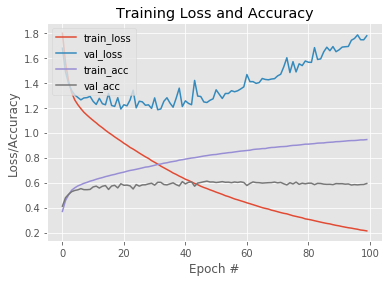

In [6]:
# Evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(
    testY.argmax(axis=1),
    predictions.argmax(axis=1),
    target_names=labelNames
))

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [ ]:
# Save the network to disk
print("[INFO] serializing network...")
model.save(r'/home/share/models/cifar-10/shallownet.hdf5')